In [1]:
#from  IPython.displayIPython  import display


#import libaires
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import cython
from ripser import ripser, plot_dgms
import wfdb
import math
import pandas as pd




In [2]:
#Function to make the libary
#theDimension - what dimesnion should the perisistnce diagram go to
#numOfSec - the number of seconds should be used in the diagram
#ID - ID of the timeseries
#Path- the full path to the timeseries 

def setWindow(aStep,aListOfVals):
    theIndex = 0
    theLength = len(aListOfVals)
    theFinList = []
    for i in range(0,theLength):
        if(theIndex <len(aListOfVals)):
            theFinList.append(aListOfVals[theIndex])
            theIndex += aStep
        
    return(theFinList)   

def makePersistDiagram(theDimension,numOfSec,ID,Path,Step):
    print("starting")
    theX = []
    diagramss = ""
    x = ""
    theString = ""
    theFinData = []
    #get the timeseries to the number of seconds
    theSamp = wfdb.rdsamp(Path  + ID)
    theData = theSamp[0]
    for i in range(0,len(theSamp[0])):
    #print(theSamp[0][i][0])
        theX.append(theSamp[0][i][0])
    theData = theX[0:numOfSec]
   # print(theData)
    Delta = math.floor(Step/theDimension)
    theData = setWindow(Delta,theData)
   # print(theData)
    #theData = np.asarray(theData)
    #if even cuts :
    
    
    

        #setup set of vectors based off information given
    for i in range(0,len(theData)-theDimension):
        theFinData.append(theData[i:i+theDimension])
    theFinData = np.array(theFinData)
    print(theFinData.shape)
    print(theFinData)
    print("starting") 
        #use ripser and plot
    diagramss = ripser(theFinData,2)['dgms']
    plot_dgms(diagramss, show=True)
    x = open(ID + ".txt","w")
    theCSV = {'Dimension':[],"Birth":[],"Death":[]}
    
    for i in range(len(diagramss)):
        for j in range(len(diagramss[i])):
            theCSV["Dimension"].append(i)
            theCSV["Birth"].append(diagramss[i][j][0])
            theCSV["Death"].append(diagramss[i][j][1])
    theCSV = pd.DataFrame(theCSV)
    theCSV.to_csv(ID +'.csv')
    return(diagramss)

#rint(type(makePersistDiagram(50,3200,"A07872",'/home/dr-dunstan/Downloads/training2017/')))


#function to save from csv
def makeDiaFromCSV(dataType):
    #vairbles to deal with the csv and opening it 
    lineSkip = 0
    theCSV = open("200_set_of_Norm_AF_Rand.csv")
    
    #working the normal column of the csv
    if(dataType == "Normal"):
        #for each line in the csv
        for line in theCSV:
            #remove whitespace
            line = line.strip()
            #split up based off commas
            a,b,c,d = line.split(",")
            #if not at first line
            print("1")
            if(lineSkip != 0):
                #create plot diagram with ID at that line
                theSamp = wfdb.rdsamp("/Users/luke/Downloads/training2017/" + b)
                print("2")
                makePersistDiagram(50,3000,b,'/Users/luke/Downloads/training2017/',250)
            lineSkip += 1
#same with af & random
    elif(dataType == "AF"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/Users/luke/Downloads/training2017/" + c)
                theData = len(theSamp[0])
                makePersistDiagram(50,3000,c,'/Users/luke/Downloads/training2017/',250)
            lineSkip += 1
    elif(dataType == "Random"):
        for line in theCSV:
            line = line.strip()
            a,b,c,d = line.split(",")
            if(lineSkip != 0):
                theSamp = wfdb.rdsamp("/Users/luke/Downloads/training2017/"+ d)
                theData = len(theSamp[0])
                makePersistDiagram(50,3000,d,'/Users/luke/Downloads/training2017/',250)
            lineSkip += 1
    else:
        print("Datatype dosent exsit")
#

1
1
2
starting
(550, 50)
[[-0.127 -0.254 -0.267 ...  0.035  0.043  0.054]
 [-0.254 -0.267 -0.253 ...  0.043  0.054  0.068]
 [-0.267 -0.253 -0.241 ...  0.054  0.068  0.103]
 ...
 [-0.092 -0.081 -0.075 ... -0.091 -0.099 -0.078]
 [-0.081 -0.075 -0.067 ... -0.099 -0.078 -0.067]
 [-0.075 -0.067 -0.06  ... -0.078 -0.067 -0.058]]
starting


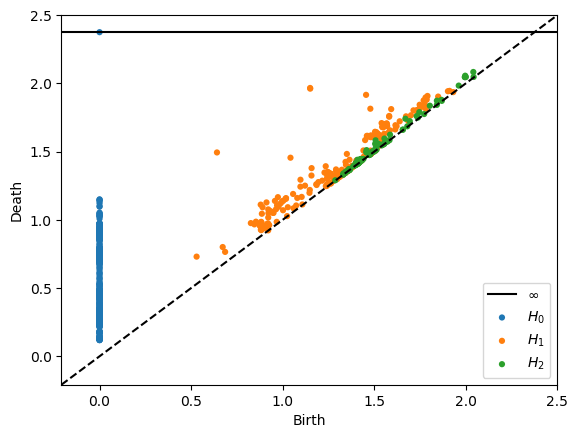

1
2
starting
(550, 50)
[[ 0.128  0.257  0.268 ...  0.005 -0.002 -0.014]
 [ 0.257  0.268  0.257 ... -0.002 -0.014 -0.027]
 [ 0.268  0.257  0.244 ... -0.014 -0.027 -0.056]
 ...
 [ 0.009 -0.036 -0.026 ...  0.018 -0.088 -0.062]
 [-0.036 -0.026  1.469 ... -0.088 -0.062 -0.061]
 [-0.026  1.469  0.333 ... -0.062 -0.061 -0.071]]
starting


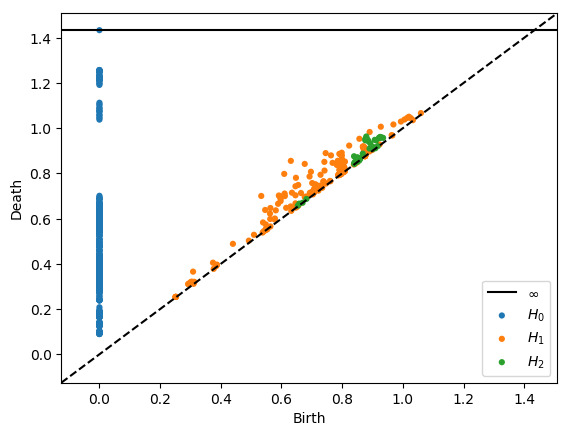

1
2
starting
(550, 50)
[[ 0.056  0.107  0.115 ...  0.042  0.073  0.089]
 [ 0.107  0.115  0.101 ...  0.073  0.089  0.093]
 [ 0.115  0.101  0.153 ...  0.089  0.093  0.099]
 ...
 [ 0.06   0.081  0.062 ... -0.053 -0.029  0.024]
 [ 0.081  0.062  0.064 ... -0.029  0.024  0.034]
 [ 0.062  0.064  0.053 ...  0.024  0.034  0.011]]
starting


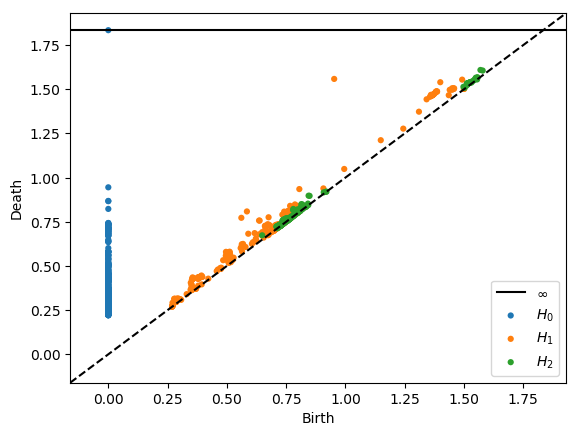

1
2
starting
(550, 50)
[[-0.266 -0.423 -0.289 ...  0.136  0.134  0.137]
 [-0.423 -0.289 -0.447 ...  0.134  0.137  0.149]
 [-0.289 -0.447 -0.622 ...  0.137  0.149  0.196]
 ...
 [-0.038 -0.039 -0.039 ...  0.148  0.152  0.125]
 [-0.039 -0.039 -0.038 ...  0.152  0.125  0.064]
 [-0.039 -0.038 -0.036 ...  0.125  0.064 -0.009]]
starting


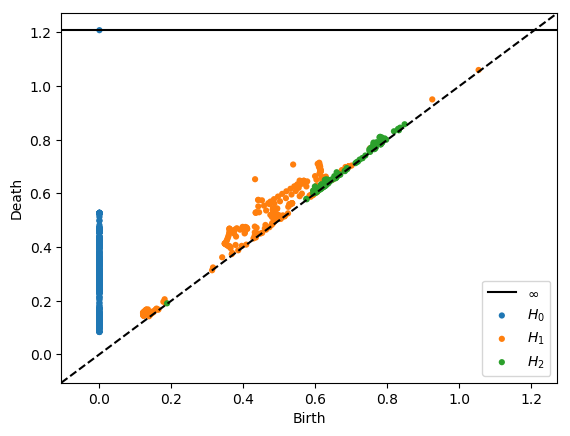

1
2
starting
(550, 50)
[[ 0.021  0.031  0.035 ...  0.076  0.08   0.071]
 [ 0.031  0.035  0.035 ...  0.08   0.071  0.065]
 [ 0.035  0.035  0.032 ...  0.071  0.065  0.076]
 ...
 [ 0.031  0.016 -0.315 ...  0.038  0.037  0.04 ]
 [ 0.016 -0.315 -0.901 ...  0.037  0.04   0.035]
 [-0.315 -0.901 -0.104 ...  0.04   0.035  0.026]]
starting


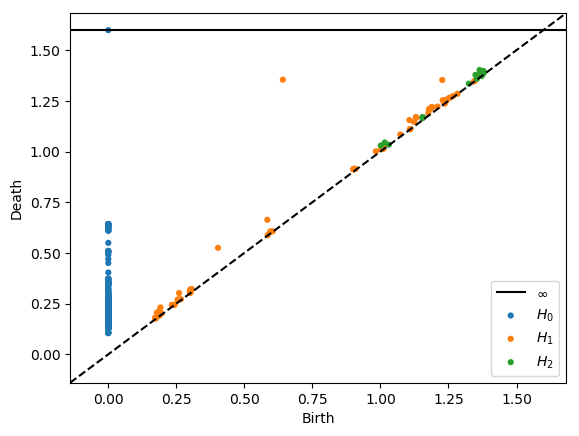

1
2
starting
(550, 50)
[[-1.028 -1.808 -1.596 ...  0.129  0.126  0.123]
 [-1.808 -1.596 -1.444 ...  0.126  0.123  0.121]
 [-1.596 -1.444 -1.318 ...  0.123  0.121  0.12 ]
 ...
 [-0.047 -0.037 -0.03  ...  0.14   0.11   0.044]
 [-0.037 -0.03  -0.024 ...  0.11   0.044 -0.011]
 [-0.03  -0.024 -0.017 ...  0.044 -0.011 -0.021]]
starting


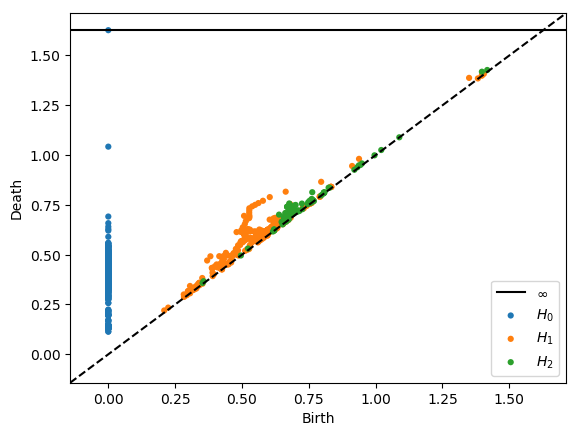

1
2
starting
(550, 50)
[[-0.069 -0.142 -0.167 ...  0.138  0.139  0.137]
 [-0.142 -0.167 -0.208 ...  0.139  0.137  0.132]
 [-0.167 -0.208 -0.222 ...  0.137  0.132  0.13 ]
 ...
 [ 0.07   0.112  0.126 ...  0.059  0.167  0.188]
 [ 0.112  0.126  0.133 ...  0.167  0.188  0.185]
 [ 0.126  0.133  0.145 ...  0.188  0.185  0.196]]
starting


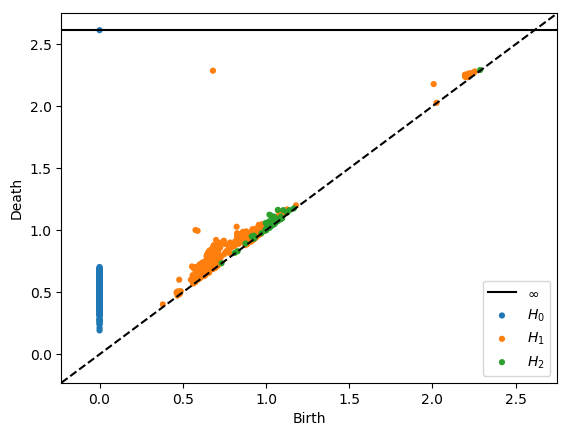

1
2
starting
(550, 50)
[[ 0.072  0.123  0.141 ...  0.156  0.483  0.189]
 [ 0.123  0.141  0.164 ...  0.483  0.189 -0.105]
 [ 0.141  0.164  0.172 ...  0.189 -0.105 -0.053]
 ...
 [ 0.028  0.043  0.047 ... -0.042 -0.024 -0.018]
 [ 0.043  0.047  0.052 ... -0.024 -0.018 -0.016]
 [ 0.047  0.052  0.06  ... -0.018 -0.016 -0.014]]
starting


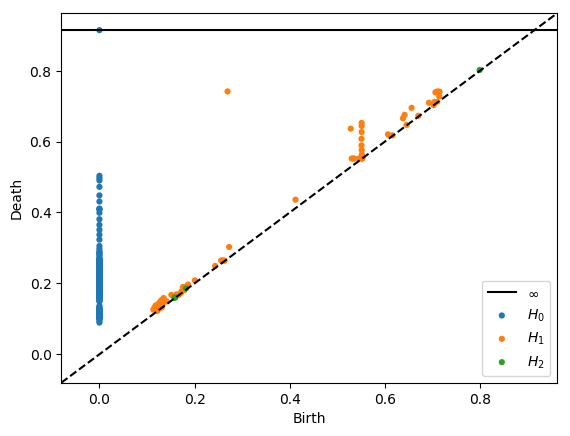

1
2
starting
(550, 50)
[[-0.062 -0.078  0.028 ...  0.191  0.185  0.182]
 [-0.078  0.028  0.105 ...  0.185  0.182  0.213]
 [ 0.028  0.105  0.075 ...  0.182  0.213  0.199]
 ...
 [ 0.15   0.134  0.123 ... -0.062  0.098  0.211]
 [ 0.134  0.123  0.128 ...  0.098  0.211  0.239]
 [ 0.123  0.128  0.134 ...  0.211  0.239  0.235]]
starting


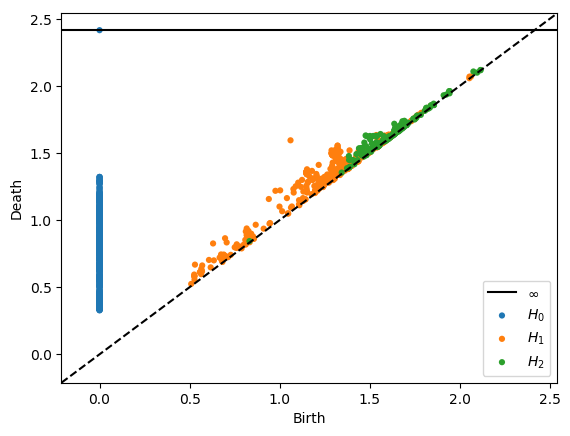

1
2
starting
(550, 50)
[[-0.081 -0.129 -0.141 ...  0.001 -0.007  0.019]
 [-0.129 -0.141 -0.138 ... -0.007  0.019  0.026]
 [-0.141 -0.138 -0.105 ...  0.019  0.026  0.03 ]
 ...
 [-0.179 -0.141 -0.044 ...  0.075  0.088  0.118]
 [-0.141 -0.044 -0.011 ...  0.088  0.118  0.164]
 [-0.044 -0.011  0.012 ...  0.118  0.164  0.18 ]]
starting


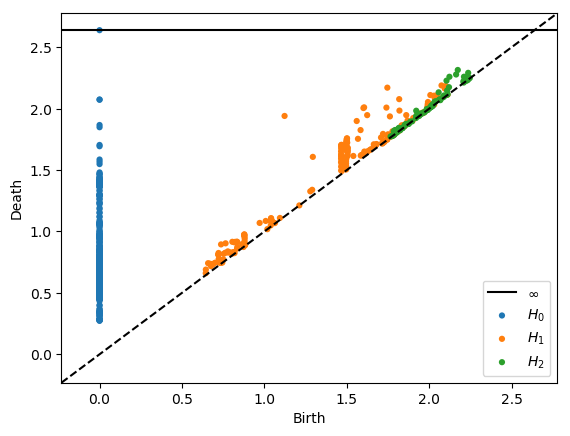

1
2
starting
(550, 50)
[[-0.477 -0.863 -0.804 ...  0.03   0.036  0.043]
 [-0.863 -0.804 -0.764 ...  0.036  0.043  0.047]
 [-0.804 -0.764 -0.729 ...  0.043  0.047  0.051]
 ...
 [-0.082 -0.075 -0.071 ...  0.033  0.045  0.053]
 [-0.075 -0.071 -0.066 ...  0.045  0.053  0.068]
 [-0.071 -0.066 -0.064 ...  0.053  0.068  0.092]]
starting


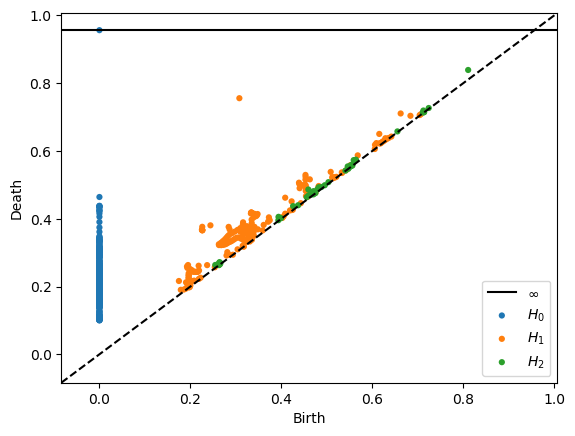

1
2
starting
(550, 50)
[[ 0.012  0.014  0.015 ...  0.02   0.013  0.016]
 [ 0.014  0.015  0.015 ...  0.013  0.016  0.016]
 [ 0.015  0.015  0.016 ...  0.016  0.016  0.01 ]
 ...
 [ 0.068  0.092  0.061 ... -0.077 -0.084 -0.056]
 [ 0.092  0.061  0.034 ... -0.084 -0.056  0.188]
 [ 0.061  0.034  0.03  ... -0.056  0.188  0.077]]
starting


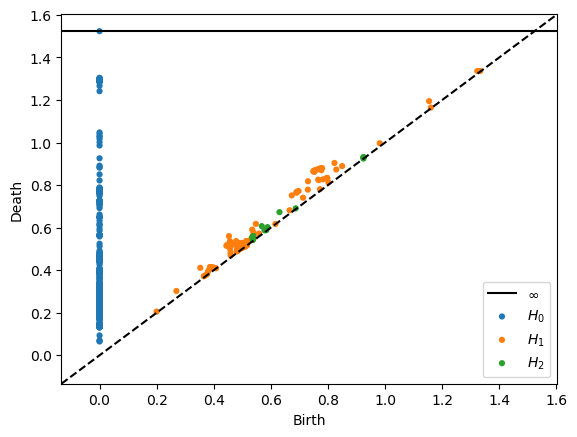

1
2
starting
(550, 50)
[[ 0.4    0.752  0.721 ... -0.063 -0.002  0.025]
 [ 0.752  0.721  0.671 ... -0.002  0.025  0.029]
 [ 0.721  0.671  0.653 ...  0.025  0.029  0.031]
 ...
 [-0.054 -0.066 -0.081 ... -0.209 -0.454  0.408]
 [-0.066 -0.081 -0.12  ... -0.454  0.408  0.162]
 [-0.081 -0.12  -0.176 ...  0.408  0.162  0.038]]
starting


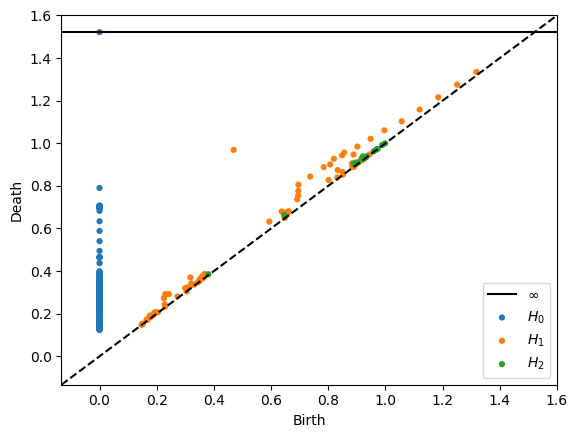

1
2
starting
(550, 50)
[[ 0.141  0.351  0.428 ...  0.107  0.386 -0.197]
 [ 0.351  0.428  0.459 ...  0.386 -0.197 -0.584]
 [ 0.428  0.459  0.587 ... -0.197 -0.584 -0.699]
 ...
 [-0.107 -0.101 -0.1   ... -0.026 -0.001  0.057]
 [-0.101 -0.1   -0.101 ... -0.001  0.057  0.151]
 [-0.1   -0.101 -0.098 ...  0.057  0.151  0.252]]
starting


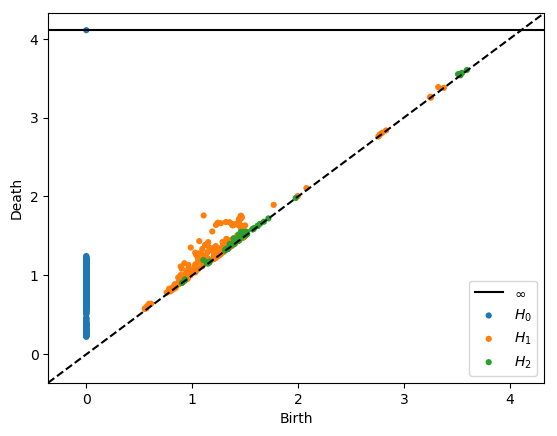

1
2
starting
(550, 50)
[[-0.117 -0.205 -0.22  ...  0.064 -0.003 -0.081]
 [-0.205 -0.22  -0.22  ... -0.003 -0.081 -0.091]
 [-0.22  -0.22  -0.209 ... -0.081 -0.091 -0.092]
 ...
 [-0.038 -0.034 -0.039 ...  0.107  0.16   0.233]
 [-0.034 -0.039 -0.055 ...  0.16   0.233  0.281]
 [-0.039 -0.055 -0.059 ...  0.233  0.281  0.287]]
starting


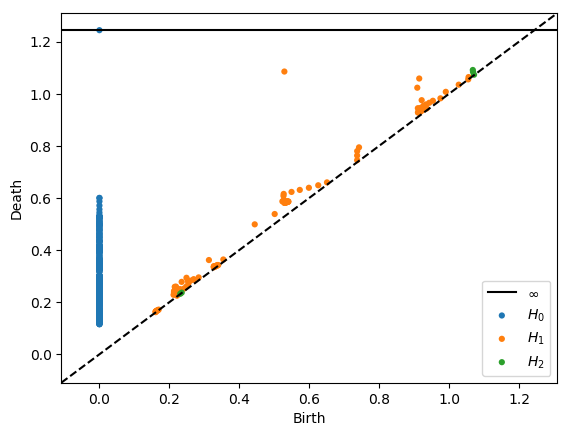

1
2
starting
(550, 50)
[[-0.39  -0.698 -0.659 ...  0.356  0.417  0.435]
 [-0.698 -0.659 -0.644 ...  0.417  0.435  0.436]
 [-0.659 -0.644 -0.619 ...  0.435  0.436  0.438]
 ...
 [ 0.012  0.025  0.052 ...  0.042  0.081  0.128]
 [ 0.025  0.052  0.075 ...  0.081  0.128  0.15 ]
 [ 0.052  0.075  0.088 ...  0.128  0.15   0.157]]
starting


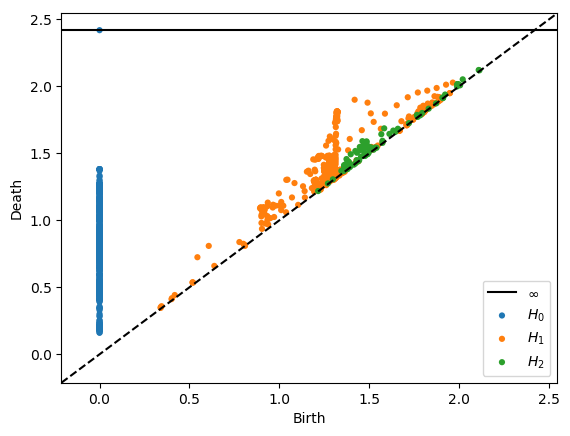

1
2
starting
(550, 50)
[[ 0.037  0.125  0.187 ... -0.216 -0.154 -0.074]
 [ 0.125  0.187  0.221 ... -0.154 -0.074 -0.002]
 [ 0.187  0.221  0.288 ... -0.074 -0.002  0.083]
 ...
 [ 0.157  0.155  0.144 ...  0.037  0.056  0.077]
 [ 0.155  0.144  0.124 ...  0.056  0.077  0.092]
 [ 0.144  0.124  0.117 ...  0.077  0.092  0.101]]
starting


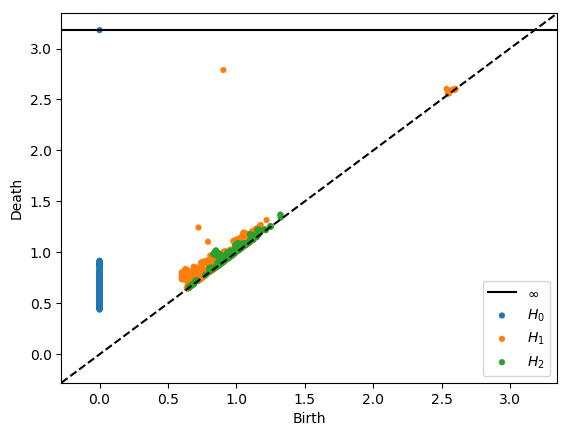

1
2
starting
(550, 50)
[[ 0.417  0.689  0.452 ... -0.588 -0.462 -0.149]
 [ 0.689  0.452  0.289 ... -0.462 -0.149  0.08 ]
 [ 0.452  0.289  0.206 ... -0.149  0.08   0.175]
 ...
 [ 0.137  0.132  0.126 ... -1.184 -1.12  -0.93 ]
 [ 0.132  0.126  0.122 ... -1.12  -0.93  -0.863]
 [ 0.126  0.122  0.128 ... -0.93  -0.863 -0.813]]
starting


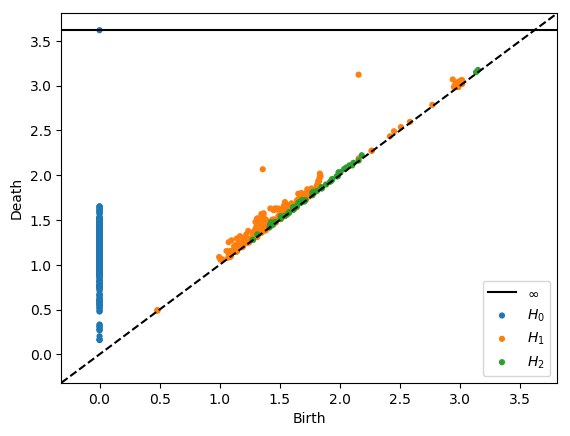

1
2
starting
(550, 50)
[[ 0.27   0.518  0.365 ...  1.619  1.629  1.63 ]
 [ 0.518  0.365  0.045 ...  1.629  1.63   1.635]
 [ 0.365  0.045  0.034 ...  1.63   1.635  1.638]
 ...
 [-0.039 -0.043 -0.01  ... -0.211 -0.193 -0.171]
 [-0.043 -0.01   0.014 ... -0.193 -0.171 -0.159]
 [-0.01   0.014  0.028 ... -0.171 -0.159 -0.149]]
starting


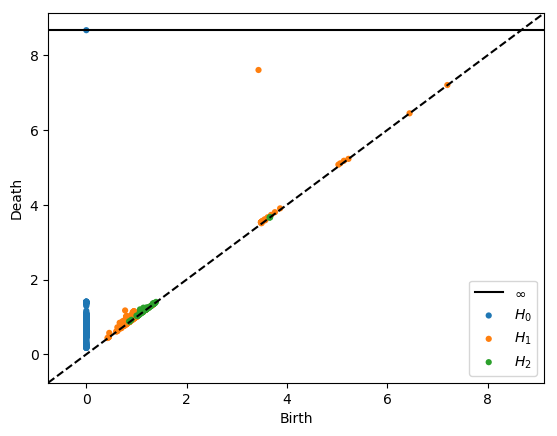

1
2
starting
(550, 50)
[[-0.53  -0.979 -0.96  ...  0.035 -0.025 -0.087]
 [-0.979 -0.96  -0.897 ... -0.025 -0.087 -0.167]
 [-0.96  -0.897 -0.86  ... -0.087 -0.167 -0.21 ]
 ...
 [ 0.19   0.256  0.218 ...  0.31   0.226  0.123]
 [ 0.256  0.218  0.15  ...  0.226  0.123  0.036]
 [ 0.218  0.15   0.048 ...  0.123  0.036 -0.017]]
starting


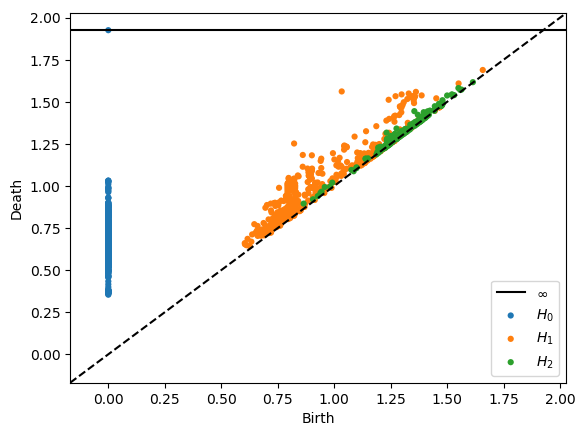

1
2
starting
(550, 50)
[[-0.425 -0.798 -0.79  ...  0.139  0.113  0.084]
 [-0.798 -0.79  -0.494 ...  0.113  0.084  0.074]
 [-0.79  -0.494 -0.106 ...  0.084  0.074  0.069]
 ...
 [-0.188 -0.18  -0.154 ...  0.248  0.229  0.154]
 [-0.18  -0.154 -0.135 ...  0.229  0.154  0.044]
 [-0.154 -0.135 -0.114 ...  0.154  0.044 -0.066]]
starting


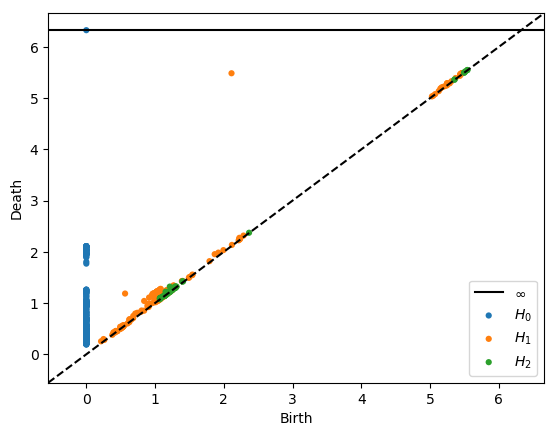

1
2
starting
(550, 50)
[[-6.800e-01 -1.220e+00 -1.068e+00 ...  2.510e-01  2.630e-01  2.330e-01]
 [-1.220e+00 -1.068e+00 -9.330e-01 ...  2.630e-01  2.330e-01  2.230e-01]
 [-1.068e+00 -9.330e-01 -7.760e-01 ...  2.330e-01  2.230e-01  4.930e-01]
 ...
 [-1.200e-02 -1.000e-03  2.000e-03 ... -2.000e-02 -2.700e-02 -8.000e-03]
 [-1.000e-03  2.000e-03  2.200e-02 ... -2.700e-02 -8.000e-03  4.000e-03]
 [ 2.000e-03  2.200e-02  5.000e-03 ... -8.000e-03  4.000e-03  2.700e-02]]
starting


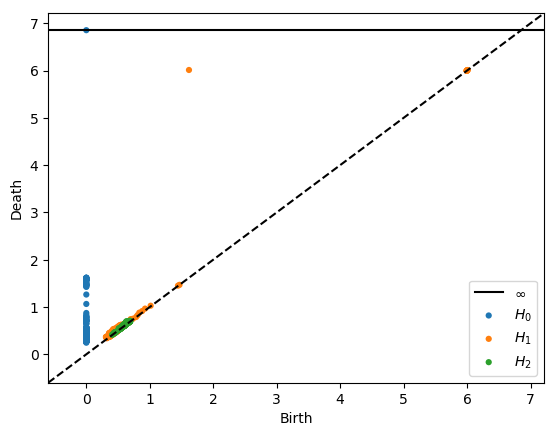

1
2
starting
(550, 50)
[[ 0.387  0.748  0.85  ... -0.762 -0.759 -0.742]
 [ 0.748  0.85   1.102 ... -0.759 -0.742 -0.66 ]
 [ 0.85   1.102  1.274 ... -0.742 -0.66  -0.529]
 ...
 [-0.247 -0.192 -0.171 ... -0.665 -0.779 -0.421]
 [-0.192 -0.171 -0.165 ... -0.779 -0.421 -0.086]
 [-0.171 -0.165 -0.161 ... -0.421 -0.086 -0.098]]
starting


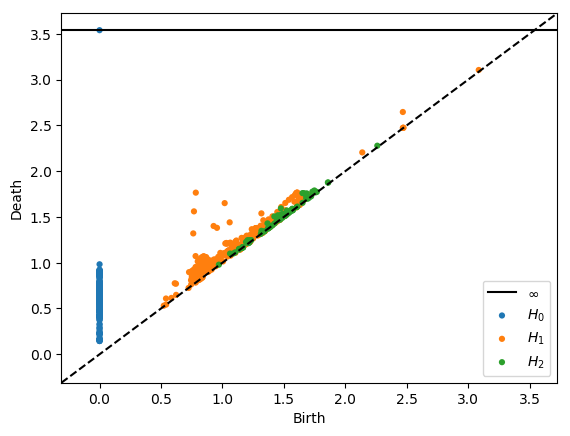

1
2
starting
(550, 50)
[[ 0.326  0.617  0.639 ...  0.064  0.029  0.   ]
 [ 0.617  0.639  0.652 ...  0.029  0.    -0.018]
 [ 0.639  0.652  0.566 ...  0.    -0.018 -0.041]
 ...
 [-0.045 -0.054 -0.063 ...  0.149  0.126  0.054]
 [-0.054 -0.063 -0.071 ...  0.126  0.054  0.01 ]
 [-0.063 -0.071 -0.07  ...  0.054  0.01  -0.012]]
starting


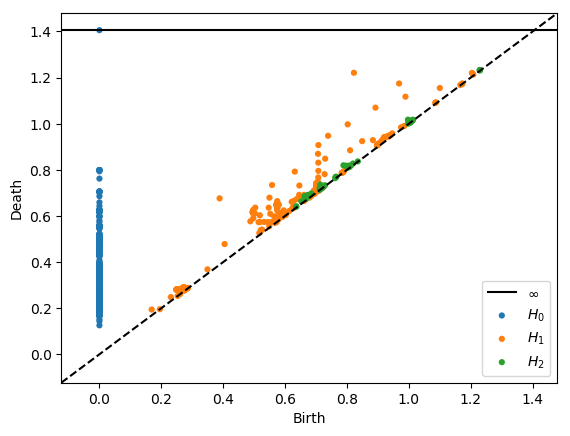

1
2
starting
(550, 50)
[[-0.063 -0.158 -0.179 ...  0.034  0.034  0.032]
 [-0.158 -0.179 -0.187 ...  0.034  0.032  0.03 ]
 [-0.179 -0.187 -0.186 ...  0.032  0.03   0.028]
 ...
 [ 0.044  0.029 -0.14  ...  0.061  0.14   0.126]
 [ 0.029 -0.14  -1.34  ...  0.14   0.126  0.122]
 [-0.14  -1.34  -1.443 ...  0.126  0.122  0.12 ]]
starting


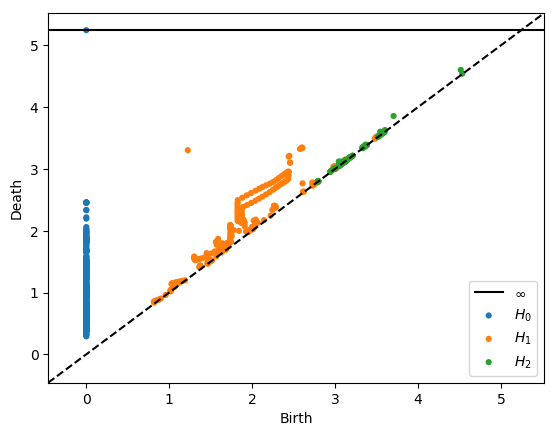

1
2
starting
(550, 50)
[[ 0.703  0.819  0.958 ...  0.448  0.492  0.531]
 [ 0.819  0.958  1.074 ...  0.492  0.531  0.591]
 [ 0.958  1.074  1.12  ...  0.531  0.591  0.656]
 ...
 [ 0.326  0.413 -2.228 ... -0.186 -0.171 -0.169]
 [ 0.413 -2.228 -1.401 ... -0.171 -0.169  0.153]
 [-2.228 -1.401 -0.016 ... -0.169  0.153  0.673]]
starting


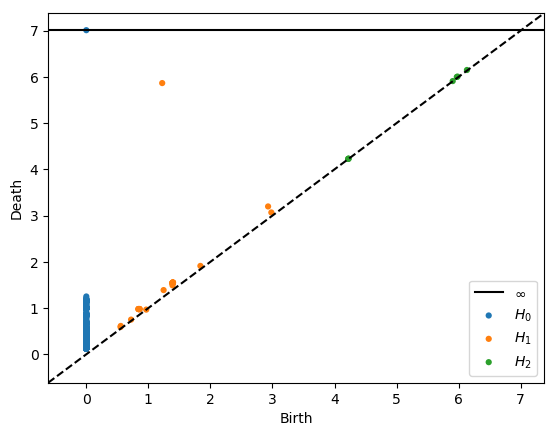

1
2
starting
(550, 50)
[[-0.119 -0.273 -0.289 ...  0.018  0.022  0.026]
 [-0.273 -0.289 -0.28  ...  0.022  0.026  0.034]
 [-0.289 -0.28  -0.242 ...  0.026  0.034  0.042]
 ...
 [ 0.074  0.589  0.528 ... -0.103 -0.089 -0.075]
 [ 0.589  0.528 -0.279 ... -0.089 -0.075 -0.039]
 [ 0.528 -0.279 -0.203 ... -0.075 -0.039 -0.009]]
starting


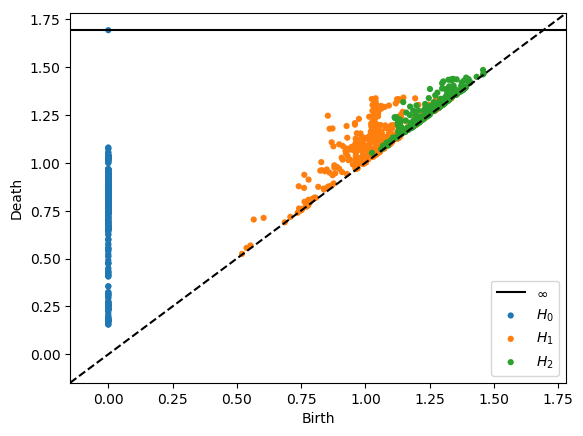

1
2
starting
(550, 50)
[[-0.104 -0.149 -0.031 ... -0.047 -0.017  0.037]
 [-0.149 -0.031  0.422 ... -0.017  0.037  0.092]
 [-0.031  0.422  0.575 ...  0.037  0.092  0.111]
 ...
 [ 0.077  0.101  0.085 ... -0.001  0.028  0.076]
 [ 0.101  0.085  0.074 ...  0.028  0.076  0.092]
 [ 0.085  0.074  0.064 ...  0.076  0.092  0.1  ]]
starting


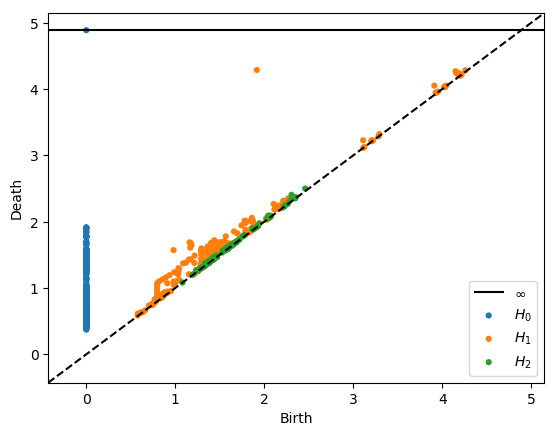

1
2
starting
(550, 50)
[[ 0.19   0.3    0.213 ... -0.323 -0.311 -0.269]
 [ 0.3    0.213  0.086 ... -0.311 -0.269 -0.244]
 [ 0.213  0.086 -0.101 ... -0.269 -0.244 -0.215]
 ...
 [-0.049 -0.041 -0.033 ... -0.07  -0.087 -0.076]
 [-0.041 -0.033 -0.021 ... -0.087 -0.076 -0.065]
 [-0.033 -0.021 -0.016 ... -0.076 -0.065 -0.079]]
starting


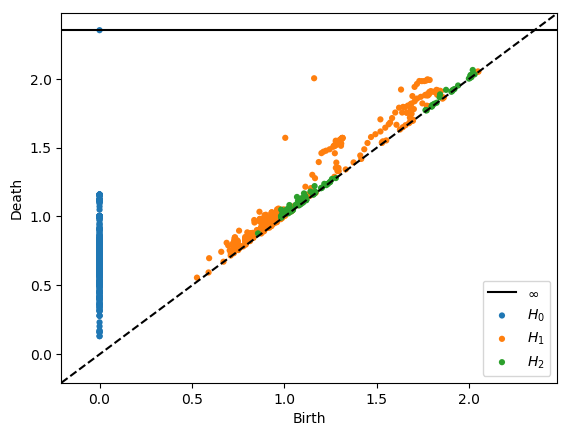

1
2
starting
(550, 50)
[[-0.367 -0.657 -0.615 ...  0.068  0.028  0.024]
 [-0.657 -0.615 -0.566 ...  0.028  0.024  0.033]
 [-0.615 -0.566 -0.538 ...  0.024  0.033  0.046]
 ...
 [-0.011 -0.003  0.    ... -0.056 -0.055 -0.052]
 [-0.003  0.    -0.003 ... -0.055 -0.052 -0.051]
 [ 0.    -0.003 -0.002 ... -0.052 -0.051 -0.049]]
starting


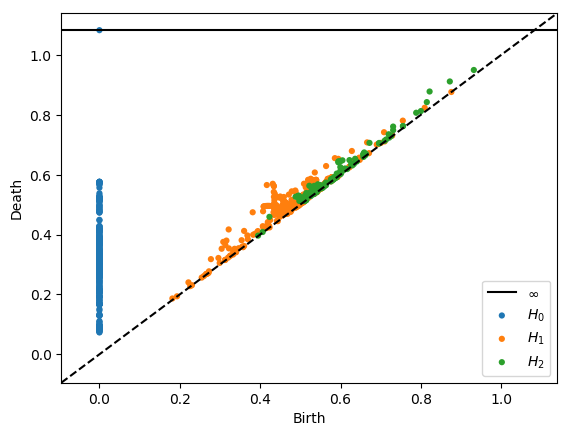

1
2
starting
(550, 50)
[[ 0.472  0.833  0.809 ...  0.024  0.011 -0.002]
 [ 0.833  0.809  0.816 ...  0.011 -0.002 -0.016]
 [ 0.809  0.816  0.72  ... -0.002 -0.016 -0.007]
 ...
 [-0.272 -0.286 -0.292 ...  0.097  0.122  0.065]
 [-0.286 -0.292 -0.281 ...  0.122  0.065  0.016]
 [-0.292 -0.281 -0.276 ...  0.065  0.016  0.009]]
starting


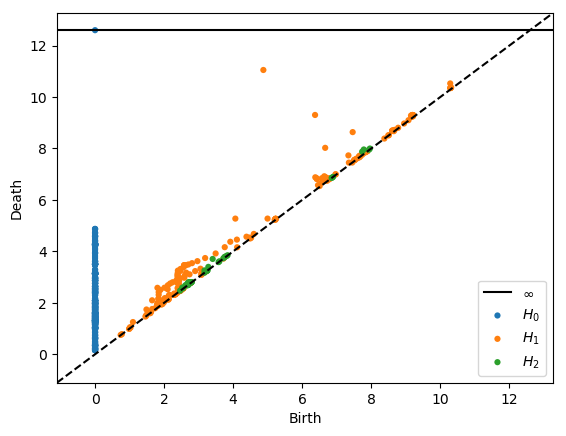

1
2
starting
(550, 50)
[[-0.604 -1.072 -1.026 ... -0.231 -0.205 -0.18 ]
 [-1.072 -1.026 -1.044 ... -0.205 -0.18  -0.126]
 [-1.026 -1.044 -1.053 ... -0.18  -0.126 -0.067]
 ...
 [-0.075 -0.069 -0.063 ... -0.046 -0.029 -0.033]
 [-0.069 -0.063 -0.065 ... -0.029 -0.033 -0.055]
 [-0.063 -0.065 -0.075 ... -0.033 -0.055 -0.066]]
starting


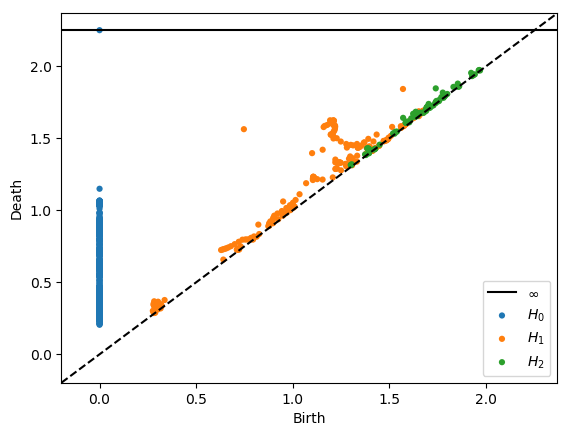

1
2
starting
(550, 50)
[[-0.645 -1.15  -1.047 ...  0.776  0.214 -0.246]
 [-1.15  -1.047 -0.876 ...  0.214 -0.246 -0.104]
 [-1.047 -0.876 -0.83  ... -0.246 -0.104 -0.06 ]
 ...
 [ 0.175  0.214  0.24  ...  0.032  0.047  0.062]
 [ 0.214  0.24   0.238 ...  0.047  0.062  0.063]
 [ 0.24   0.238  0.198 ...  0.062  0.063  0.134]]
starting


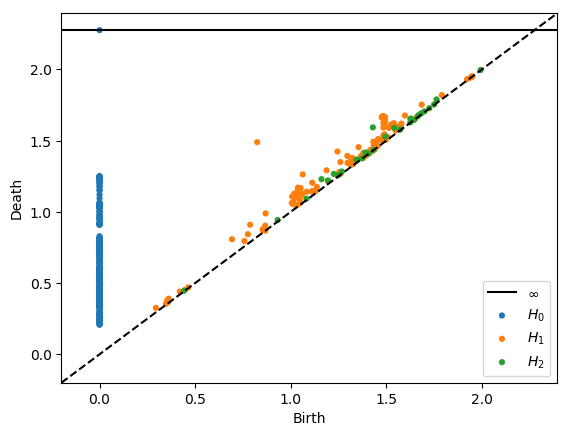

1
2
starting
(550, 50)
[[-0.42  -0.525 -0.328 ...  0.18   0.193  0.2  ]
 [-0.525 -0.328 -0.501 ...  0.193  0.2    0.206]
 [-0.328 -0.501 -0.626 ...  0.2    0.206  0.229]
 ...
 [ 0.14   0.126  0.106 ...  0.05   0.041  0.026]
 [ 0.126  0.106  0.117 ...  0.041  0.026  0.026]
 [ 0.106  0.117  0.056 ...  0.026  0.026  0.019]]
starting


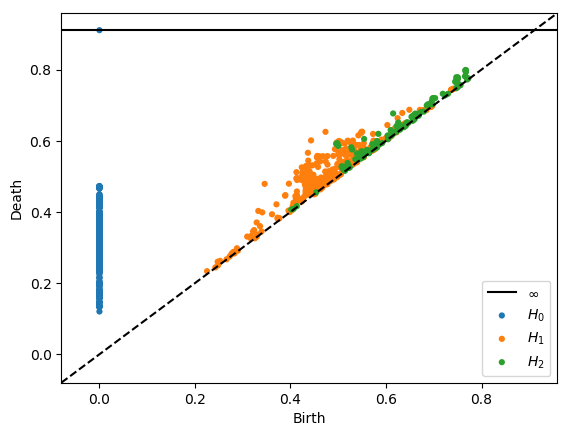

1
2
starting
(550, 50)
[[-0.037  0.177  0.359 ... -0.83  -0.768 -0.924]
 [ 0.177  0.359  0.227 ... -0.768 -0.924 -0.691]
 [ 0.359  0.227  0.422 ... -0.924 -0.691 -0.684]
 ...
 [-0.189 -0.133 -0.234 ...  0.011 -0.067  0.012]
 [-0.133 -0.234 -0.162 ... -0.067  0.012 -0.045]
 [-0.234 -0.162 -0.167 ...  0.012 -0.045 -0.047]]
starting


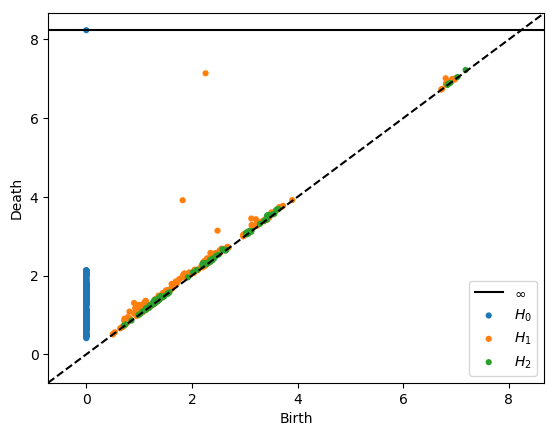

1
2
starting
(550, 50)
[[-0.971 -1.688 -1.717 ...  0.12   0.138  0.166]
 [-1.688 -1.717 -1.807 ...  0.138  0.166  0.234]
 [-1.717 -1.807 -1.746 ...  0.166  0.234  0.209]
 ...
 [-0.037 -0.043 -0.048 ...  0.177  0.258  0.294]
 [-0.043 -0.048 -0.039 ...  0.258  0.294  0.326]
 [-0.048 -0.039 -0.027 ...  0.294  0.326  0.282]]
starting


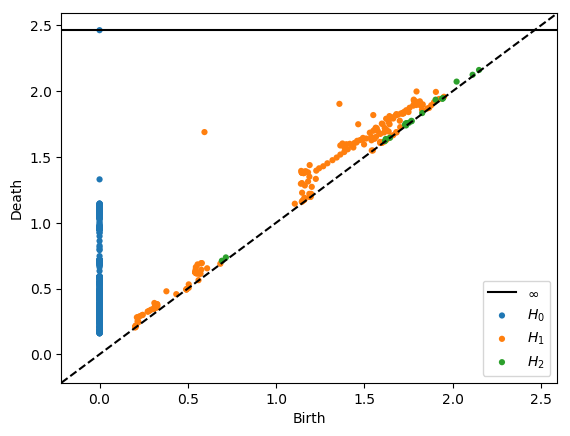

1
2
starting
(550, 50)
[[ 0.027  0.042  0.068 ... -0.096 -0.078 -0.058]
 [ 0.042  0.068  0.08  ... -0.078 -0.058 -0.07 ]
 [ 0.068  0.08   0.082 ... -0.058 -0.07  -0.094]
 ...
 [ 0.031  0.037  0.023 ...  0.022  0.01   0.028]
 [ 0.037  0.023  0.011 ...  0.01   0.028  0.021]
 [ 0.023  0.011  0.008 ...  0.028  0.021  0.012]]
starting


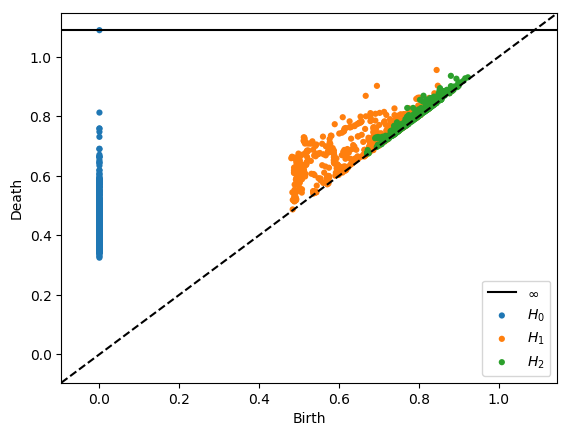

1
2
starting
(550, 50)
[[-0.14  -0.244 -0.286 ...  0.007  0.039  0.104]
 [-0.244 -0.286 -0.262 ...  0.039  0.104  0.14 ]
 [-0.286 -0.262  0.388 ...  0.104  0.14   0.074]
 ...
 [ 0.118  0.128  0.157 ... -0.027  0.02   0.052]
 [ 0.128  0.157  0.229 ...  0.02   0.052  0.07 ]
 [ 0.157  0.229  0.249 ...  0.052  0.07   0.085]]
starting


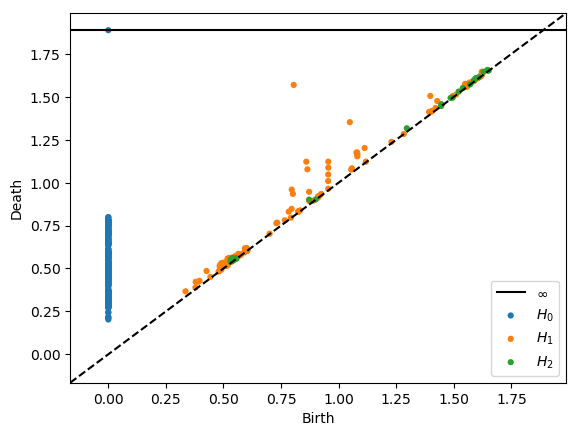

1
2
starting
(550, 50)
[[ 0.01   0.007 -0.001 ... -0.237 -0.249 -0.24 ]
 [ 0.007 -0.001 -0.03  ... -0.249 -0.24  -0.222]
 [-0.001 -0.03  -0.047 ... -0.24  -0.222 -0.207]
 ...
 [-0.033 -0.017  0.006 ... -0.062 -0.075 -0.076]
 [-0.017  0.006  0.014 ... -0.075 -0.076 -0.066]
 [ 0.006  0.014  0.017 ... -0.076 -0.066 -0.052]]
starting


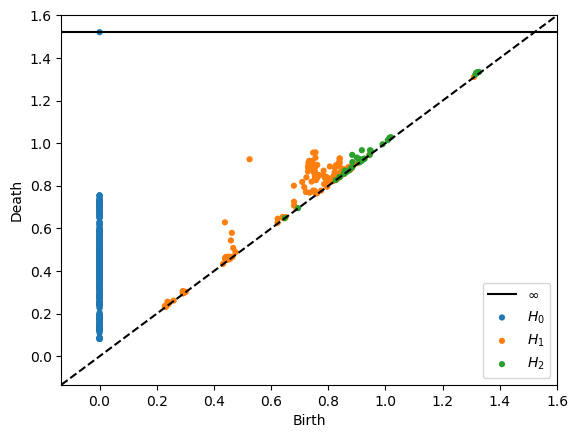

1
2
starting
(550, 50)
[[ 0.604  1.11   1.046 ... -0.365 -0.304 -0.283]
 [ 1.11   1.046  1.032 ... -0.304 -0.283 -0.266]
 [ 1.046  1.032  1.078 ... -0.283 -0.266 -0.214]
 ...
 [-0.013 -0.02  -0.029 ... -0.077 -0.062 -0.029]
 [-0.02  -0.029 -0.043 ... -0.062 -0.029 -0.012]
 [-0.029 -0.043 -0.036 ... -0.029 -0.012  0.008]]
starting


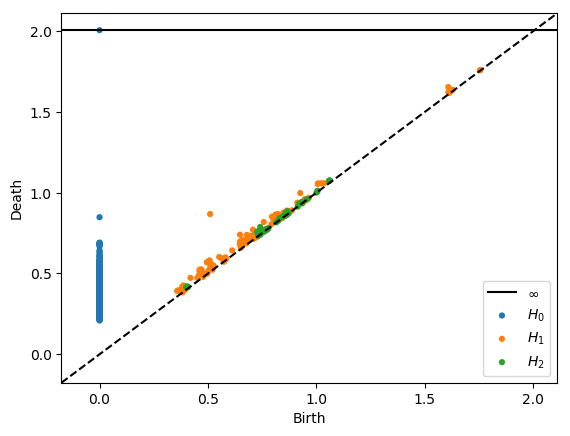

1
2
starting
(550, 50)
[[ 0.096  0.211  0.205 ...  0.09   0.375  0.212]
 [ 0.211  0.205  0.179 ...  0.375  0.212  0.004]
 [ 0.205  0.179  0.169 ...  0.212  0.004  0.029]
 ...
 [ 0.089  0.034  0.001 ... -0.048 -0.054 -0.056]
 [ 0.034  0.001 -0.021 ... -0.054 -0.056 -0.056]
 [ 0.001 -0.021 -0.039 ... -0.056 -0.056 -0.055]]
starting


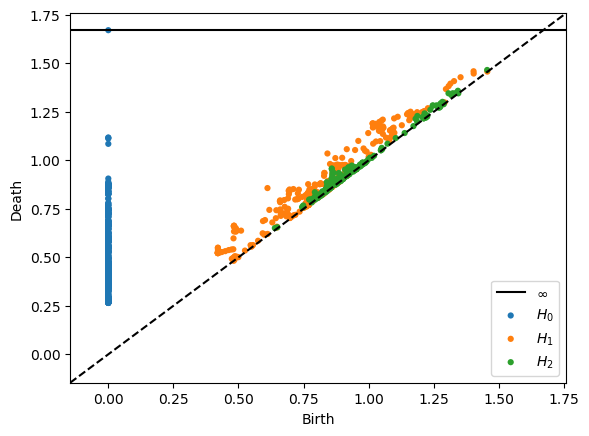

1
2
starting
(550, 50)
[[ 0.126  0.2    0.137 ... -0.255  0.055  0.342]
 [ 0.2    0.137 -0.032 ...  0.055  0.342  0.546]
 [ 0.137 -0.032 -0.093 ...  0.342  0.546  0.582]
 ...
 [-0.446 -0.593 -0.742 ... -0.034  0.021  0.074]
 [-0.593 -0.742 -0.107 ...  0.021  0.074  0.195]
 [-0.742 -0.107  0.644 ...  0.074  0.195  0.304]]
starting


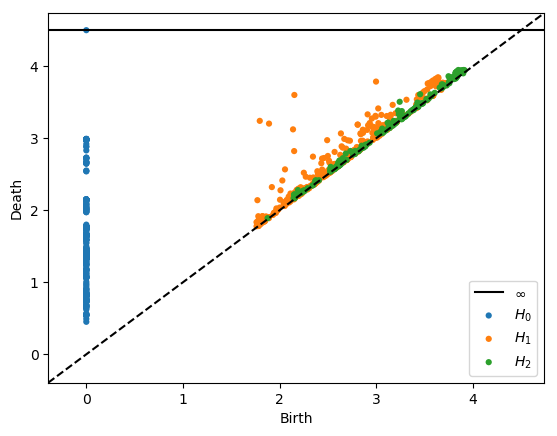

1
2
starting
(550, 50)
[[ 0.566  1.35   1.364 ...  0.149 -0.105 -0.162]
 [ 1.35   1.364  1.151 ... -0.105 -0.162 -0.168]
 [ 1.364  1.151  1.138 ... -0.162 -0.168 -0.149]
 ...
 [ 0.     0.011  0.034 ... -0.185 -0.2   -0.202]
 [ 0.011  0.034  0.101 ... -0.2   -0.202 -0.205]
 [ 0.034  0.101  0.128 ... -0.202 -0.205 -0.208]]
starting


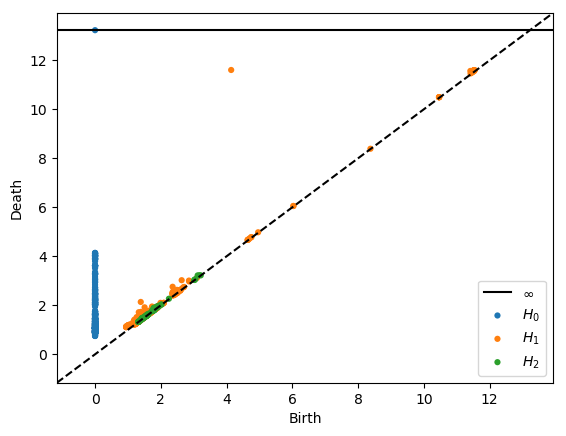

1
2
starting
(550, 50)
[[-0.103 -0.221 -0.244 ...  0.012  0.031  0.102]
 [-0.221 -0.244 -0.243 ...  0.031  0.102  0.175]
 [-0.244 -0.243 -0.22  ...  0.102  0.175  0.202]
 ...
 [-0.006 -0.012  0.001 ...  0.054  0.052  0.058]
 [-0.012  0.001  0.012 ...  0.052  0.058  0.078]
 [ 0.001  0.012  0.003 ...  0.058  0.078  0.054]]
starting


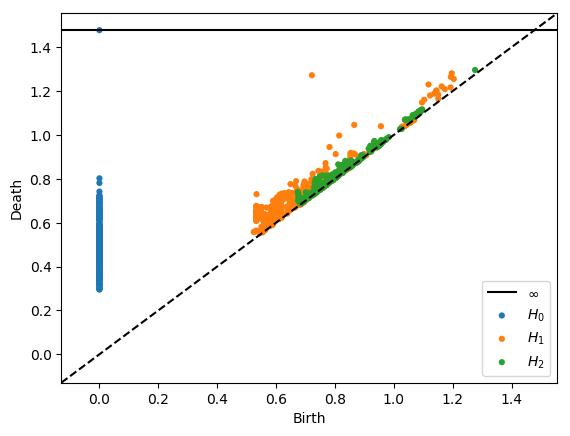

1
2
starting
(550, 50)
[[ 0.345  0.256 -0.199 ... -0.043 -0.158 -0.167]
 [ 0.256 -0.199 -0.255 ... -0.158 -0.167 -0.152]
 [-0.199 -0.255 -0.268 ... -0.167 -0.152 -0.133]
 ...
 [ 0.006 -0.006  0.01  ...  0.465 -0.181 -0.156]
 [-0.006  0.01   0.045 ... -0.181 -0.156 -0.156]
 [ 0.01   0.045  0.063 ... -0.156 -0.156 -0.123]]
starting


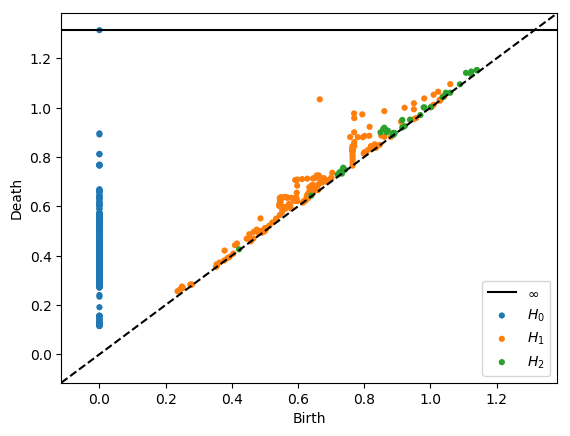

1
2
starting
(550, 50)
[[ 0.006  0.023  0.048 ...  0.123  0.572 -0.121]
 [ 0.023  0.048  0.035 ...  0.572 -0.121 -0.073]
 [ 0.048  0.035  0.015 ... -0.121 -0.073 -0.074]
 ...
 [ 0.061  0.668 -0.051 ... -0.049 -0.02  -0.024]
 [ 0.668 -0.051 -0.096 ... -0.02  -0.024 -0.05 ]
 [-0.051 -0.096 -0.113 ... -0.024 -0.05  -0.051]]
starting


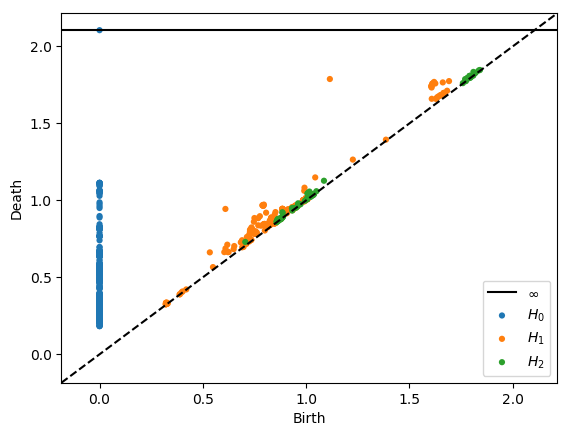

1
2
starting
(550, 50)
[[ 0.585  1.179  1.221 ... -0.084 -0.043  0.034]
 [ 1.179  1.221  1.235 ... -0.043  0.034  0.108]
 [ 1.221  1.235  1.249 ...  0.034  0.108  0.153]
 ...
 [ 0.349  0.229  0.099 ...  0.098  0.123  0.23 ]
 [ 0.229  0.099  0.038 ...  0.123  0.23   0.249]
 [ 0.099  0.038 -0.022 ...  0.23   0.249  0.241]]
starting


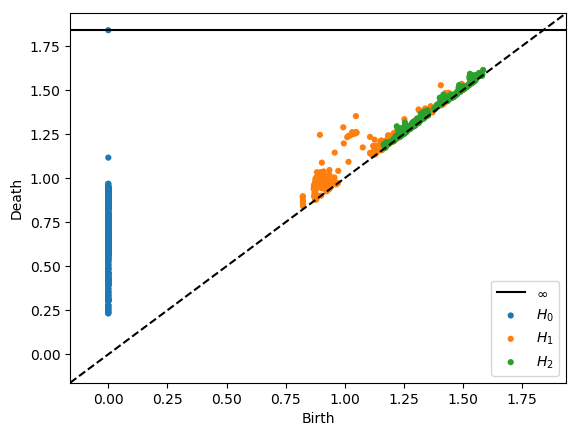

1
2
starting
(550, 50)
[[ 0.064  0.174  0.226 ... -0.211 -0.161 -0.037]
 [ 0.174  0.226  0.406 ... -0.161 -0.037  0.052]
 [ 0.226  0.406  0.35  ... -0.037  0.052  0.101]
 ...
 [-0.045 -0.039 -0.033 ... -0.041 -0.04  -0.04 ]
 [-0.039 -0.033 -0.031 ... -0.04  -0.04  -0.037]
 [-0.033 -0.031 -0.031 ... -0.04  -0.037 -0.027]]
starting


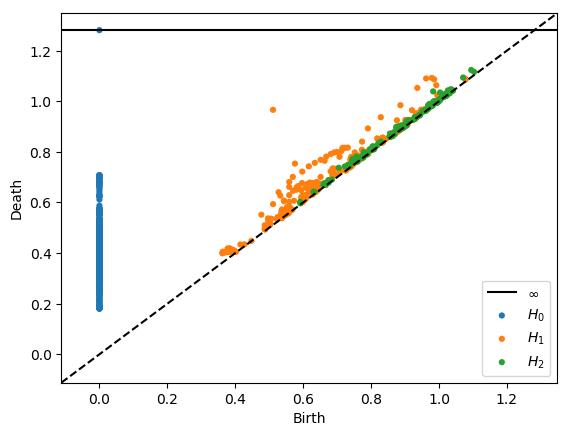

1
2
starting
(550, 50)
[[-0.221 -0.445 -0.522 ...  0.407  0.435  0.462]
 [-0.445 -0.522 -0.565 ...  0.435  0.462  0.47 ]
 [-0.522 -0.565 -0.587 ...  0.462  0.47   0.473]
 ...
 [-0.689 -0.699 -0.675 ... -0.21  -0.163 -0.137]
 [-0.699 -0.675 -0.387 ... -0.163 -0.137 -0.145]
 [-0.675 -0.387 -0.096 ... -0.137 -0.145 -0.16 ]]
starting


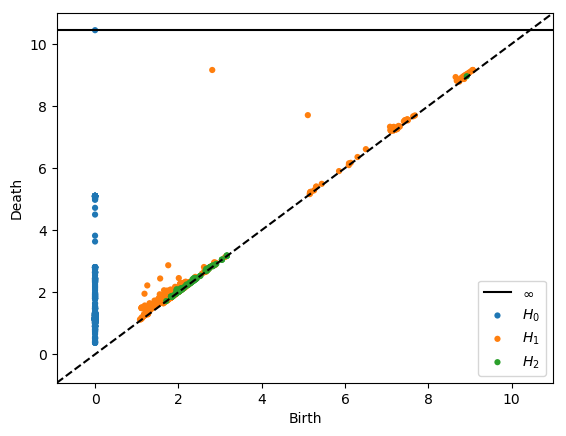

1
2
starting
(550, 50)
[[-0.075 -0.02   0.143 ...  0.132  0.139 -0.148]
 [-0.02   0.143  0.143 ...  0.139 -0.148 -0.304]
 [ 0.143  0.143  0.111 ... -0.148 -0.304 -0.01 ]
 ...
 [-0.162 -0.25  -0.259 ... -0.021 -0.035 -0.069]
 [-0.25  -0.259 -0.25  ... -0.035 -0.069 -0.089]
 [-0.259 -0.25  -0.153 ... -0.069 -0.089 -0.105]]
starting


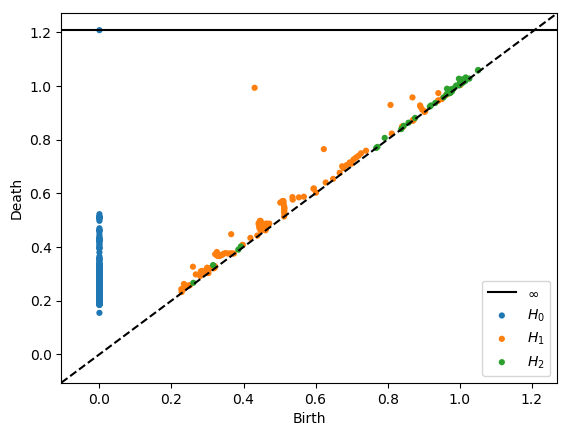

1
2
starting
(550, 50)
[[-0.082 -0.072 -0.001 ... -0.065 -0.186 -0.262]
 [-0.072 -0.001 -0.144 ... -0.186 -0.262 -0.258]
 [-0.001 -0.144 -0.244 ... -0.262 -0.258 -0.202]
 ...
 [-0.092  0.019  0.213 ... -0.048 -0.176 -0.15 ]
 [ 0.019  0.213  0.125 ... -0.176 -0.15  -0.118]
 [ 0.213  0.125 -0.034 ... -0.15  -0.118 -0.036]]
starting


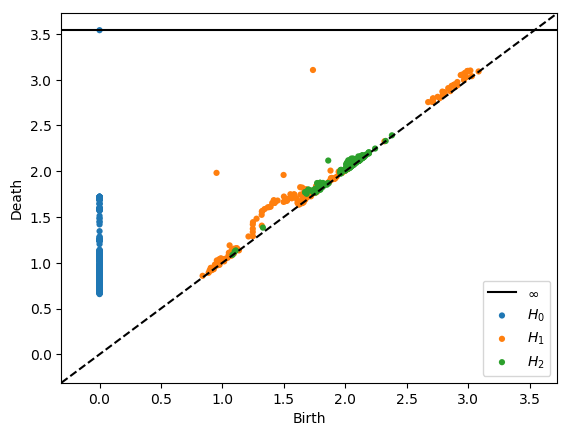

1
2
starting
(550, 50)
[[ 0.094  0.115 -0.247 ...  0.012  0.    -0.033]
 [ 0.115 -0.247 -0.307 ...  0.    -0.033 -0.082]
 [-0.247 -0.307  0.116 ... -0.033 -0.082 -0.1  ]
 ...
 [-0.098 -0.088 -0.079 ...  0.067  0.061  0.056]
 [-0.088 -0.079 -0.065 ...  0.061  0.056  0.043]
 [-0.079 -0.065 -0.097 ...  0.056  0.043  0.016]]
starting


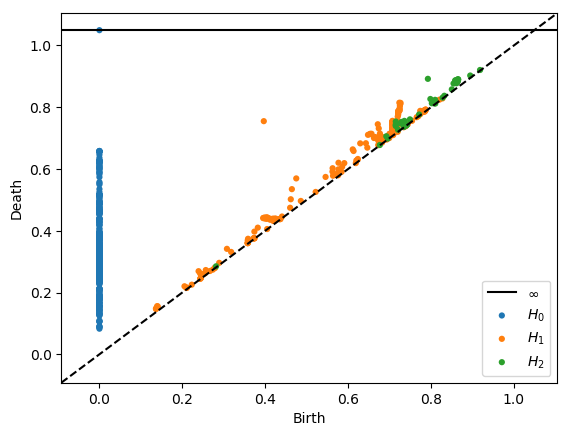

1
2
starting
(550, 50)
[[ 0.019  0.106  0.165 ... -0.12   0.007  0.123]
 [ 0.106  0.165  0.204 ...  0.007  0.123  0.26 ]
 [ 0.165  0.204  0.25  ...  0.123  0.26   0.392]
 ...
 [-0.18  -0.066  0.062 ... -0.295 -0.161 -0.054]
 [-0.066  0.062  0.126 ... -0.161 -0.054  0.04 ]
 [ 0.062  0.126  0.135 ... -0.054  0.04   0.063]]
starting


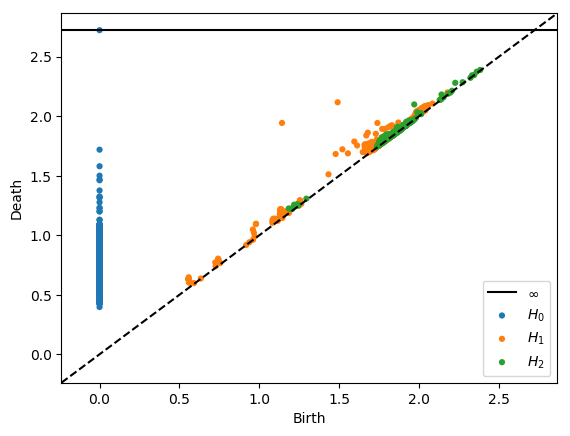

1
2
starting
(550, 50)
[[ 0.552  1.219  1.541 ...  0.113  0.081  0.067]
 [ 1.219  1.541  1.479 ...  0.081  0.067  0.052]
 [ 1.541  1.479  0.491 ...  0.067  0.052  0.023]
 ...
 [-0.117 -0.128 -0.128 ...  0.268  0.257  0.246]
 [-0.128 -0.128 -0.124 ...  0.257  0.246  0.248]
 [-0.128 -0.124 -0.124 ...  0.246  0.248  0.241]]
starting


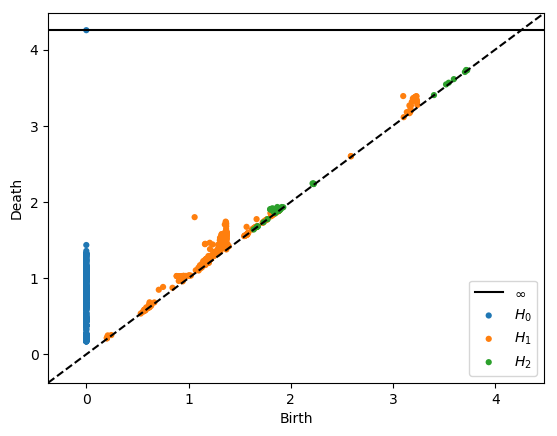

1
2
starting
(550, 50)
[[-0.08  -0.165 -0.191 ...  0.024  0.041  0.031]
 [-0.165 -0.191 -0.203 ...  0.041  0.031  0.01 ]
 [-0.191 -0.203 -0.185 ...  0.031  0.01   0.001]
 ...
 [ 0.38  -0.143 -0.114 ... -0.01  -0.022 -0.031]
 [-0.143 -0.114 -0.098 ... -0.022 -0.031 -0.025]
 [-0.114 -0.098 -0.076 ... -0.031 -0.025  0.044]]
starting


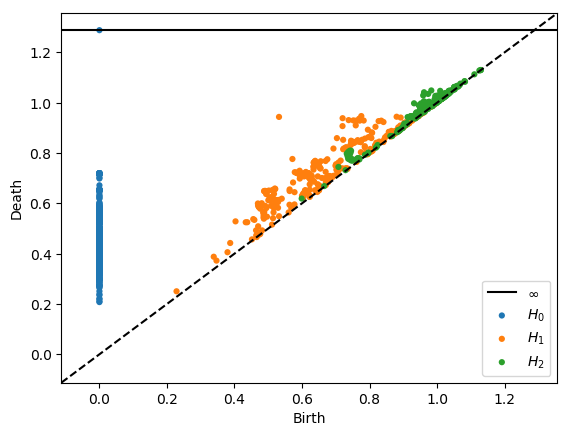

1
2
starting
(550, 50)
[[ 0.001 -0.005  0.003 ...  0.024  0.026  0.026]
 [-0.005  0.003  0.044 ...  0.026  0.026  0.019]
 [ 0.003  0.044  0.033 ...  0.026  0.019  0.01 ]
 ...
 [-0.017 -0.004  0.028 ...  0.023  0.016  0.02 ]
 [-0.004  0.028  0.027 ...  0.016  0.02   0.032]
 [ 0.028  0.027  0.014 ...  0.02   0.032  0.02 ]]
starting


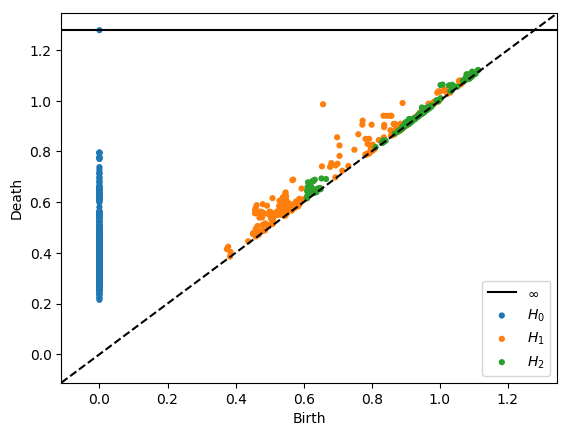

1
2
starting
(550, 50)
[[-0.069 -0.134 -0.144 ... -0.06  -0.048 -0.043]
 [-0.134 -0.144 -0.121 ... -0.048 -0.043 -0.033]
 [-0.144 -0.121 -0.087 ... -0.043 -0.033 -0.023]
 ...
 [-0.017 -0.023 -0.031 ...  0.027  0.121  0.21 ]
 [-0.023 -0.031 -0.026 ...  0.121  0.21   0.276]
 [-0.031 -0.026 -0.02  ...  0.21   0.276  0.352]]
starting


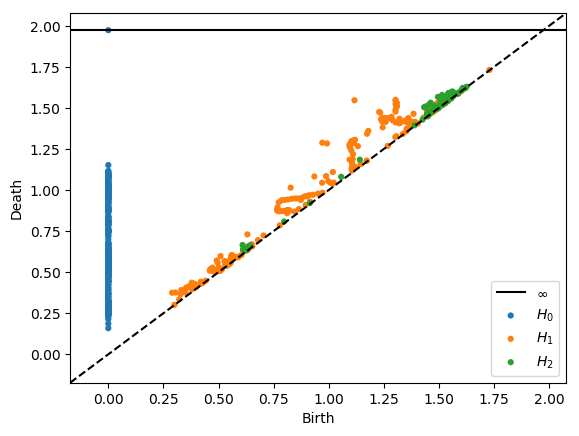

1
2
starting
(550, 50)
[[-0.232 -0.395 -0.35  ... -2.059 -1.586 -1.225]
 [-0.395 -0.35  -0.24  ... -1.586 -1.225 -0.866]
 [-0.35  -0.24  -0.031 ... -1.225 -0.866 -0.132]
 ...
 [-0.061 -0.069 -0.074 ... -0.025 -0.022 -0.018]
 [-0.069 -0.074 -0.076 ... -0.022 -0.018 -0.016]
 [-0.074 -0.076 -0.078 ... -0.018 -0.016 -0.018]]
starting


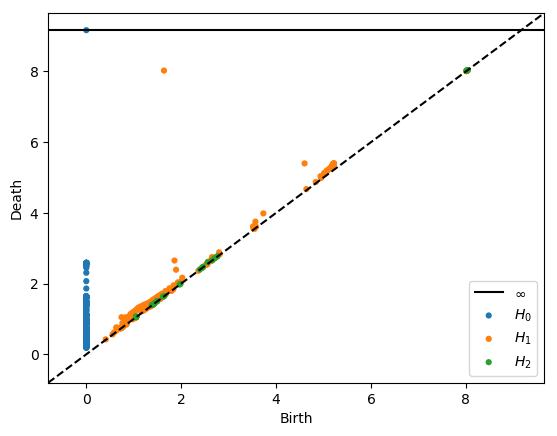

1
2
starting
(550, 50)
[[ 0.125  0.19   0.16  ... -0.051 -0.069 -0.067]
 [ 0.19   0.16   0.141 ... -0.069 -0.067 -0.049]
 [ 0.16   0.141  0.126 ... -0.067 -0.049 -0.038]
 ...
 [ 0.     0.006  0.009 ... -0.043 -0.045 -0.044]
 [ 0.006  0.009  0.005 ... -0.045 -0.044 -0.042]
 [ 0.009  0.005  0.003 ... -0.044 -0.042 -0.044]]
starting


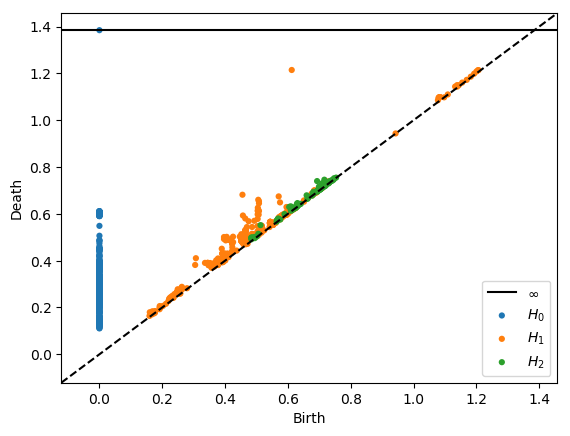

1
2
starting
(550, 50)
[[-0.238 -0.597 -0.695 ...  0.314  0.211  0.084]
 [-0.597 -0.695 -0.694 ...  0.211  0.084 -0.024]
 [-0.695 -0.694 -0.66  ...  0.084 -0.024 -0.058]
 ...
 [ 0.097  0.134  0.213 ... -0.221 -0.135 -0.118]
 [ 0.134  0.213  0.288 ... -0.135 -0.118 -0.114]
 [ 0.213  0.288  0.339 ... -0.118 -0.114 -0.112]]
starting


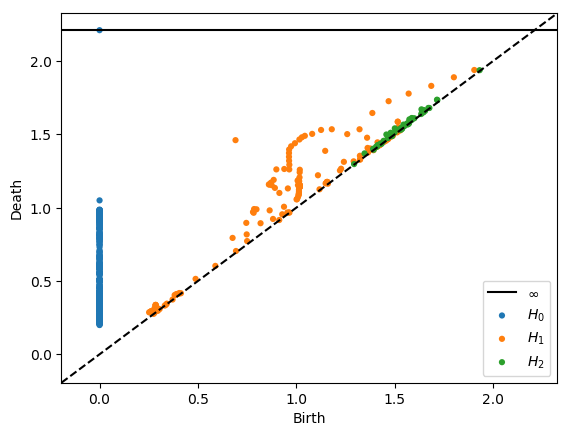

1
2
starting
(550, 50)
[[ 0.006  0.013  0.023 ... -0.206 -0.18  -0.141]
 [ 0.013  0.023  0.034 ... -0.18  -0.141 -0.112]
 [ 0.023  0.034  0.04  ... -0.141 -0.112 -0.081]
 ...
 [-0.018 -0.014 -0.004 ...  0.007  0.036  0.077]
 [-0.014 -0.004 -0.017 ...  0.036  0.077  0.066]
 [-0.004 -0.017 -0.01  ...  0.077  0.066  0.054]]
starting


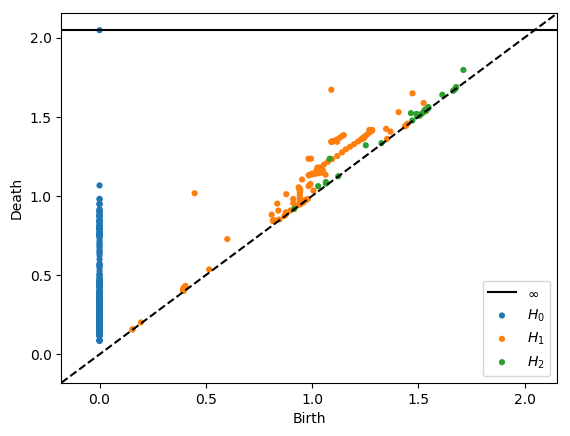

1
2
starting
(550, 50)
[[ 0.164  0.283  0.324 ...  0.532  0.461  0.379]
 [ 0.283  0.324  0.745 ...  0.461  0.379  0.35 ]
 [ 0.324  0.745  0.636 ...  0.379  0.35   0.334]
 ...
 [ 0.417  0.481  0.469 ... -0.029 -0.073 -0.149]
 [ 0.481  0.469  0.438 ... -0.073 -0.149 -0.167]
 [ 0.469  0.438  0.15  ... -0.149 -0.167  0.075]]
starting


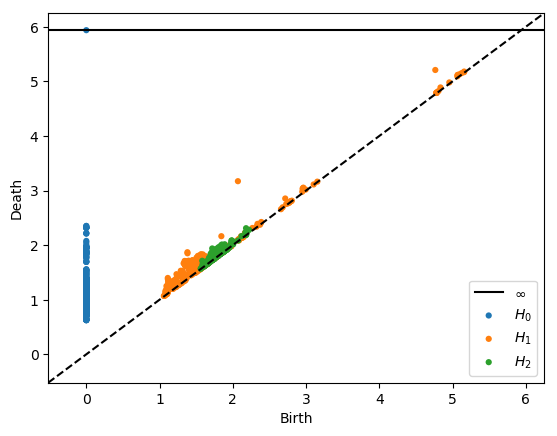

1
2
starting
(550, 50)
[[-0.025 -0.037 -0.057 ...  0.117  0.114  0.065]
 [-0.037 -0.057 -0.068 ...  0.114  0.065  0.046]
 [-0.057 -0.068 -0.08  ...  0.065  0.046  0.039]
 ...
 [ 0.024  0.023  0.015 ...  0.084  0.089  0.094]
 [ 0.023  0.015  0.001 ...  0.089  0.094  0.101]
 [ 0.015  0.001 -0.199 ...  0.094  0.101  0.107]]
starting


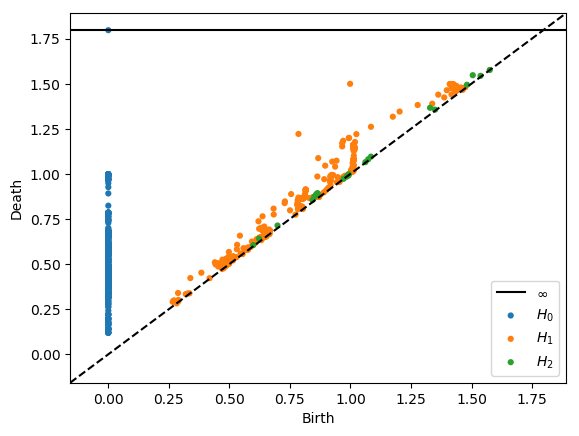

1
2
starting
(550, 50)
[[-0.014 -0.045 -0.04  ... -0.215 -0.208 -0.155]
 [-0.045 -0.04  -0.024 ... -0.208 -0.155 -0.128]
 [-0.04  -0.024 -0.002 ... -0.155 -0.128 -0.147]
 ...
 [ 0.025  0.437  1.629 ... -0.424 -0.158 -0.154]
 [ 0.437  1.629 -0.144 ... -0.158 -0.154 -0.173]
 [ 1.629 -0.144 -0.215 ... -0.154 -0.173 -0.164]]
starting


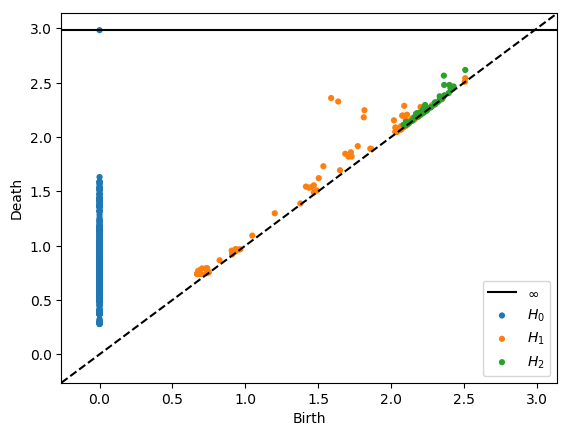

1
2
starting
(550, 50)
[[-0.012 -0.014 -0.03  ...  0.038  0.045  0.075]
 [-0.014 -0.03  -0.038 ...  0.045  0.075  0.101]
 [-0.03  -0.038 -0.089 ...  0.075  0.101  0.12 ]
 ...
 [-0.052 -0.062 -0.064 ... -0.069 -0.078 -0.077]
 [-0.062 -0.064 -0.05  ... -0.078 -0.077 -0.079]
 [-0.064 -0.05  -0.023 ... -0.077 -0.079 -0.089]]
starting


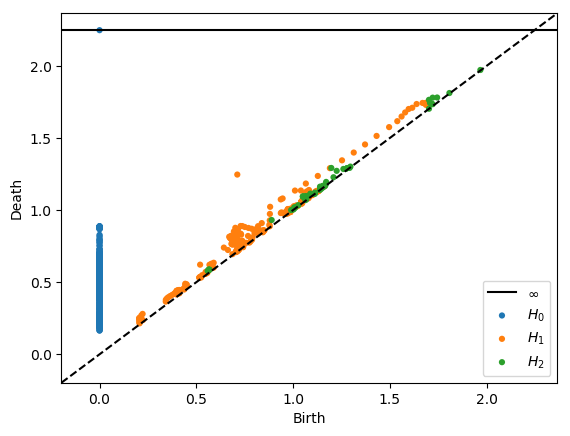

1
2
starting
(550, 50)
[[ 0.157  0.205  0.27  ...  0.035  0.041  0.046]
 [ 0.205  0.27   0.295 ...  0.041  0.046  0.06 ]
 [ 0.27   0.295  0.294 ...  0.046  0.06   0.075]
 ...
 [-0.098 -0.099 -0.099 ...  0.019  0.023  0.024]
 [-0.099 -0.099 -0.091 ...  0.023  0.024  0.027]
 [-0.099 -0.091 -0.073 ...  0.024  0.027  0.028]]
starting


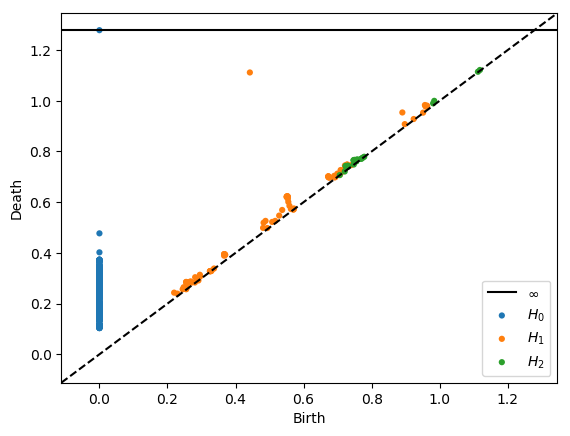

1
2
starting
(550, 50)
[[-0.111 -0.195 -0.28  ... -0.723 -0.058  0.108]
 [-0.195 -0.28  -0.91  ... -0.058  0.108  0.008]
 [-0.28  -0.91  -0.845 ...  0.108  0.008 -0.014]
 ...
 [ 0.006 -0.007 -0.013 ... -0.051 -0.072 -0.121]
 [-0.007 -0.013 -0.023 ... -0.072 -0.121 -0.175]
 [-0.013 -0.023 -0.079 ... -0.121 -0.175 -0.218]]
starting


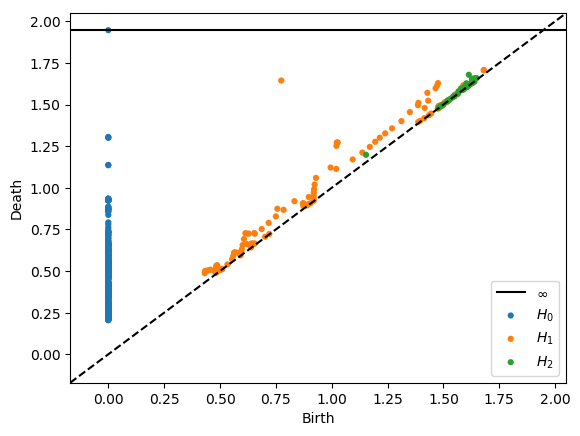

1
2
starting
(550, 50)
[[-0.035 -0.15  -0.172 ...  0.164  0.175  0.115]
 [-0.15  -0.172 -0.18  ...  0.175  0.115 -0.026]
 [-0.172 -0.18  -0.19  ...  0.115 -0.026 -0.12 ]
 ...
 [ 0.193  0.215  0.225 ...  0.035  0.052  0.088]
 [ 0.215  0.225  0.152 ...  0.052  0.088  0.169]
 [ 0.225  0.152  0.033 ...  0.088  0.169  0.196]]
starting


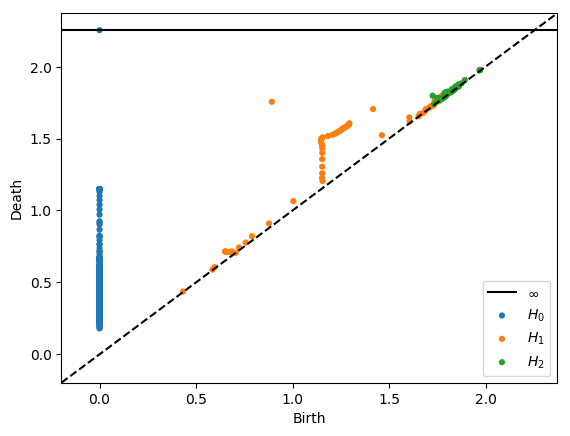

1
2
starting
(550, 50)
[[-0.069 -0.102 -0.072 ...  0.189  0.023  0.004]
 [-0.102 -0.072 -0.059 ...  0.023  0.004  0.003]
 [-0.072 -0.059 -0.047 ...  0.004  0.003  0.002]
 ...
 [ 0.022 -0.003 -0.031 ...  0.095 -0.003 -0.116]
 [-0.003 -0.031 -0.047 ... -0.003 -0.116 -0.125]
 [-0.031 -0.047 -0.06  ... -0.116 -0.125 -0.089]]
starting


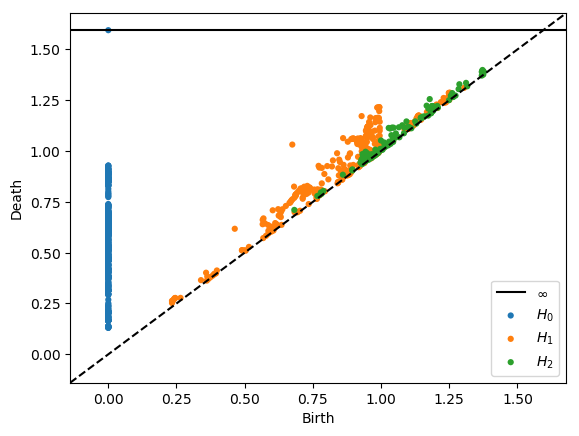

1
2
starting
(550, 50)
[[-0.18  -0.392 -0.485 ...  0.252  0.246  0.183]
 [-0.392 -0.485 -0.633 ...  0.246  0.183  0.047]
 [-0.485 -0.633 -0.676 ...  0.183  0.047 -0.042]
 ...
 [-0.041 -0.048  0.263 ... -0.046 -0.041  0.325]
 [-0.048  0.263  0.415 ... -0.041  0.325  0.407]
 [ 0.263  0.415 -0.382 ...  0.325  0.407 -0.354]]
starting


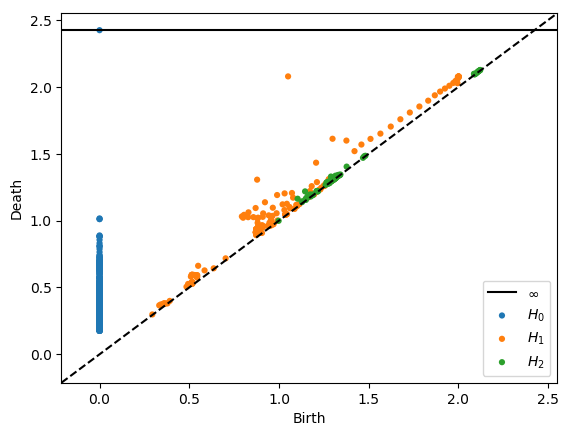

1
2
starting
(550, 50)
[[-1.084 -2.007 -1.807 ...  0.336  0.336  0.301]
 [-2.007 -1.807 -1.663 ...  0.336  0.301  0.275]
 [-1.807 -1.663 -1.625 ...  0.301  0.275  0.233]
 ...
 [-0.071 -0.054 -0.027 ...  0.114 -0.014 -0.126]
 [-0.054 -0.027 -0.017 ... -0.014 -0.126 -0.119]
 [-0.027 -0.017 -0.009 ... -0.126 -0.119 -0.106]]
starting


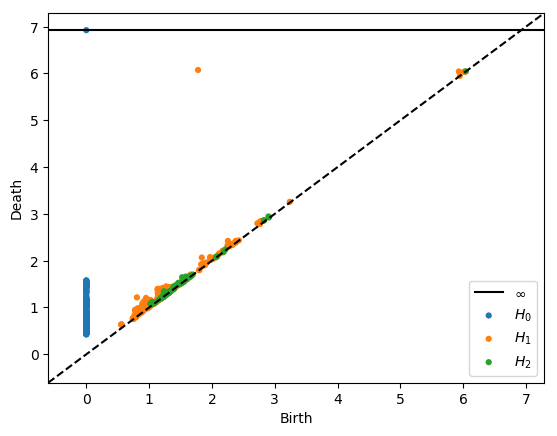

1
2
starting
(550, 50)
[[-0.59  -0.915 -0.623 ... -0.062 -0.128 -0.149]
 [-0.915 -0.623 -0.668 ... -0.128 -0.149 -0.123]
 [-0.623 -0.668 -0.702 ... -0.149 -0.123  0.074]
 ...
 [-0.046 -0.02  -0.001 ... -0.039  0.088  0.384]
 [-0.02  -0.001  0.016 ...  0.088  0.384  0.288]
 [-0.001  0.016  0.03  ...  0.384  0.288 -0.116]]
starting


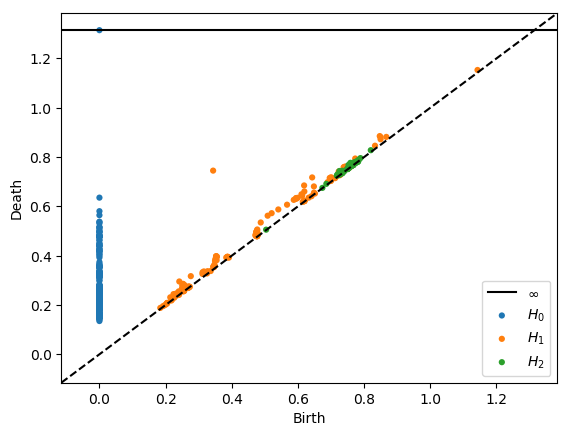

1
2
starting
(550, 50)
[[ 0.08   0.189  0.216 ...  0.003  0.002 -0.004]
 [ 0.189  0.216  0.227 ...  0.002 -0.004 -0.003]
 [ 0.216  0.227  0.232 ... -0.004 -0.003  0.001]
 ...
 [ 0.052  0.042  0.031 ... -0.069 -0.063 -0.057]
 [ 0.042  0.031  0.049 ... -0.063 -0.057 -0.05 ]
 [ 0.031  0.049  0.087 ... -0.057 -0.05  -0.038]]
starting


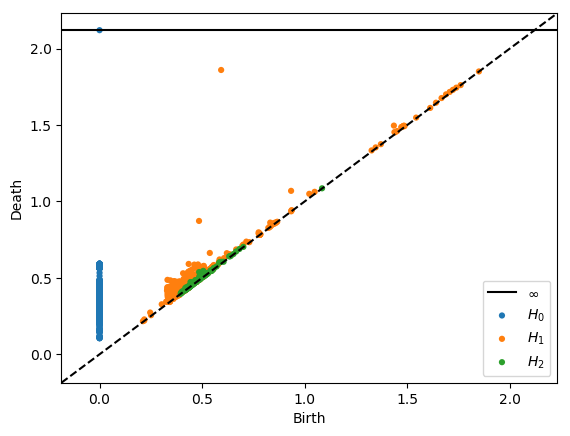

1
2
starting
(550, 50)
[[-0.212 -0.353 -0.368 ... -0.036 -0.043 -0.047]
 [-0.353 -0.368 -0.345 ... -0.043 -0.047 -0.05 ]
 [-0.368 -0.345 -0.317 ... -0.047 -0.05  -0.052]
 ...
 [-0.037 -0.035 -0.034 ... -0.077 -0.074 -0.073]
 [-0.035 -0.034 -0.027 ... -0.074 -0.073 -0.067]
 [-0.034 -0.027 -0.023 ... -0.073 -0.067 -0.059]]
starting


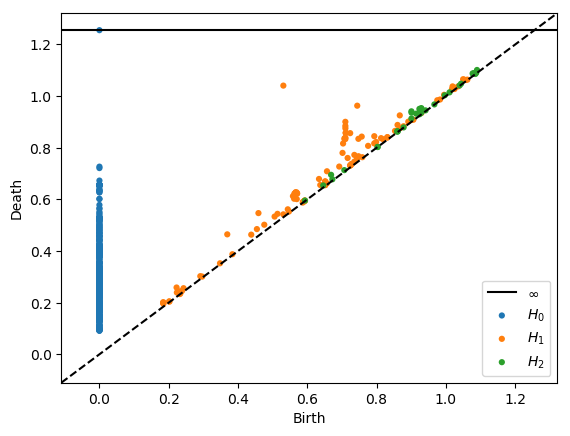

1
2
starting
(550, 50)
[[-0.077 -0.199 -0.217 ... -0.06  -0.045 -0.033]
 [-0.199 -0.217 -0.219 ... -0.045 -0.033 -0.025]
 [-0.217 -0.219 -0.201 ... -0.033 -0.025 -0.022]
 ...
 [-0.045 -0.035 -0.024 ... -0.041 -0.034 -0.036]
 [-0.035 -0.024 -0.033 ... -0.034 -0.036 -0.035]
 [-0.024 -0.033 -0.044 ... -0.036 -0.035 -0.036]]
starting


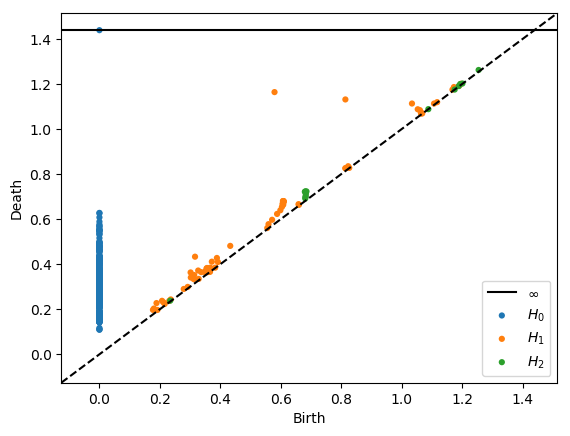

1
2
starting
(550, 50)
[[ 0.128  0.321  0.363 ... -0.126 -0.114 -0.125]
 [ 0.321  0.363  0.303 ... -0.114 -0.125 -0.132]
 [ 0.363  0.303  0.285 ... -0.125 -0.132 -0.134]
 ...
 [ 0.173  0.179  0.271 ... -0.04  -0.027 -0.009]
 [ 0.179  0.271  0.567 ... -0.027 -0.009  0.021]
 [ 0.271  0.567  0.274 ... -0.009  0.021  0.049]]
starting


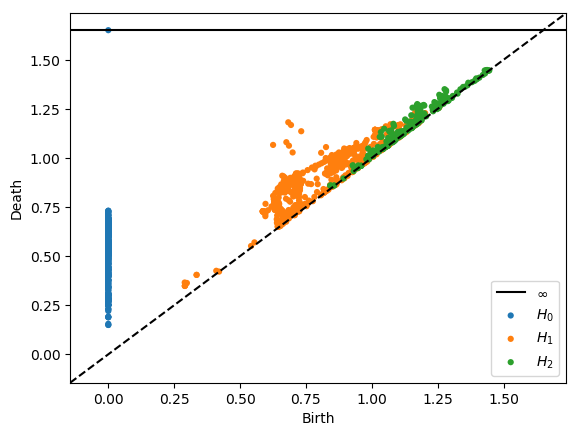

1
2
starting
(550, 50)
[[ 0.318  0.561  0.53  ...  0.049  0.065  0.067]
 [ 0.561  0.53   0.506 ...  0.065  0.067  0.065]
 [ 0.53   0.506  0.45  ...  0.067  0.065  0.068]
 ...
 [-0.004  0.002  0.016 ...  0.008  0.008  0.009]
 [ 0.002  0.016  0.443 ...  0.008  0.009  0.016]
 [ 0.016  0.443  0.524 ...  0.009  0.016  0.01 ]]
starting


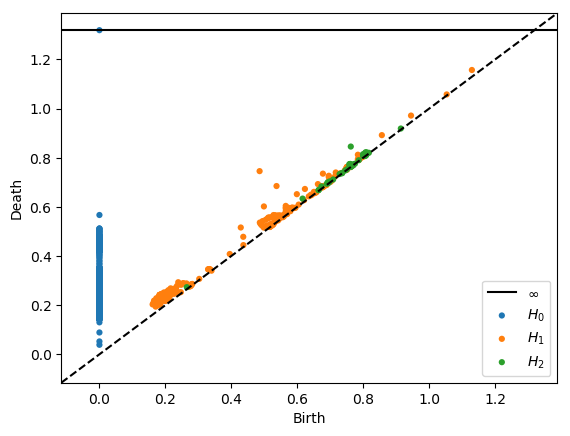

1
2
starting
(550, 50)
[[-0.025 -0.039 -0.056 ... -0.091 -0.098 -0.122]
 [-0.039 -0.056 -0.067 ... -0.098 -0.122 -0.151]
 [-0.056 -0.067 -0.072 ... -0.122 -0.151 -0.171]
 ...
 [ 0.034  0.042  0.036 ... -0.139 -0.178 -0.216]
 [ 0.042  0.036  0.032 ... -0.178 -0.216 -0.285]
 [ 0.036  0.032  0.033 ... -0.216 -0.285 -0.364]]
starting


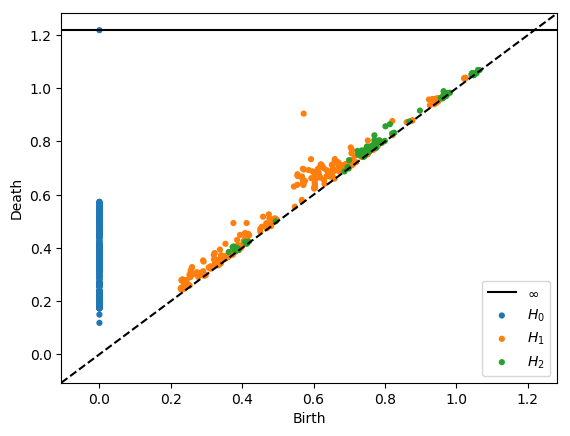

1
2
starting
(550, 50)
[[-0.014 -0.021 -0.03  ... -0.15  -0.135 -0.128]
 [-0.021 -0.03  -0.036 ... -0.135 -0.128 -0.124]
 [-0.03  -0.036 -0.051 ... -0.128 -0.124 -0.117]
 ...
 [-0.037 -0.022  0.    ... -0.017  0.036  0.101]
 [-0.022  0.     0.035 ...  0.036  0.101  0.12 ]
 [ 0.     0.035  0.076 ...  0.101  0.12   0.123]]
starting


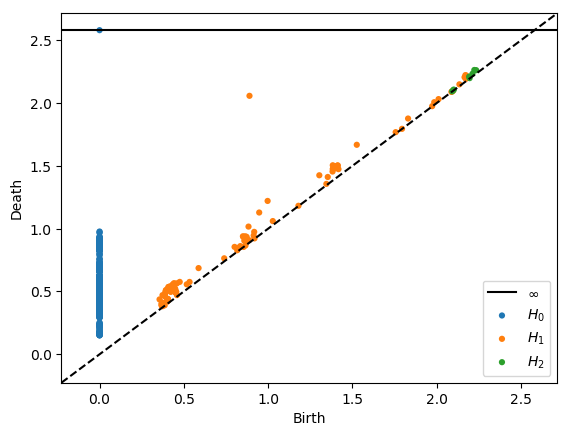

1
2
starting
(550, 50)
[[-1.490e-01 -3.720e-01 -4.650e-01 ... -6.580e-01 -8.540e-01 -1.053e+00]
 [-3.720e-01 -4.650e-01 -3.730e-01 ... -8.540e-01 -1.053e+00 -1.200e+00]
 [-4.650e-01 -3.730e-01 -1.800e-02 ... -1.053e+00 -1.200e+00 -1.297e+00]
 ...
 [ 1.500e-02 -1.000e-02 -3.100e-02 ... -2.840e-01 -3.990e-01 -1.000e-03]
 [-1.000e-02 -3.100e-02 -6.600e-02 ... -3.990e-01 -1.000e-03 -6.000e-03]
 [-3.100e-02 -6.600e-02 -1.060e-01 ... -1.000e-03 -6.000e-03  1.900e-02]]
starting


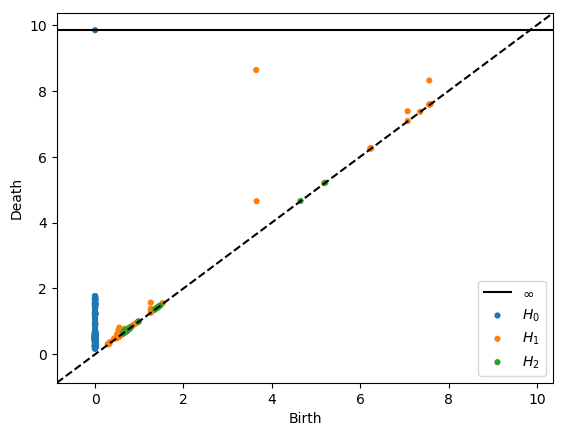

1
2
starting
(550, 50)
[[-0.475 -0.785 -0.39  ... -0.46  -0.414 -0.39 ]
 [-0.785 -0.39   0.075 ... -0.414 -0.39  -0.369]
 [-0.39   0.075  0.565 ... -0.39  -0.369 -0.349]
 ...
 [ 1.049  0.315 -0.091 ... -0.005  0.     0.022]
 [ 0.315 -0.091 -0.031 ...  0.     0.022  0.042]
 [-0.091 -0.031  0.015 ...  0.022  0.042  0.026]]
starting


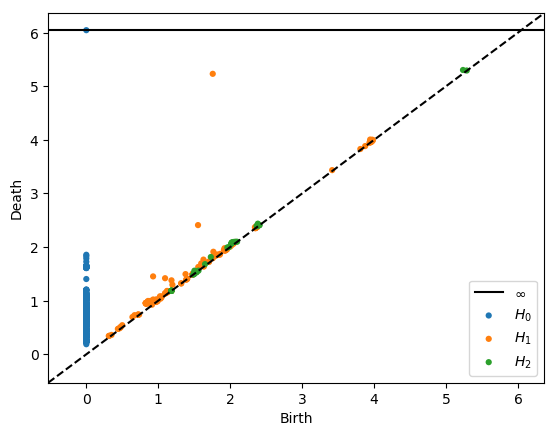

1
2
starting
(550, 50)
[[-0.009 -0.015 -0.046 ... -0.223 -0.147 -0.135]
 [-0.015 -0.046 -0.033 ... -0.147 -0.135 -0.175]
 [-0.046 -0.033  0.004 ... -0.135 -0.175 -0.187]
 ...
 [ 0.242  0.283  0.38  ...  0.373  0.523  0.626]
 [ 0.283  0.38   0.361 ...  0.523  0.626  0.639]
 [ 0.38   0.361  0.281 ...  0.626  0.639  0.574]]
starting


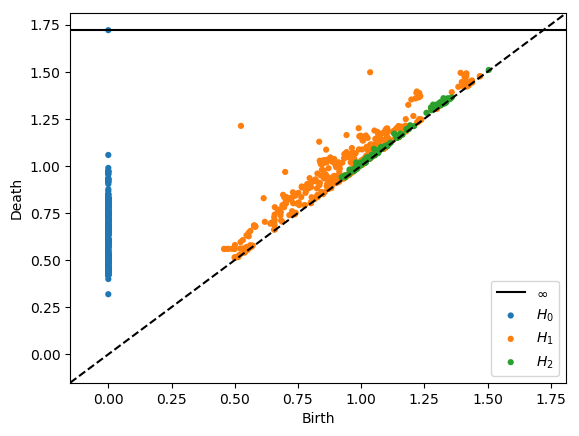

1
2
starting
(550, 50)
[[ 0.041  0.1    0.135 ... -0.105 -0.084 -0.058]
 [ 0.1    0.135  0.149 ... -0.084 -0.058 -0.029]
 [ 0.135  0.149  0.134 ... -0.058 -0.029  0.027]
 ...
 [-0.031 -0.045 -0.053 ... -0.01  -0.009 -0.007]
 [-0.045 -0.053 -0.057 ... -0.009 -0.007 -0.009]
 [-0.053 -0.057 -0.063 ... -0.007 -0.009 -0.015]]
starting


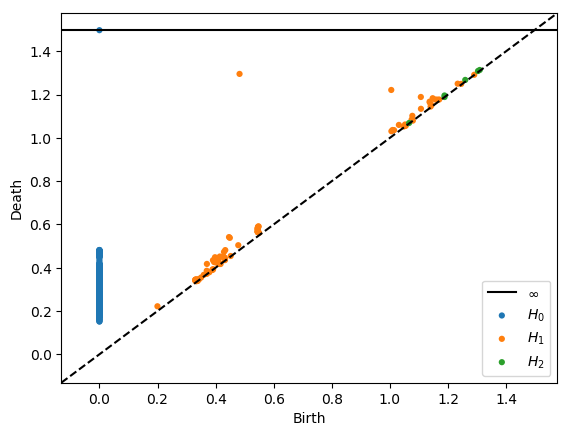

1
2
starting
(550, 50)
[[-0.25  -0.446 -0.445 ... -0.107 -0.112 -0.107]
 [-0.446 -0.445 -0.435 ... -0.112 -0.107 -0.092]
 [-0.445 -0.435 -0.417 ... -0.107 -0.092 -0.088]
 ...
 [ 0.205  0.208  0.184 ...  0.214  0.219  0.214]
 [ 0.208  0.184  0.057 ...  0.219  0.214  0.119]
 [ 0.184  0.057 -0.085 ...  0.214  0.119 -0.015]]
starting


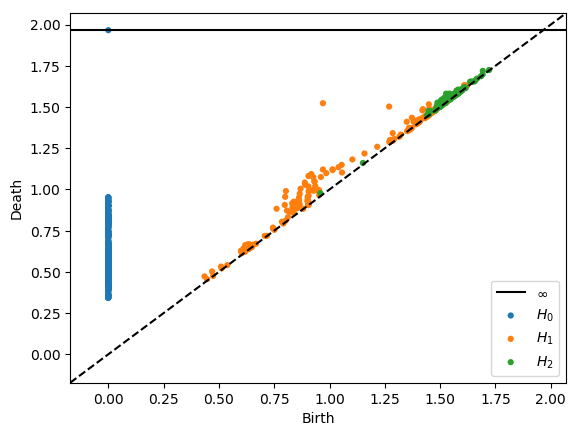

1
2
starting
(550, 50)
[[ 0.302  0.891  0.996 ...  0.048 -0.007 -0.039]
 [ 0.891  0.996  0.888 ... -0.007 -0.039 -0.047]
 [ 0.996  0.888  0.835 ... -0.039 -0.047 -0.042]
 ...
 [ 0.017  0.007  0.003 ...  0.029  0.022  0.021]
 [ 0.007  0.003  0.002 ...  0.022  0.021  0.022]
 [ 0.003  0.002  0.006 ...  0.021  0.022  0.03 ]]
starting


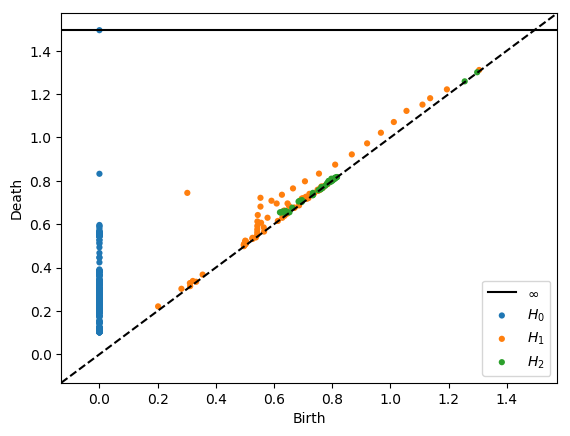

1
2
starting
(550, 50)
[[ 0.481  0.728  0.493 ...  0.112  0.227  0.248]
 [ 0.728  0.493  0.596 ...  0.227  0.248  0.281]
 [ 0.493  0.596  0.664 ...  0.248  0.281  0.468]
 ...
 [-0.039 -0.053 -0.078 ...  0.06   0.116  0.198]
 [-0.053 -0.078 -0.112 ...  0.116  0.198  0.241]
 [-0.078 -0.112 -0.137 ...  0.198  0.241  0.222]]
starting


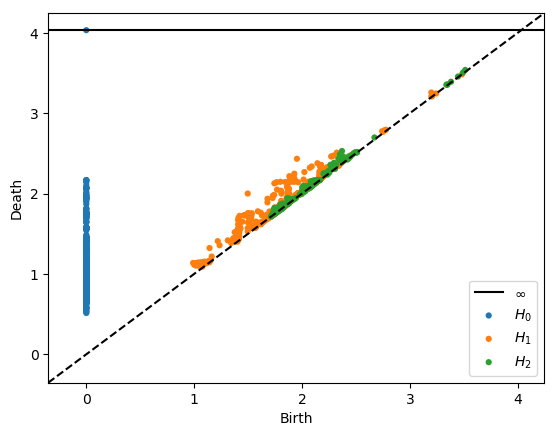

1
2
starting
(550, 50)
[[-0.232 -0.431 -0.407 ... -0.122 -0.094  0.   ]
 [-0.431 -0.407 -0.348 ... -0.094  0.     0.052]
 [-0.407 -0.348 -0.316 ...  0.     0.052  0.015]
 ...
 [-0.008  0.002  0.    ... -0.046 -0.049 -0.054]
 [ 0.002  0.    -0.013 ... -0.049 -0.054 -0.067]
 [ 0.    -0.013 -0.027 ... -0.054 -0.067 -0.066]]
starting


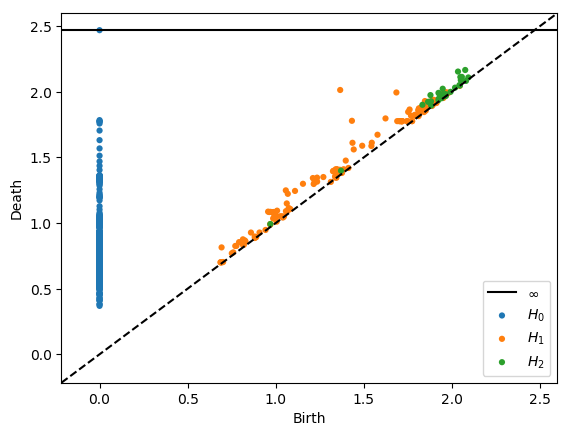

1
2
starting
(550, 50)
[[-0.46  -0.89  -0.895 ...  0.504  0.369  0.126]
 [-0.89  -0.895 -0.872 ...  0.369  0.126 -0.131]
 [-0.895 -0.872 -0.811 ...  0.126 -0.131 -0.307]
 ...
 [-0.002  0.052  0.104 ... -0.077 -0.067 -0.05 ]
 [ 0.052  0.104  0.127 ... -0.067 -0.05  -0.024]
 [ 0.104  0.127  0.136 ... -0.05  -0.024 -0.007]]
starting


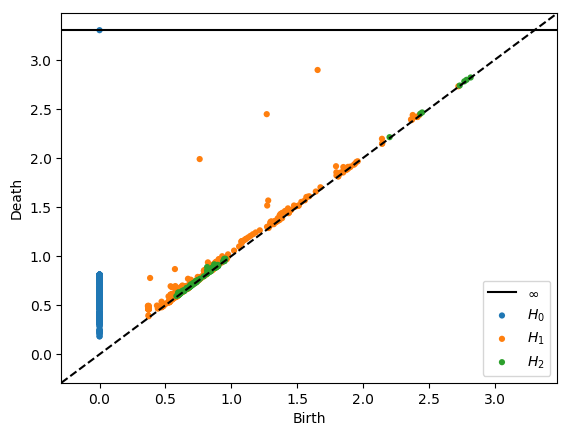

1
2
starting
(550, 50)
[[-0.003 -0.009 -0.019 ... -0.051  0.042  0.178]
 [-0.009 -0.019 -0.032 ...  0.042  0.178  0.108]
 [-0.019 -0.032 -0.035 ...  0.178  0.108  0.006]
 ...
 [ 0.018  0.005  0.002 ... -0.071 -0.128 -0.065]
 [ 0.005  0.002  0.026 ... -0.128 -0.065 -0.064]
 [ 0.002  0.026  0.188 ... -0.065 -0.064 -0.073]]
starting


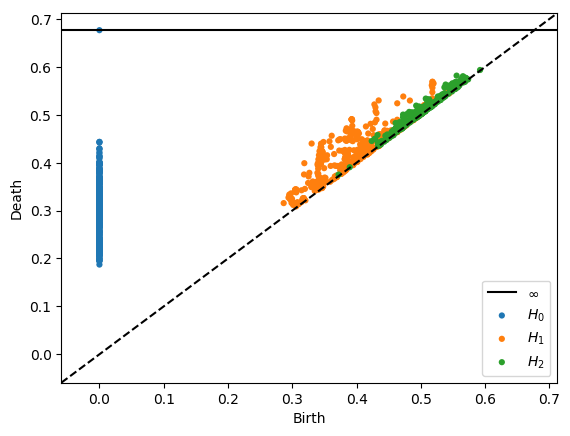

1
2
starting
(550, 50)
[[-0.066 -0.114 -0.09  ... -0.214 -0.17  -0.163]
 [-0.114 -0.09  -0.074 ... -0.17  -0.163 -0.168]
 [-0.09  -0.074 -0.056 ... -0.163 -0.168 -0.192]
 ...
 [ 0.038  0.023 -0.003 ... -0.076 -0.079 -0.082]
 [ 0.023 -0.003 -0.033 ... -0.079 -0.082 -0.094]
 [-0.003 -0.033 -0.053 ... -0.082 -0.094 -0.101]]
starting


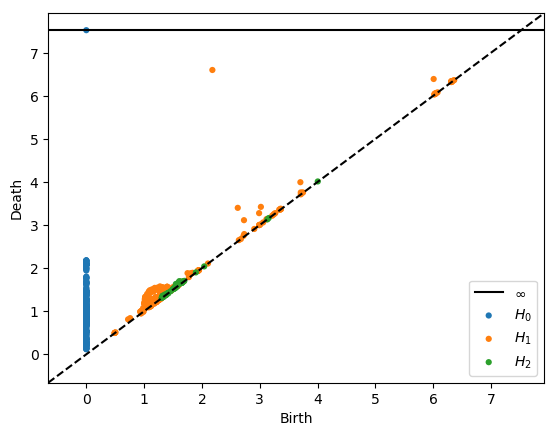

1
2
starting
(550, 50)
[[ 0.465  0.469 -0.025 ...  0.066  0.057  0.051]
 [ 0.469 -0.025 -0.072 ...  0.057  0.051  0.042]
 [-0.025 -0.072 -0.075 ...  0.051  0.042  0.028]
 ...
 [ 0.06   0.046  0.025 ... -0.058 -0.034 -0.038]
 [ 0.046  0.025  0.027 ... -0.034 -0.038 -0.031]
 [ 0.025  0.027  0.052 ... -0.038 -0.031 -0.02 ]]
starting


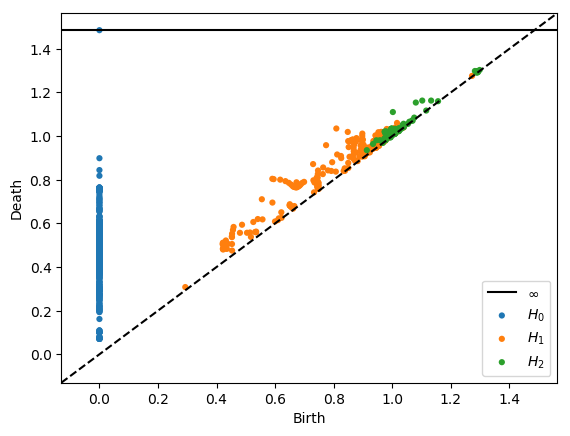

1
2
starting
(550, 50)
[[ 0.126  0.207  0.218 ... -0.024 -0.046 -0.063]
 [ 0.207  0.218  0.184 ... -0.046 -0.063 -0.055]
 [ 0.218  0.184  0.16  ... -0.063 -0.055 -0.034]
 ...
 [ 0.217  0.235  0.246 ...  0.017  0.006 -0.006]
 [ 0.235  0.246  0.251 ...  0.006 -0.006 -0.014]
 [ 0.246  0.251  0.256 ... -0.006 -0.014 -0.021]]
starting


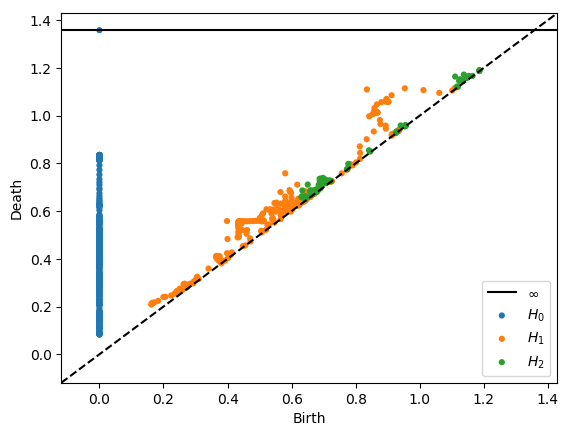

1
2
starting
(550, 50)
[[ 0.002 -0.007 -0.303 ... -0.029  0.036  0.502]
 [-0.007 -0.303 -0.356 ...  0.036  0.502  0.476]
 [-0.303 -0.356 -0.067 ...  0.502  0.476 -0.184]
 ...
 [ 0.076 -0.156 -0.178 ...  0.109  0.076  0.046]
 [-0.156 -0.178 -0.091 ...  0.076  0.046 -0.668]
 [-0.178 -0.091 -0.024 ...  0.046 -0.668 -0.491]]
starting


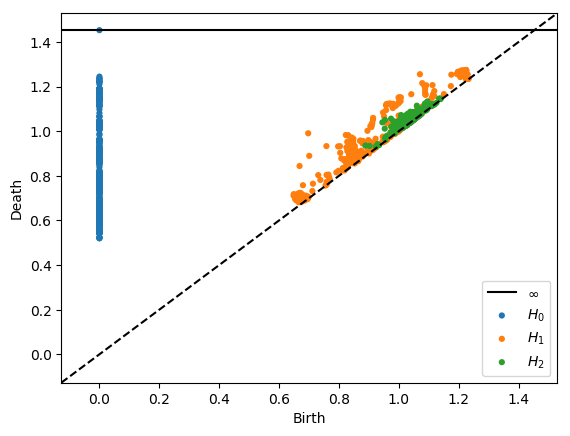

1
2
starting
(550, 50)
[[-0.409 -0.793 -0.797 ...  0.066  0.024  0.006]
 [-0.793 -0.797 -0.291 ...  0.024  0.006 -0.009]
 [-0.797 -0.291  0.032 ...  0.006 -0.009 -0.021]
 ...
 [-0.029 -0.047 -0.023 ... -0.109 -0.09  -0.084]
 [-0.047 -0.023 -0.005 ... -0.09  -0.084 -0.081]
 [-0.023 -0.005 -0.027 ... -0.084 -0.081 -0.075]]
starting


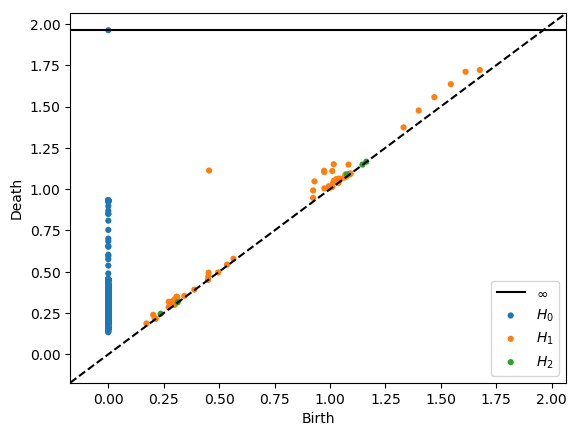

1
2
starting
(550, 50)
[[-0.011 -0.012 -0.009 ... -0.057 -0.047 -0.035]
 [-0.012 -0.009 -0.001 ... -0.047 -0.035 -0.011]
 [-0.009 -0.001  0.    ... -0.035 -0.011  0.006]
 ...
 [ 0.587 -0.204 -0.395 ...  0.004  0.049  0.08 ]
 [-0.204 -0.395 -0.312 ...  0.049  0.08   0.111]
 [-0.395 -0.312 -0.26  ...  0.08   0.111  0.103]]
starting


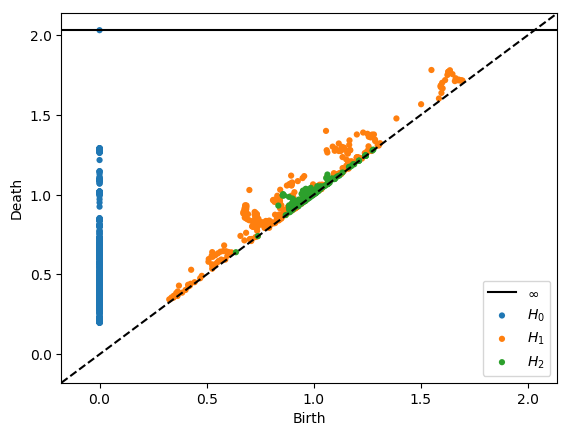

1
2
starting
(550, 50)
[[ 0.749  1.378  1.347 ... -0.098 -0.11  -0.116]
 [ 1.378  1.347  1.296 ... -0.11  -0.116 -0.119]
 [ 1.347  1.296  1.254 ... -0.116 -0.119 -0.123]
 ...
 [-0.105 -0.098 -0.094 ...  0.127  0.131  0.132]
 [-0.098 -0.094 -0.08  ...  0.131  0.132  0.138]
 [-0.094 -0.08  -0.083 ...  0.132  0.138  0.143]]
starting


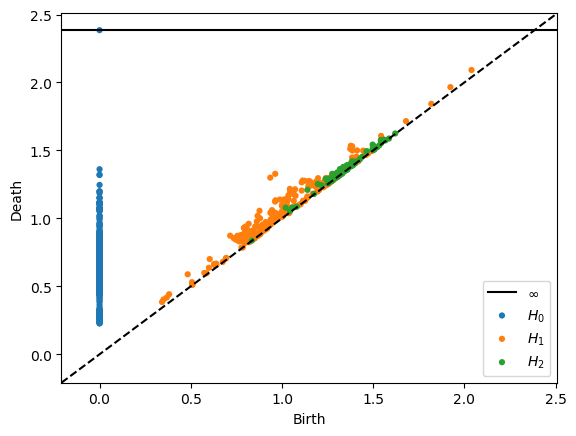

1
2
starting
(550, 50)
[[ 0.005  0.011  0.046 ... -0.005  0.004  0.02 ]
 [ 0.011  0.046  0.071 ...  0.004  0.02   0.036]
 [ 0.046  0.071  0.088 ...  0.02   0.036  0.064]
 ...
 [-0.132  0.     0.138 ... -0.026 -0.013  0.044]
 [ 0.     0.138  0.036 ... -0.013  0.044  0.079]
 [ 0.138  0.036  0.001 ...  0.044  0.079  0.09 ]]
starting


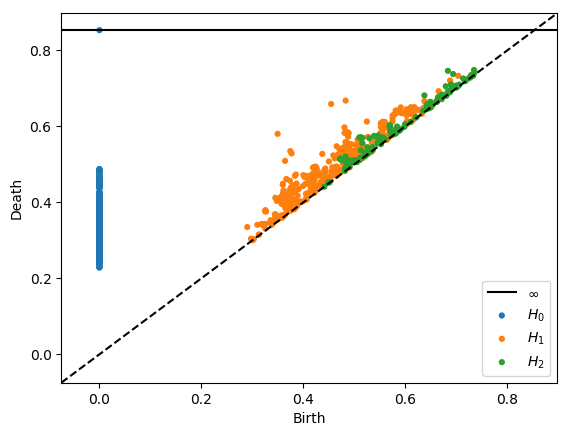

1
2
starting
(550, 50)
[[-0.035  0.169  0.414 ...  0.001 -0.012 -0.018]
 [ 0.169  0.414  0.156 ... -0.012 -0.018 -0.011]
 [ 0.414  0.156 -0.06  ... -0.018 -0.011  0.   ]
 ...
 [-0.016 -0.038 -0.047 ... -0.073 -0.072 -0.074]
 [-0.038 -0.047 -0.041 ... -0.072 -0.074 -0.069]
 [-0.047 -0.041  0.006 ... -0.074 -0.069 -0.057]]
starting


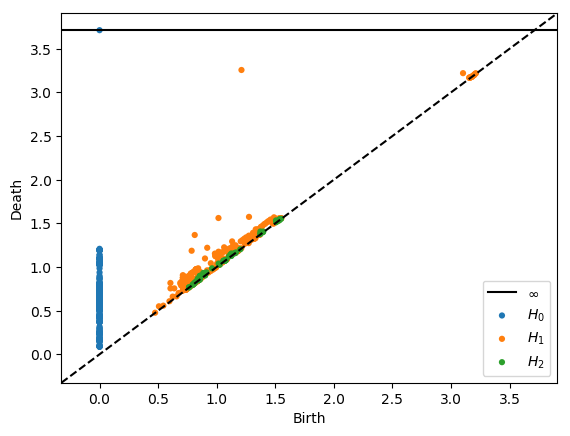

1
2
starting
(550, 50)
[[-0.089 -0.206 -0.218 ... -0.078 -0.04  -0.037]
 [-0.206 -0.218 -0.2   ... -0.04  -0.037 -0.042]
 [-0.218 -0.2   -0.141 ... -0.037 -0.042 -0.048]
 ...
 [-0.727 -0.678 -0.633 ...  0.083  0.072  0.072]
 [-0.678 -0.633 -0.547 ...  0.072  0.072  0.065]
 [-0.633 -0.547 -0.525 ...  0.072  0.065  0.045]]
starting


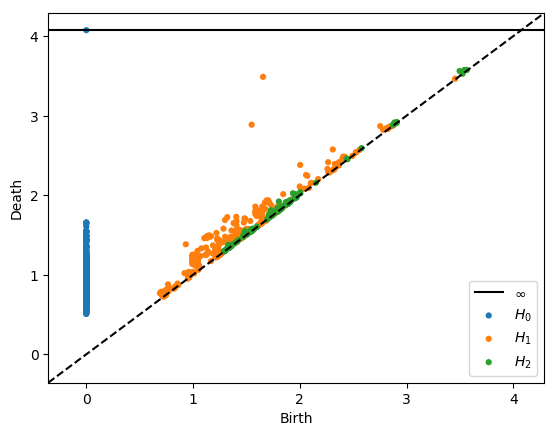

1
2
starting
(550, 50)
[[ 0.34   0.672  0.697 ... -0.601 -0.587 -0.565]
 [ 0.672  0.697  0.708 ... -0.587 -0.565 -0.528]
 [ 0.697  0.708  0.713 ... -0.565 -0.528 -0.504]
 ...
 [ 0.736  0.723  0.7   ... -0.103 -0.249 -0.263]
 [ 0.723  0.7    0.669 ... -0.249 -0.263 -0.237]
 [ 0.7    0.669  0.649 ... -0.263 -0.237 -0.238]]
starting


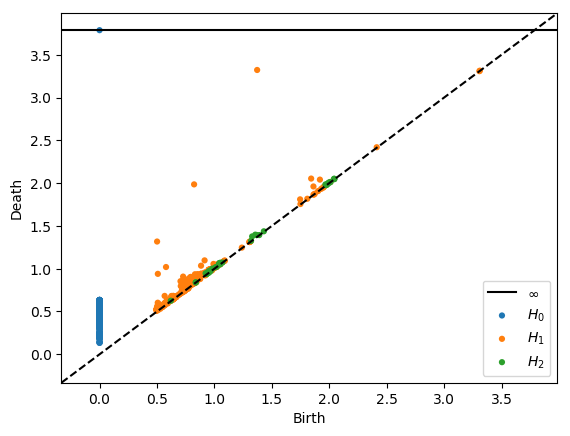

1
2
starting
(550, 50)
[[0.756 1.398 1.444 ... 0.221 0.282 0.356]
 [1.398 1.444 1.481 ... 0.282 0.356 0.425]
 [1.444 1.481 1.448 ... 0.356 0.425 0.434]
 ...
 [0.165 0.184 0.231 ... 0.035 0.024 0.028]
 [0.184 0.231 0.242 ... 0.024 0.028 0.048]
 [0.231 0.242 0.226 ... 0.028 0.048 0.061]]
starting


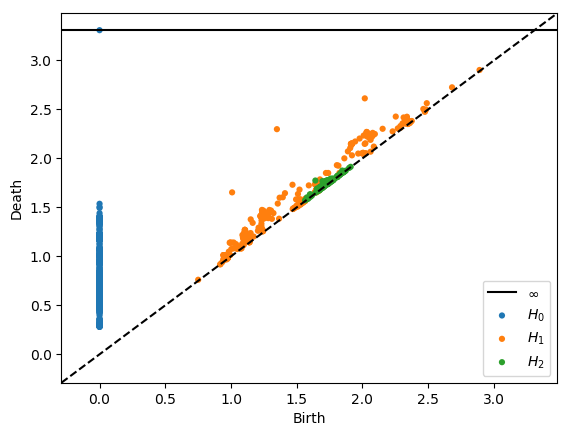

1
2
starting
(550, 50)
[[ 0.065  0.112  0.117 ...  0.084  0.072  0.054]
 [ 0.112  0.117  0.12  ...  0.072  0.054  0.08 ]
 [ 0.117  0.12   0.119 ...  0.054  0.08   0.118]
 ...
 [ 0.033  0.049  0.058 ...  0.143  0.005 -0.023]
 [ 0.049  0.058  0.063 ...  0.005 -0.023 -0.033]
 [ 0.058  0.063  0.051 ... -0.023 -0.033 -0.04 ]]
starting


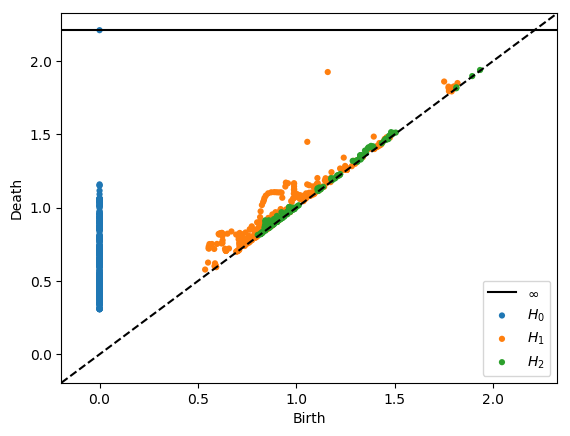

1
2
starting
(550, 50)
[[-0.865 -1.601 -1.525 ...  0.021  0.022  0.036]
 [-1.601 -1.525 -1.464 ...  0.022  0.036 -0.036]
 [-1.525 -1.464 -1.4   ...  0.036 -0.036 -0.051]
 ...
 [ 0.361  0.524 -0.09  ... -0.05  -0.044  0.027]
 [ 0.524 -0.09  -0.101 ... -0.044  0.027  0.423]
 [-0.09  -0.101 -0.056 ...  0.027  0.423  0.243]]
starting


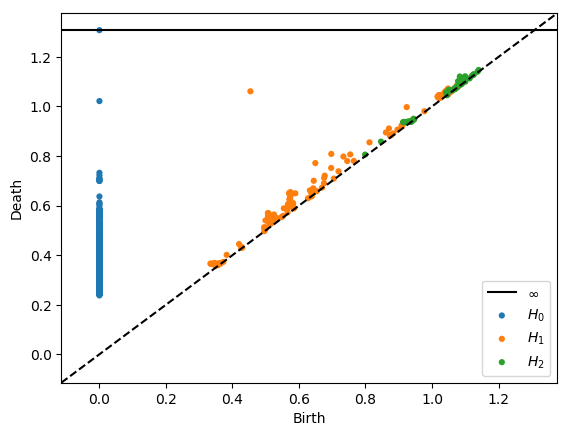

1
2
starting
(550, 50)
[[-0.318 -0.535 -0.545 ...  0.028  0.014  0.008]
 [-0.535 -0.545 -0.528 ...  0.014  0.008 -0.005]
 [-0.545 -0.528 -0.512 ...  0.008 -0.005 -0.012]
 ...
 [ 0.078 -0.003 -0.067 ...  0.02   0.016  0.011]
 [-0.003 -0.067 -0.105 ...  0.016  0.011  0.002]
 [-0.067 -0.105 -0.109 ...  0.011  0.002 -0.004]]
starting


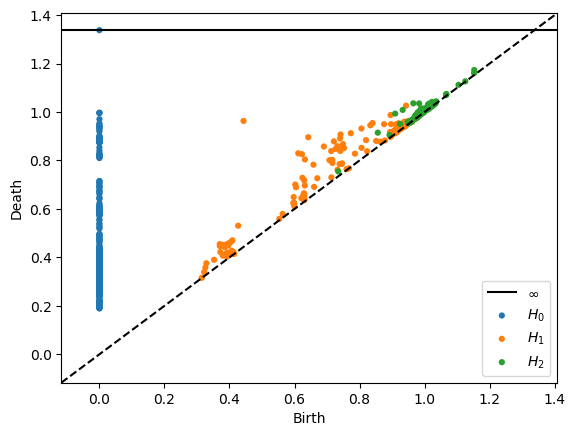

1
2
starting
(550, 50)
[[-0.226 -0.425 -0.398 ... -0.081  0.002  0.211]
 [-0.425 -0.398 -0.352 ...  0.002  0.211  0.178]
 [-0.398 -0.352 -0.302 ...  0.211  0.178  0.137]
 ...
 [ 0.028  0.049  0.027 ... -0.035 -0.04  -0.042]
 [ 0.049  0.027 -0.022 ... -0.04  -0.042 -0.033]
 [ 0.027 -0.022 -0.045 ... -0.042 -0.033 -0.019]]
starting


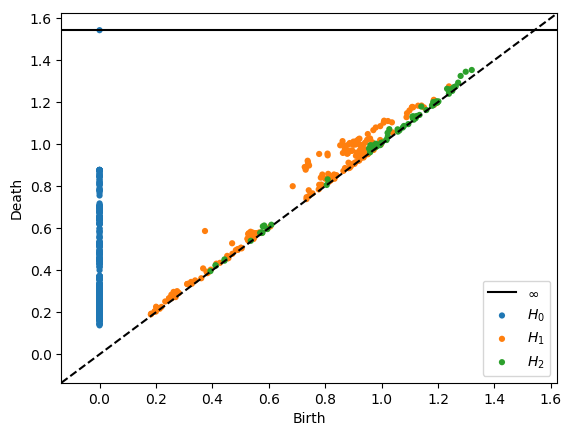

1
2
starting
(550, 50)
[[-0.118 -0.136  0.12  ...  0.146  0.112  0.101]
 [-0.136  0.12  -0.277 ...  0.112  0.101  0.092]
 [ 0.12  -0.277 -0.542 ...  0.101  0.092  0.1  ]
 ...
 [-0.085 -0.073 -0.064 ...  0.46   0.567  0.734]
 [-0.073 -0.064 -0.057 ...  0.567  0.734  0.686]
 [-0.064 -0.057 -0.047 ...  0.734  0.686  0.588]]
starting


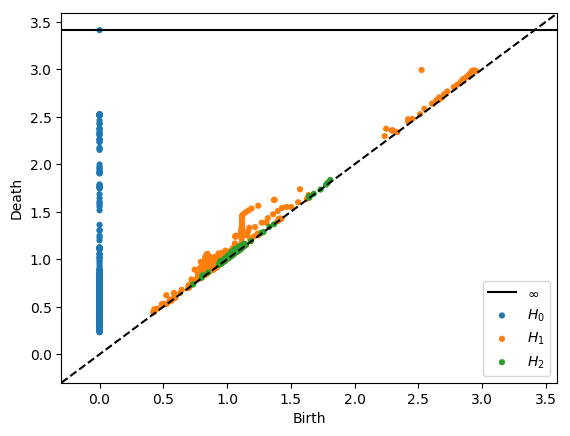

1
2
starting
(550, 50)
[[ 0.589  1.047  1.012 ... -0.133 -0.12  -0.103]
 [ 1.047  1.012  1.003 ... -0.12  -0.103 -0.092]
 [ 1.012  1.003  0.995 ... -0.103 -0.092  0.283]
 ...
 [-0.035 -0.03  -0.014 ...  0.035  0.047  0.014]
 [-0.03  -0.014  0.031 ...  0.047  0.014 -0.003]
 [-0.014  0.031  0.496 ...  0.014 -0.003 -0.016]]
starting


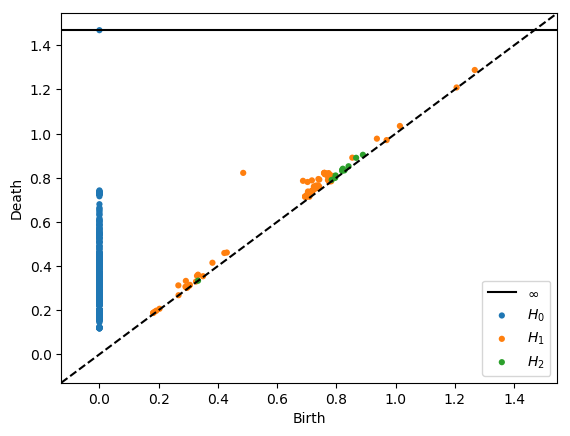

1
2
starting
(550, 50)
[[ 6.680e-01  1.295e+00  1.330e+00 ... -5.970e-01 -5.540e-01 -4.930e-01]
 [ 1.295e+00  1.330e+00  1.291e+00 ... -5.540e-01 -4.930e-01 -4.580e-01]
 [ 1.330e+00  1.291e+00  1.263e+00 ... -4.930e-01 -4.580e-01 -4.510e-01]
 ...
 [-1.500e-02 -8.000e-03  1.000e-03 ...  6.400e-02  8.000e-02  9.300e-02]
 [-8.000e-03  1.000e-03  7.000e-03 ...  8.000e-02  9.300e-02  1.040e-01]
 [ 1.000e-03  7.000e-03 -2.300e-02 ...  9.300e-02  1.040e-01  1.250e-01]]
starting


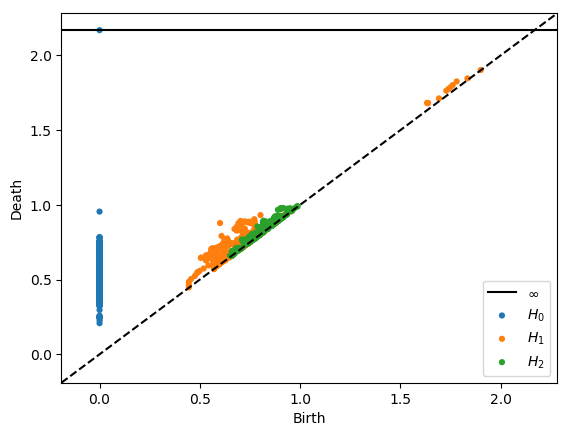

1
2
starting
(550, 50)
[[-0.021 -0.022  0.099 ... -0.091 -0.021  0.034]
 [-0.022  0.099  0.21  ... -0.021  0.034  0.107]
 [ 0.099  0.21   0.23  ...  0.034  0.107  0.108]
 ...
 [ 0.09   0.094  0.028 ...  0.111  0.122  0.124]
 [ 0.094  0.028  0.01  ...  0.122  0.124  0.098]
 [ 0.028  0.01   0.022 ...  0.124  0.098  0.073]]
starting


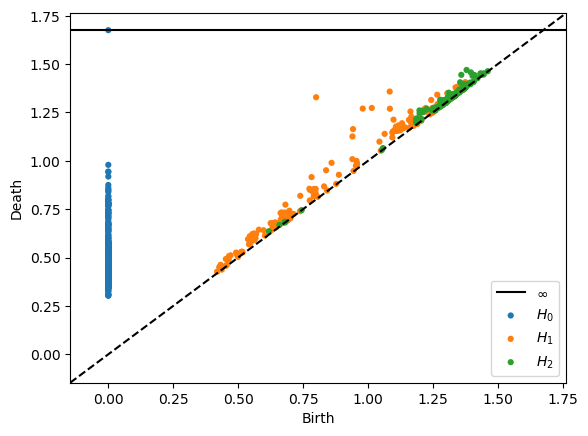

1
2
starting
(550, 50)
[[ 0.212  0.627  0.943 ...  1.362  1.463  1.494]
 [ 0.627  0.943  0.903 ...  1.463  1.494  1.444]
 [ 0.943  0.903  0.373 ...  1.494  1.444  1.405]
 ...
 [-0.042 -0.049 -0.075 ...  0.284  0.278  0.31 ]
 [-0.049 -0.075 -0.096 ...  0.278  0.31   0.399]
 [-0.075 -0.096 -0.111 ...  0.31   0.399  0.425]]
starting


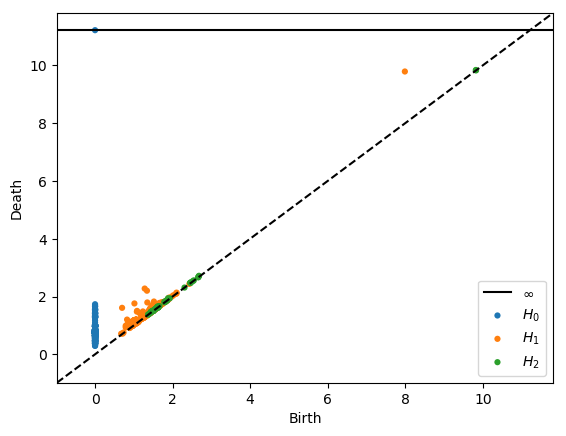

1
2
starting
(550, 50)
[[ 0.046  0.075  0.093 ...  0.006  0.089  0.135]
 [ 0.075  0.093  0.117 ...  0.089  0.135  0.143]
 [ 0.093  0.117  0.146 ...  0.135  0.143  0.112]
 ...
 [-0.011 -0.202 -0.181 ...  0.063  0.044  0.019]
 [-0.202 -0.181  0.066 ...  0.044  0.019  0.004]
 [-0.181  0.066 -0.054 ...  0.019  0.004 -0.009]]
starting


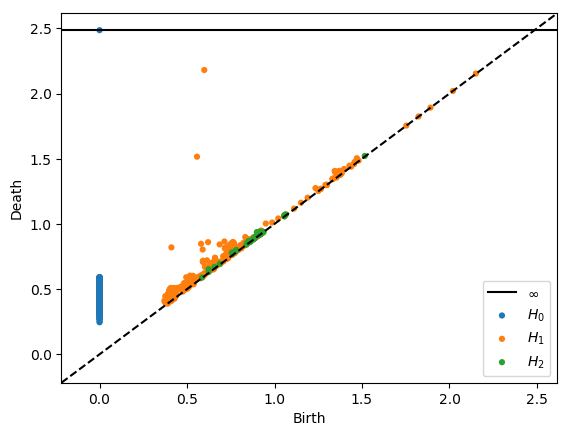

1
2
starting
(550, 50)
[[ 0.008  0.009  0.012 ... -0.013 -0.003  0.005]
 [ 0.009  0.012  0.013 ... -0.003  0.005  0.013]
 [ 0.012  0.013  0.01  ...  0.005  0.013  0.019]
 ...
 [ 0.    -0.022 -0.037 ... -0.227 -0.237 -0.248]
 [-0.022 -0.037 -0.044 ... -0.237 -0.248 -0.268]
 [-0.037 -0.044 -0.043 ... -0.248 -0.268 -0.257]]
starting


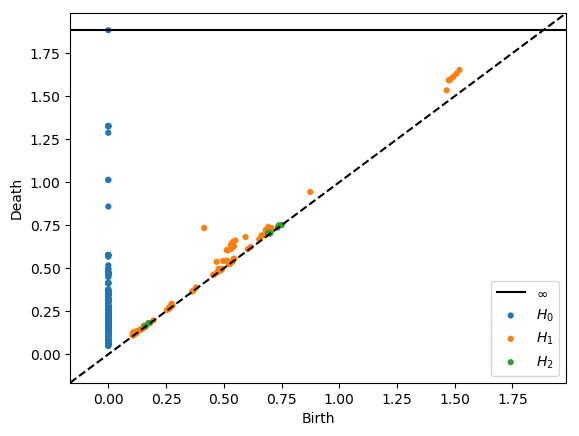

1
2
starting
(550, 50)
[[ 0.084  0.144  0.147 ...  0.042  0.01  -0.016]
 [ 0.144  0.147  0.111 ...  0.01  -0.016 -0.036]
 [ 0.147  0.111  0.075 ... -0.016 -0.036 -0.035]
 ...
 [ 0.069  0.095  0.136 ...  0.     0.049  0.09 ]
 [ 0.095  0.136  0.166 ...  0.049  0.09   0.102]
 [ 0.136  0.166  0.185 ...  0.09   0.102  0.031]]
starting


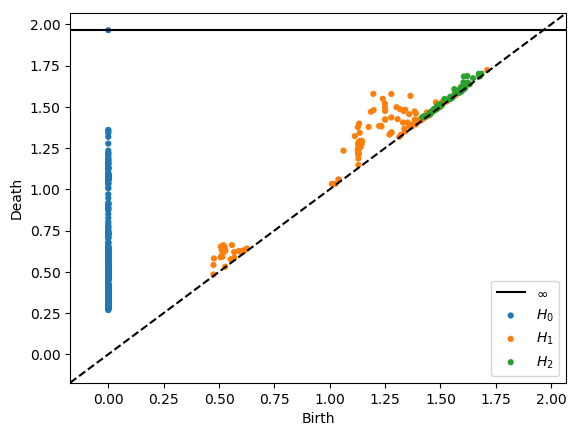

1
2
starting
(550, 50)
[[ 0.618  1.039  2.099 ... -0.318 -0.105  0.059]
 [ 1.039  2.099  3.786 ... -0.105  0.059  0.095]
 [ 2.099  3.786  3.554 ...  0.059  0.095  0.117]
 ...
 [ 0.08   0.062  0.044 ... -0.1   -0.134 -0.123]
 [ 0.062  0.044  0.038 ... -0.134 -0.123 -0.085]
 [ 0.044  0.038  0.032 ... -0.123 -0.085 -0.059]]
starting


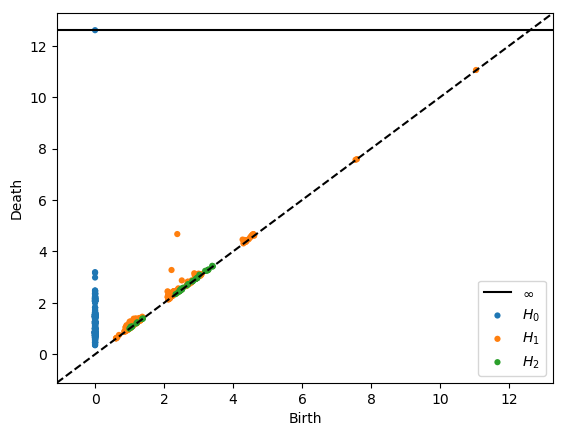

1
2
starting
(550, 50)
[[-0.777 -1.411 -1.259 ...  0.138  0.119  0.098]
 [-1.411 -1.259 -1.178 ...  0.119  0.098  0.085]
 [-1.259 -1.178 -1.127 ...  0.098  0.085  0.083]
 ...
 [ 0.073  0.069  0.069 ... -0.155 -0.254 -0.299]
 [ 0.069  0.069  0.06  ... -0.254 -0.299 -0.21 ]
 [ 0.069  0.06   0.047 ... -0.299 -0.21  -0.096]]
starting


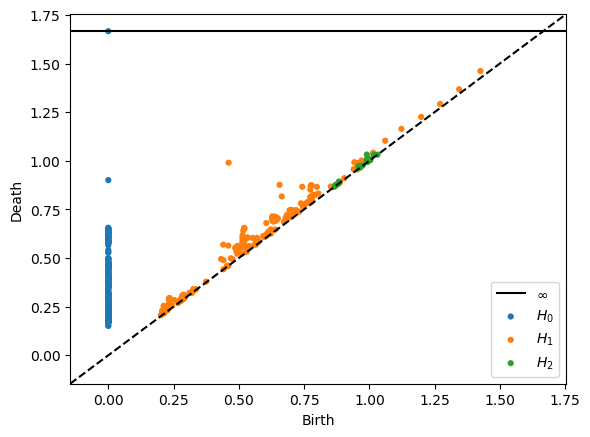

1
2
starting
(550, 50)
[[ 0.024  0.06   0.033 ... -0.11  -0.116 -0.105]
 [ 0.06   0.033  0.035 ... -0.116 -0.105 -0.166]
 [ 0.033  0.035  0.05  ... -0.105 -0.166 -0.145]
 ...
 [ 0.11   0.102  0.096 ... -0.036 -0.001  0.064]
 [ 0.102  0.096  0.086 ... -0.001  0.064  0.076]
 [ 0.096  0.086  0.065 ...  0.064  0.076  0.077]]
starting


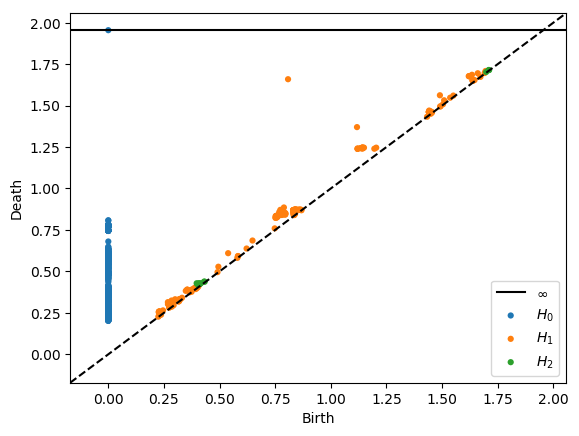

1
2
starting
(550, 50)
[[-0.171 -0.28  -0.303 ...  0.107  0.146  0.203]
 [-0.28  -0.303 -0.41  ...  0.146  0.203  0.222]
 [-0.303 -0.41  -0.5   ...  0.203  0.222  0.231]
 ...
 [-0.086 -0.066 -0.052 ...  0.09   0.107  0.123]
 [-0.066 -0.052 -0.047 ...  0.107  0.123  0.146]
 [-0.052 -0.047 -0.045 ...  0.123  0.146  0.191]]
starting


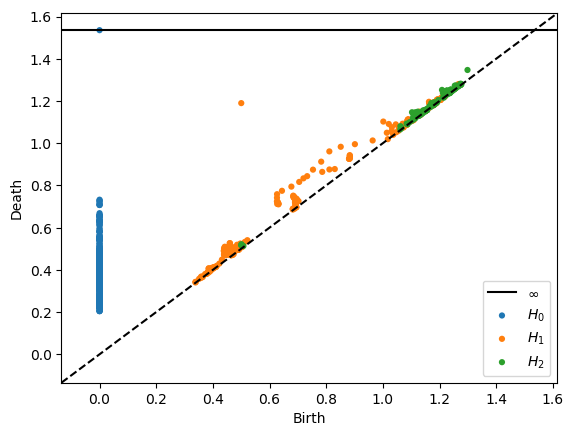

1
2
starting
(550, 50)
[[ 0.223  0.421  0.413 ...  0.007  0.061  0.132]
 [ 0.421  0.413  0.348 ...  0.061  0.132  0.169]
 [ 0.413  0.348  0.261 ...  0.132  0.169  0.184]
 ...
 [ 0.009  0.047  0.09  ... -0.035  0.006  0.018]
 [ 0.047  0.09   0.107 ...  0.006  0.018  0.   ]
 [ 0.09   0.107  0.085 ...  0.018  0.    -0.013]]
starting


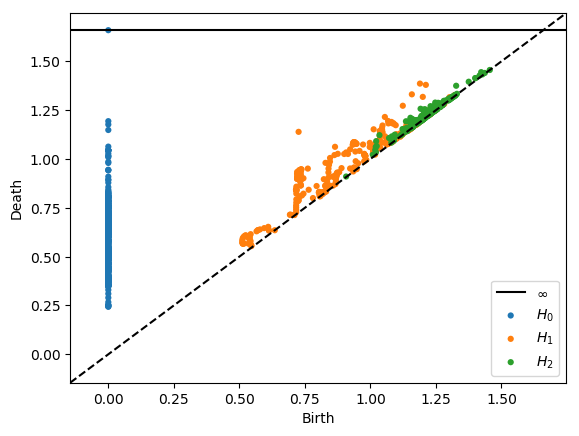

1
2
starting
(550, 50)
[[-0.004  0.004  0.012 ...  0.176  0.209  0.212]
 [ 0.004  0.012  0.014 ...  0.209  0.212  0.174]
 [ 0.012  0.014  0.012 ...  0.212  0.174  0.082]
 ...
 [-0.032 -0.024 -0.016 ... -0.025 -0.003  0.065]
 [-0.024 -0.016 -0.009 ... -0.003  0.065  0.141]
 [-0.016 -0.009 -0.002 ...  0.065  0.141  0.179]]
starting


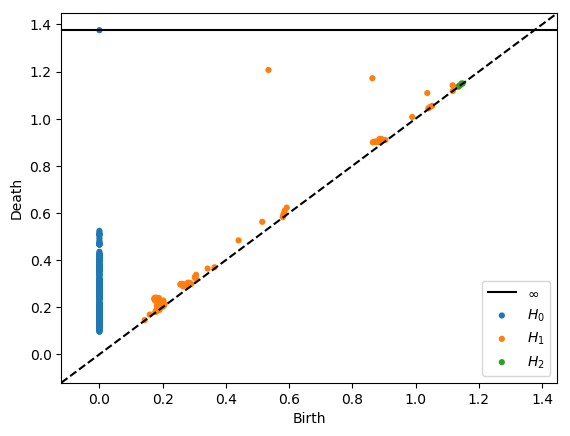

1
2
starting
(550, 50)
[[ 0.114  0.405  0.628 ... -0.244 -0.322 -0.358]
 [ 0.405  0.628  0.698 ... -0.322 -0.358 -0.366]
 [ 0.628  0.698  0.664 ... -0.358 -0.366 -0.376]
 ...
 [-0.252 -0.243 -0.169 ... -0.079 -0.1   -0.126]
 [-0.243 -0.169 -0.084 ... -0.1   -0.126 -0.13 ]
 [-0.169 -0.084 -0.035 ... -0.126 -0.13  -0.092]]
starting


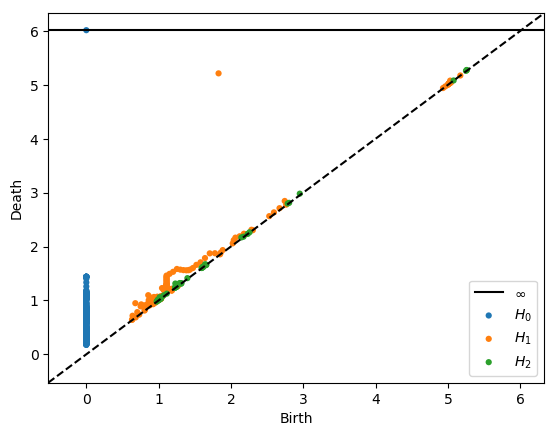

1
2
starting
(550, 50)
[[-0.638 -1.163 -1.063 ...  0.014  0.024  0.035]
 [-1.163 -1.063 -1.008 ...  0.024  0.035  0.05 ]
 [-1.063 -1.008 -0.955 ...  0.035  0.05   0.049]
 ...
 [-0.025 -0.019 -0.008 ... -0.08  -0.096 -0.111]
 [-0.019 -0.008 -0.004 ... -0.096 -0.111 -0.129]
 [-0.008 -0.004  0.    ... -0.111 -0.129 -0.144]]
starting


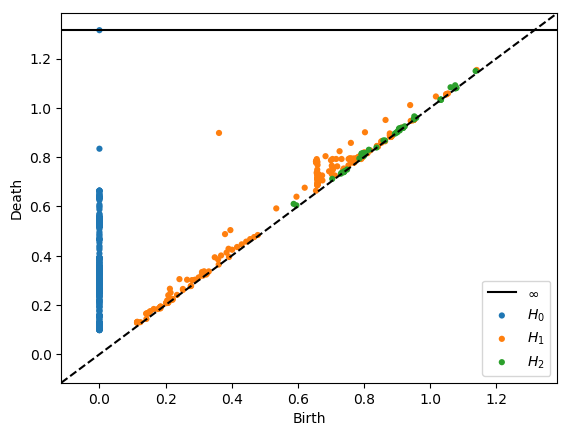

1
2
starting
(550, 50)
[[ 0.308  0.576  0.598 ...  0.156  0.194  0.212]
 [ 0.576  0.598  0.593 ...  0.194  0.212  0.207]
 [ 0.598  0.593  0.566 ...  0.212  0.207  0.165]
 ...
 [-0.127 -0.121 -0.112 ...  0.155  0.353  0.415]
 [-0.121 -0.112 -0.1   ...  0.353  0.415  0.349]
 [-0.112 -0.1   -0.083 ...  0.415  0.349  0.303]]
starting


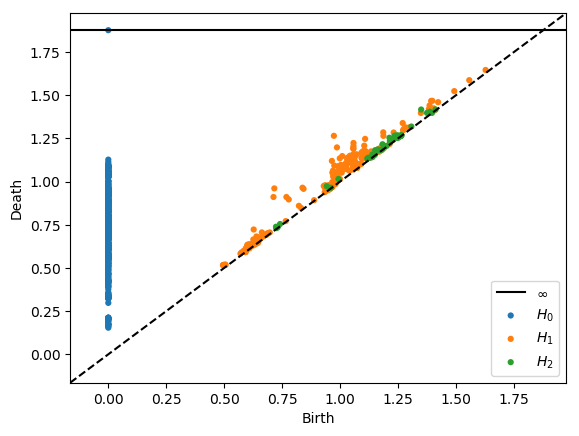

1
2
starting
(550, 50)
[[-0.16  -0.341 -0.326 ... -0.096 -0.08  -0.078]
 [-0.341 -0.326 -0.243 ... -0.08  -0.078 -0.103]
 [-0.326 -0.243 -0.328 ... -0.078 -0.103 -0.143]
 ...
 [ 0.112  0.086  0.064 ... -0.019  0.025  0.046]
 [ 0.086  0.064  0.066 ...  0.025  0.046  0.06 ]
 [ 0.064  0.066  0.086 ...  0.046  0.06   0.077]]
starting


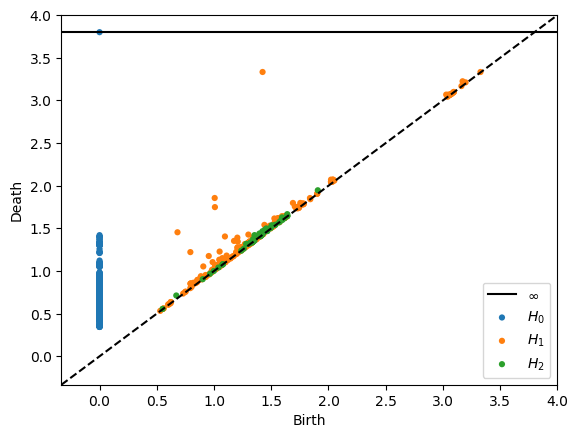

1
2
starting
(550, 50)
[[ 0.035  0.145  0.238 ... -0.104 -0.129 -0.171]
 [ 0.145  0.238  0.236 ... -0.129 -0.171 -0.192]
 [ 0.238  0.236  0.212 ... -0.171 -0.192 -0.214]
 ...
 [ 0.076  0.079  0.078 ...  0.112  0.087  0.082]
 [ 0.079  0.078  0.07  ...  0.087  0.082  0.08 ]
 [ 0.078  0.07   0.066 ...  0.082  0.08   0.073]]
starting


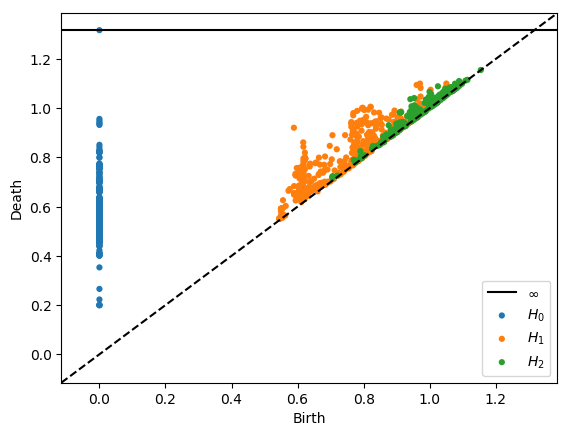

1
2
starting
(550, 50)
[[ 0.073  0.152  0.164 ... -0.081 -0.085 -0.081]
 [ 0.152  0.164  0.159 ... -0.085 -0.081 -0.095]
 [ 0.164  0.159  0.155 ... -0.081 -0.095 -0.112]
 ...
 [-0.043 -0.076 -0.087 ...  0.044  0.026 -0.006]
 [-0.076 -0.087 -0.078 ...  0.026 -0.006 -0.005]
 [-0.087 -0.078 -0.1   ... -0.006 -0.005  0.009]]
starting


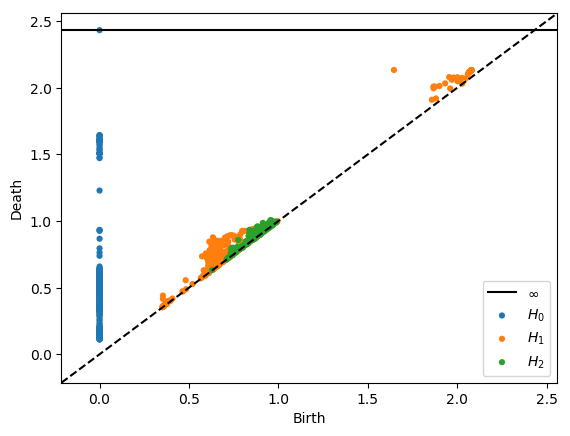

1
2
starting
(550, 50)
[[-0.709 -0.906 -0.05  ... -0.126 -0.192 -0.117]
 [-0.906 -0.05   0.602 ... -0.192 -0.117 -0.067]
 [-0.05   0.602  0.674 ... -0.117 -0.067  0.012]
 ...
 [-0.194 -0.133 -0.035 ...  0.158 -0.256 -0.484]
 [-0.133 -0.035 -0.009 ... -0.256 -0.484 -0.288]
 [-0.035 -0.009 -0.011 ... -0.484 -0.288 -0.28 ]]
starting


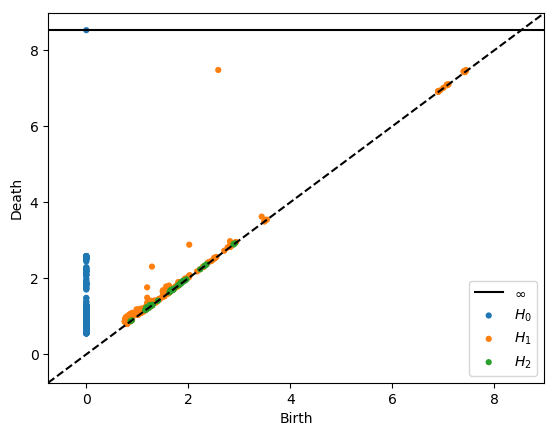

1
2
starting
(550, 50)
[[ 0.144  0.329  0.341 ...  0.094  0.101  0.108]
 [ 0.329  0.341  0.299 ...  0.101  0.108  0.116]
 [ 0.341  0.299  0.254 ...  0.108  0.116  0.122]
 ...
 [-0.179 -0.188 -0.192 ... -0.06  -0.063 -0.065]
 [-0.188 -0.192 -0.198 ... -0.063 -0.065 -0.064]
 [-0.192 -0.198 -0.206 ... -0.065 -0.064 -0.064]]
starting


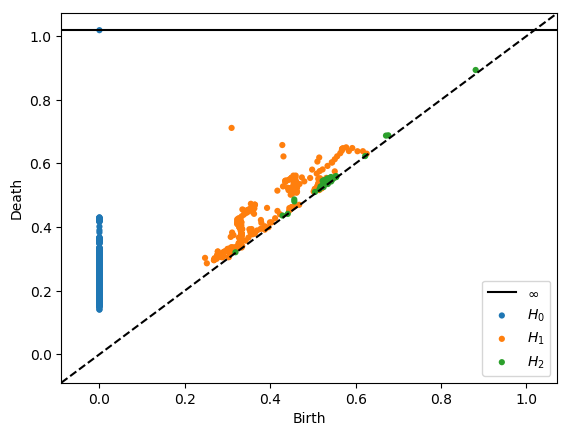

1
2
starting
(550, 50)
[[ 0.146  0.304  0.41  ...  0.302  0.354  0.31 ]
 [ 0.304  0.41   0.657 ...  0.354  0.31   0.27 ]
 [ 0.41   0.657  1.306 ...  0.31   0.27   0.261]
 ...
 [-0.034 -0.037 -0.03  ...  0.015  0.018  0.022]
 [-0.037 -0.03  -0.023 ...  0.018  0.022  0.027]
 [-0.03  -0.023 -0.019 ...  0.022  0.027  0.028]]
starting


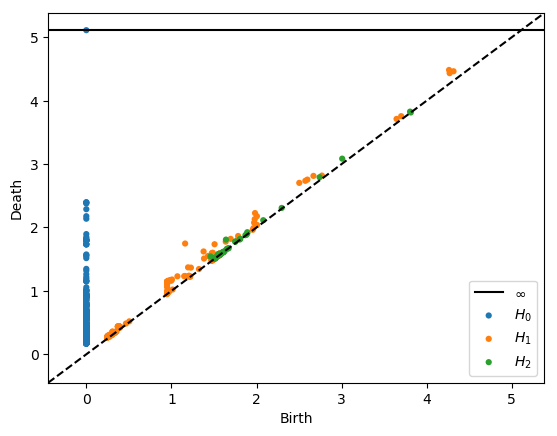

1
2
starting
(550, 50)
[[-0.021 -0.072 -0.099 ... -0.095 -0.104 -0.112]
 [-0.072 -0.099 -0.102 ... -0.104 -0.112 -0.117]
 [-0.099 -0.102 -0.091 ... -0.112 -0.117 -0.124]
 ...
 [-0.089 -0.081 -0.064 ...  0.582  0.8   -0.057]
 [-0.081 -0.064  0.204 ...  0.8   -0.057  0.008]
 [-0.064  0.204  0.815 ... -0.057  0.008  0.018]]
starting


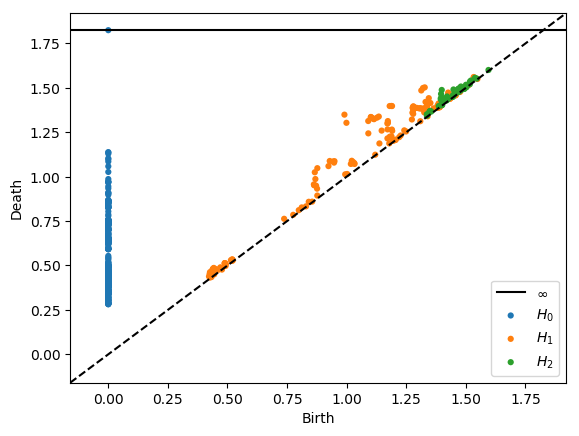

1
2
starting
(550, 50)
[[ 0.066  0.093  0.098 ... -0.031 -0.027 -0.024]
 [ 0.093  0.098  0.096 ... -0.027 -0.024 -0.021]
 [ 0.098  0.096  0.101 ... -0.024 -0.021 -0.016]
 ...
 [-0.037 -0.029 -0.025 ... -0.046 -0.042 -0.037]
 [-0.029 -0.025 -0.02  ... -0.042 -0.037 -0.032]
 [-0.025 -0.02  -0.015 ... -0.037 -0.032 -0.028]]
starting


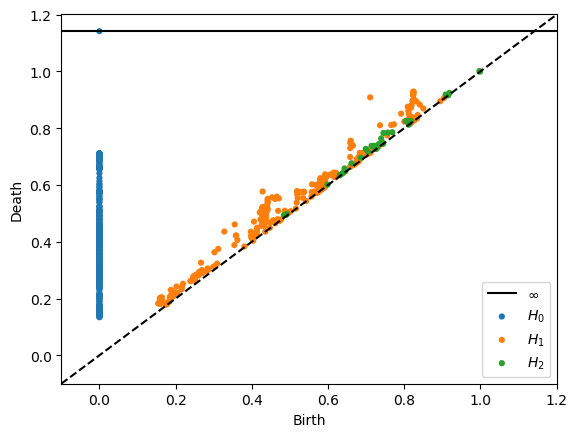

1
2
starting
(550, 50)
[[-0.009 -0.048 -0.193 ...  0.357  0.329  0.284]
 [-0.048 -0.193 -0.41  ...  0.329  0.284  0.225]
 [-0.193 -0.41  -0.405 ...  0.284  0.225  0.096]
 ...
 [ 0.839  0.819  0.76  ... -1.451 -1.276 -1.109]
 [ 0.819  0.76   0.691 ... -1.276 -1.109 -0.982]
 [ 0.76   0.691  0.67  ... -1.109 -0.982 -0.8  ]]
starting


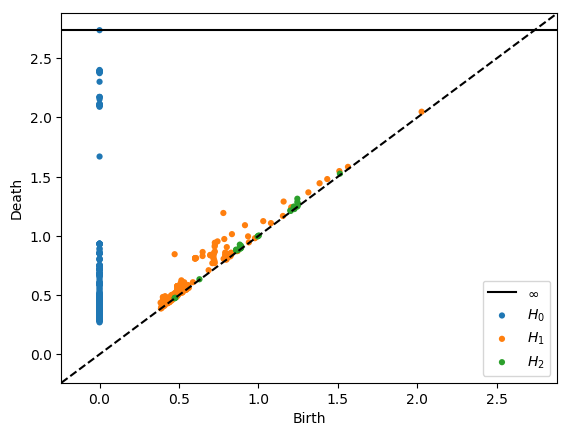

1
2
starting
(550, 50)
[[ 0.303  0.538  0.472 ... -0.062 -0.048 -0.083]
 [ 0.538  0.472  0.459 ... -0.048 -0.083 -0.114]
 [ 0.472  0.459  0.466 ... -0.083 -0.114 -0.1  ]
 ...
 [-1.928 -1.875 -1.614 ...  0.493  0.418  0.354]
 [-1.875 -1.614 -1.552 ...  0.418  0.354  0.319]
 [-1.614 -1.552 -1.427 ...  0.354  0.319  0.307]]
starting


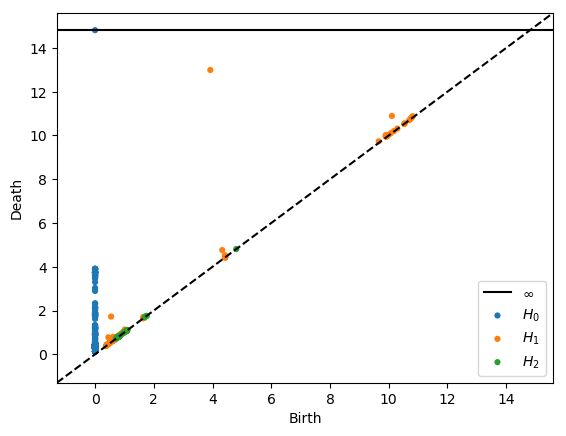

1
2
starting
(550, 50)
[[-0.045 -0.074 -0.083 ... -0.145 -0.157 -0.167]
 [-0.074 -0.083 -0.081 ... -0.157 -0.167 -0.174]
 [-0.083 -0.081 -0.069 ... -0.167 -0.174 -0.174]
 ...
 [ 1.414  1.401  0.885 ...  0.127  0.132  0.113]
 [ 1.401  0.885  0.132 ...  0.132  0.113  0.072]
 [ 0.885  0.132 -0.168 ...  0.113  0.072  0.044]]
starting


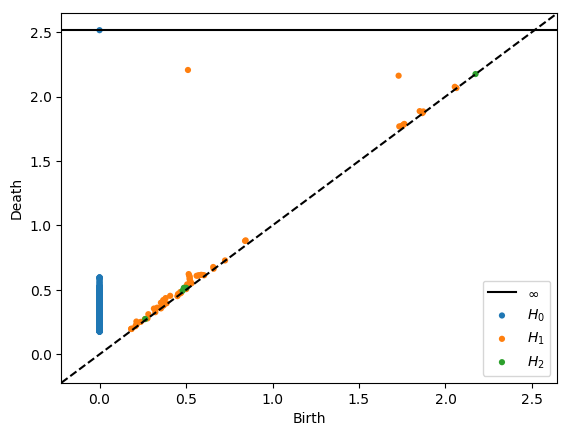

1
2
starting
(550, 50)
[[-0.708 -1.311 -1.225 ...  0.007 -0.011 -0.012]
 [-1.311 -1.225 -1.175 ... -0.011 -0.012 -0.009]
 [-1.225 -1.175 -1.146 ... -0.012 -0.009 -0.008]
 ...
 [ 0.55  -0.139 -0.044 ... -0.091 -0.083 -0.081]
 [-0.139 -0.044 -0.101 ... -0.083 -0.081 -0.081]
 [-0.044 -0.101 -0.095 ... -0.081 -0.081 -0.08 ]]
starting


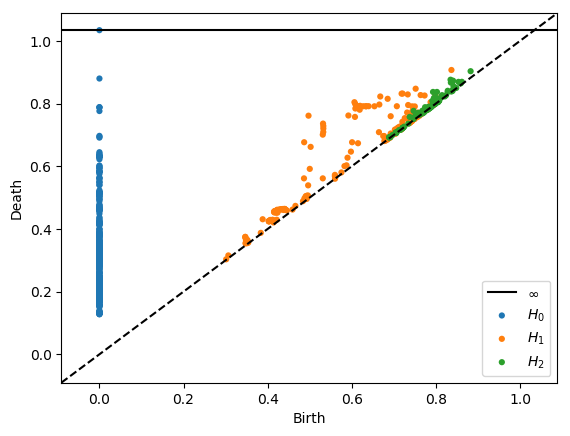

1
2
starting
(550, 50)
[[-0.021 -0.201 -0.212 ...  0.132  0.135  0.152]
 [-0.201 -0.212 -0.112 ...  0.135  0.152  0.212]
 [-0.212 -0.112 -0.044 ...  0.152  0.212  0.257]
 ...
 [-0.015  0.001  0.017 ... -0.003 -0.015 -0.027]
 [ 0.001  0.017  0.024 ... -0.015 -0.027 -0.035]
 [ 0.017  0.024  0.03  ... -0.027 -0.035 -0.031]]
starting


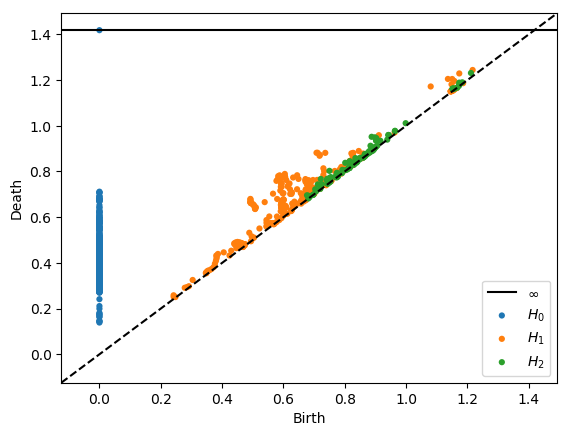

1
2
starting
(550, 50)
[[-0.011 -0.011 -0.011 ...  0.007  0.013  0.019]
 [-0.011 -0.011 -0.005 ...  0.013  0.019  0.021]
 [-0.011 -0.005 -0.004 ...  0.019  0.021  0.028]
 ...
 [ 0.277  0.373  0.444 ...  0.327  0.262  0.163]
 [ 0.373  0.444  0.495 ...  0.262  0.163  0.111]
 [ 0.444  0.495  0.535 ...  0.163  0.111  0.086]]
starting


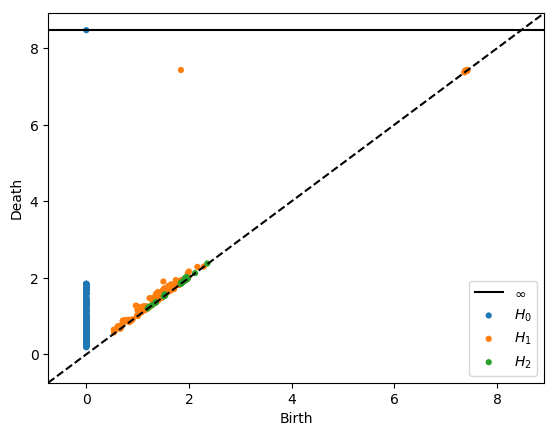

1
2
starting
(550, 50)
[[-0.024 -0.092 -0.103 ... -0.024 -0.018 -0.062]
 [-0.092 -0.103 -0.081 ... -0.018 -0.062 -0.057]
 [-0.103 -0.081 -0.064 ... -0.062 -0.057 -0.028]
 ...
 [-0.069 -0.554 -0.246 ... -0.05  -0.033 -0.03 ]
 [-0.554 -0.246  0.028 ... -0.033 -0.03  -0.028]
 [-0.246  0.028 -0.016 ... -0.03  -0.028 -0.022]]
starting


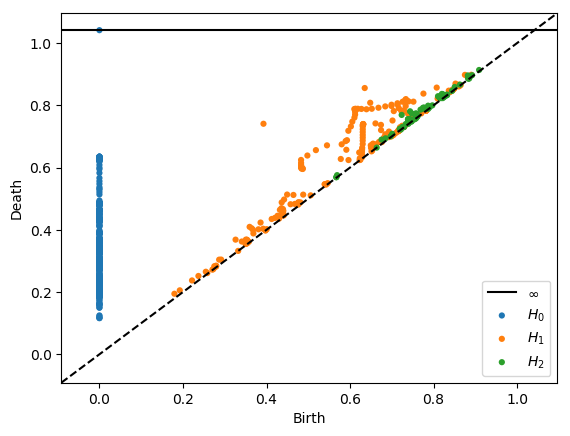

1
2
starting
(550, 50)
[[-0.169 -0.32  -0.337 ... -0.046 -0.051 -0.039]
 [-0.32  -0.337 -0.349 ... -0.051 -0.039 -0.021]
 [-0.337 -0.349 -0.351 ... -0.039 -0.021  0.   ]
 ...
 [-0.166 -0.156 -0.143 ... -0.076 -0.072 -0.069]
 [-0.156 -0.143 -0.128 ... -0.072 -0.069 -0.073]
 [-0.143 -0.128 -0.118 ... -0.069 -0.073 -0.085]]
starting


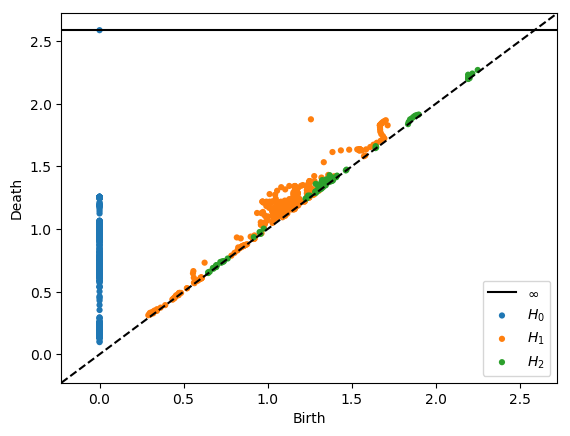

1
2
starting
(550, 50)
[[ 0.104  0.186  0.167 ... -0.002  0.018  0.046]
 [ 0.186  0.167  0.165 ...  0.018  0.046  0.117]
 [ 0.167  0.165  0.196 ...  0.046  0.117  0.685]
 ...
 [ 0.074  0.06   0.036 ... -0.044 -0.033 -0.028]
 [ 0.06   0.036  0.023 ... -0.033 -0.028 -0.025]
 [ 0.036  0.023  0.014 ... -0.028 -0.025 -0.016]]
starting


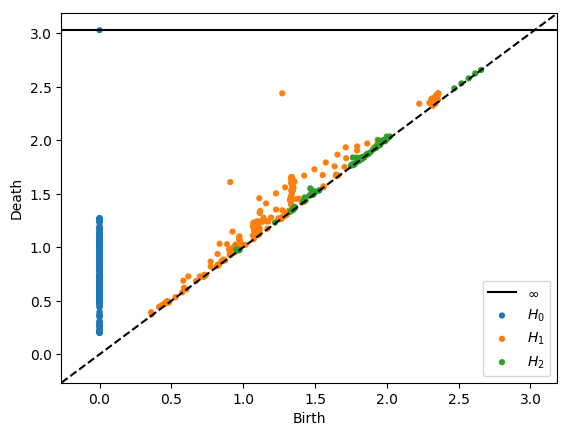

1
2
starting
(550, 50)
[[ 0.082  0.089 -0.008 ... -0.019  0.     0.036]
 [ 0.089 -0.008 -0.058 ...  0.     0.036  0.007]
 [-0.008 -0.058 -0.136 ...  0.036  0.007 -0.043]
 ...
 [ 0.015  0.106  0.108 ...  0.046  0.036  0.02 ]
 [ 0.106  0.108  0.099 ...  0.036  0.02   0.014]
 [ 0.108  0.099  0.079 ...  0.02   0.014  0.01 ]]
starting


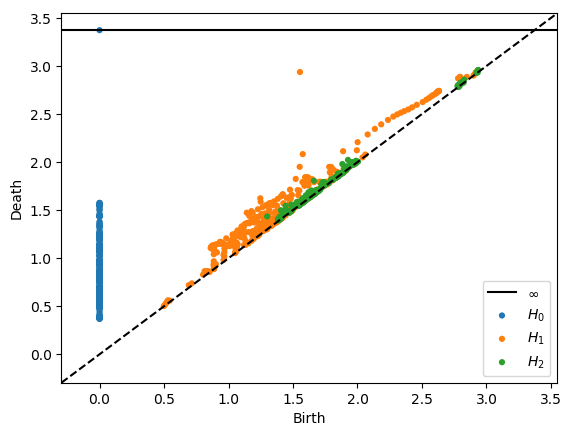

1
2
starting
(550, 50)
[[ 0.086  0.159  0.178 ... -0.015 -0.036 -0.082]
 [ 0.159  0.178  0.187 ... -0.036 -0.082 -0.117]
 [ 0.178  0.187  0.193 ... -0.082 -0.117 -0.045]
 ...
 [ 0.059  0.072  0.082 ...  0.068  0.163  0.514]
 [ 0.072  0.082 -0.038 ...  0.163  0.514  0.353]
 [ 0.082 -0.038 -0.099 ...  0.514  0.353  0.021]]
starting


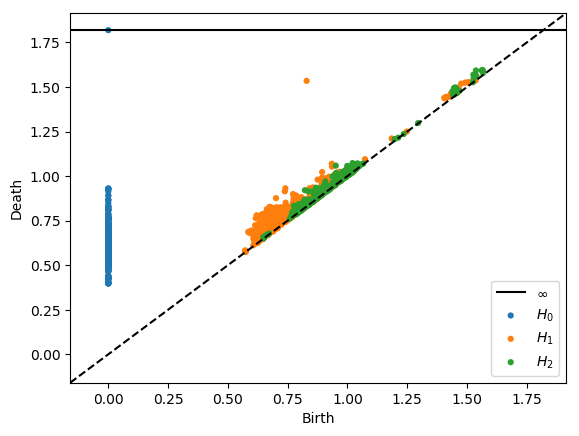

1
2
starting
(550, 50)
[[ 0.259  0.485  0.505 ... -0.236 -0.228 -0.228]
 [ 0.485  0.505  0.516 ... -0.228 -0.228 -0.243]
 [ 0.505  0.516  0.524 ... -0.228 -0.243 -0.252]
 ...
 [-0.043 -0.053 -0.063 ...  0.104  0.105  0.101]
 [-0.053 -0.063 -0.078 ...  0.105  0.101  0.098]
 [-0.063 -0.078 -0.117 ...  0.101  0.098  0.096]]
starting


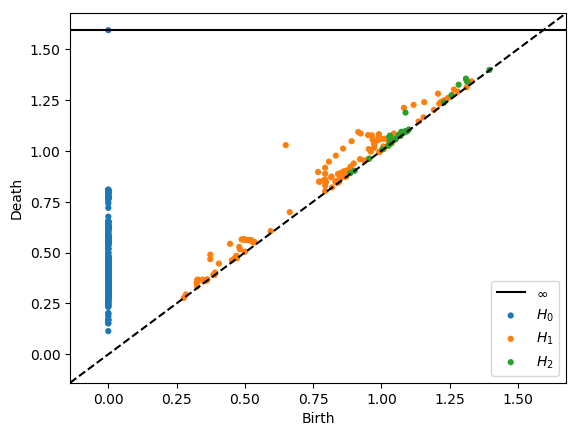

1
2
starting
(550, 50)
[[ 0.08   0.117  0.114 ...  0.18   0.797  0.468]
 [ 0.117  0.114  0.095 ...  0.797  0.468 -0.029]
 [ 0.114  0.095  0.086 ...  0.468 -0.029 -0.067]
 ...
 [-0.075 -0.063 -0.056 ... -0.018 -0.012 -0.005]
 [-0.063 -0.056 -0.051 ... -0.012 -0.005  0.   ]
 [-0.056 -0.051 -0.038 ... -0.005  0.     0.006]]
starting


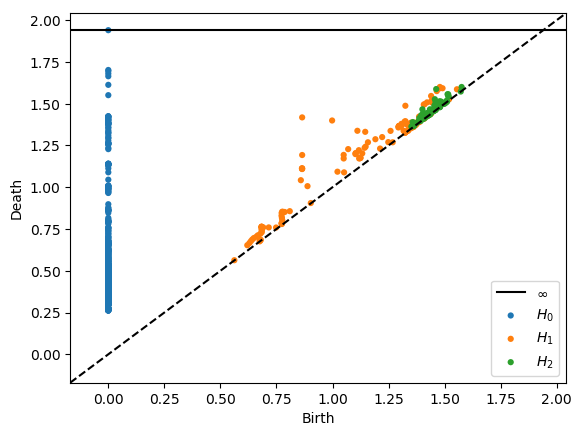

1
2
starting
(550, 50)
[[ 0.059  0.066  0.058 ...  0.254  0.343  0.442]
 [ 0.066  0.058  0.047 ...  0.343  0.442  0.517]
 [ 0.058  0.047  0.042 ...  0.442  0.517  0.53 ]
 ...
 [-0.019 -0.045  0.213 ... -0.051 -0.055 -0.038]
 [-0.045  0.213  0.288 ... -0.055 -0.038 -0.028]
 [ 0.213  0.288 -0.18  ... -0.038 -0.028 -0.017]]
starting


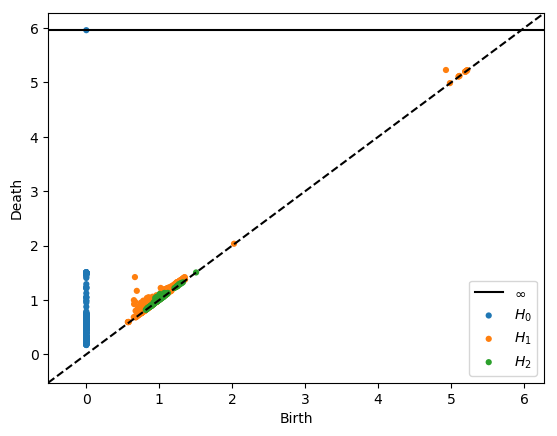

1
2
starting
(550, 50)
[[ 0.015  0.019  0.029 ...  0.048  0.073  0.099]
 [ 0.019  0.029  0.03  ...  0.073  0.099  0.105]
 [ 0.029  0.03   0.03  ...  0.099  0.105  0.07 ]
 ...
 [-0.027 -0.013 -0.088 ...  0.253  0.197  0.436]
 [-0.013 -0.088 -0.118 ...  0.197  0.436  1.068]
 [-0.088 -0.118 -0.035 ...  0.436  1.068  1.067]]
starting


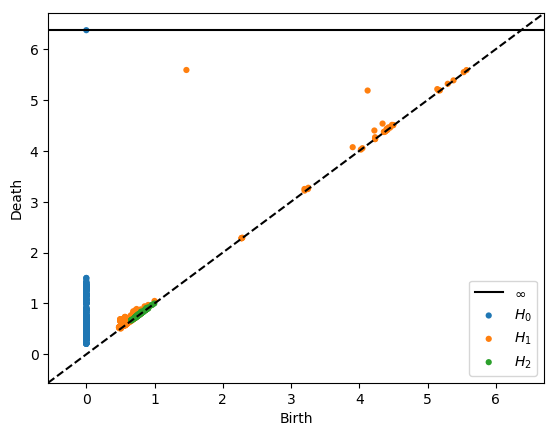

1
2
starting
(550, 50)
[[-0.228 -0.6   -0.886 ...  0.448  0.487  0.394]
 [-0.6   -0.886 -1.126 ...  0.487  0.394  0.225]
 [-0.886 -1.126 -1.532 ...  0.394  0.225  0.35 ]
 ...
 [-0.294 -0.318 -0.332 ... -0.324 -0.405 -0.442]
 [-0.318 -0.332 -0.251 ... -0.405 -0.442 -0.458]
 [-0.332 -0.251 -0.189 ... -0.442 -0.458 -0.467]]
starting


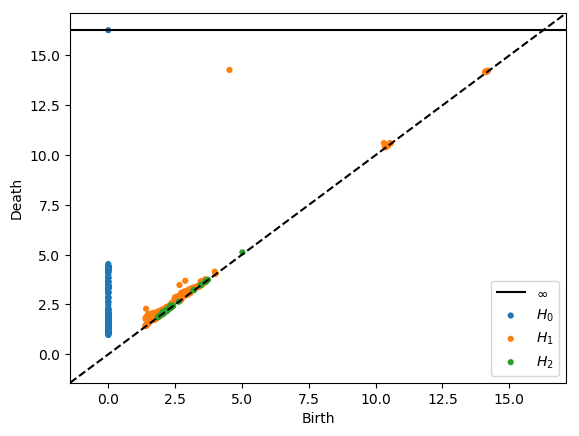

1
2
starting
(550, 50)
[[ 0.267  0.484  0.513 ... -1.25  -1.249 -1.247]
 [ 0.484  0.513  0.531 ... -1.249 -1.247 -1.243]
 [ 0.513  0.531  0.544 ... -1.247 -1.243 -1.23 ]
 ...
 [ 0.404  0.36   0.292 ... -0.069 -0.079 -0.09 ]
 [ 0.36   0.292  0.241 ... -0.079 -0.09  -0.117]
 [ 0.292  0.241  0.203 ... -0.09  -0.117 -0.145]]
starting


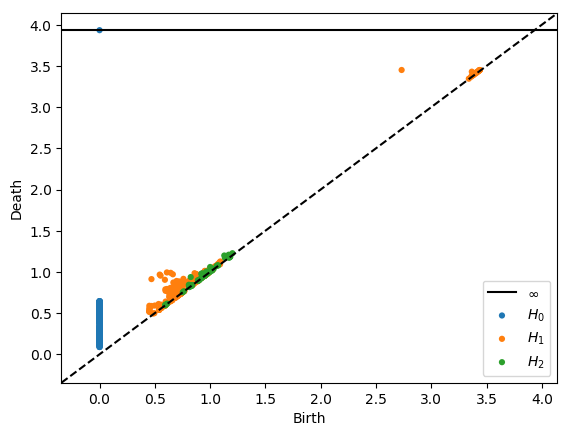

1
2
starting
(550, 50)
[[-0.027 -0.053 -0.035 ...  0.077  0.061  0.051]
 [-0.053 -0.035 -0.012 ...  0.061  0.051  0.053]
 [-0.035 -0.012  0.003 ...  0.051  0.053  0.073]
 ...
 [ 0.103  0.094  0.08  ... -0.267 -0.274 -0.244]
 [ 0.094  0.08   0.074 ... -0.274 -0.244 -0.155]
 [ 0.08   0.074  0.062 ... -0.244 -0.155 -0.066]]
starting


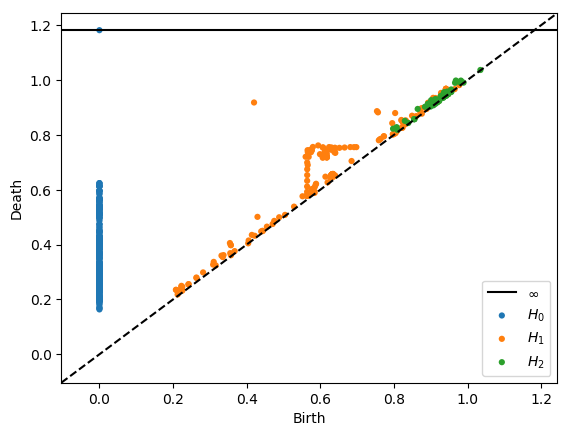

1
2
starting
(550, 50)
[[-0.004 -0.016 -0.021 ... -0.129 -0.139 -0.15 ]
 [-0.016 -0.021 -0.049 ... -0.139 -0.15  -0.142]
 [-0.021 -0.049 -0.077 ... -0.15  -0.142 -0.118]
 ...
 [ 0.079  0.081  0.082 ...  0.033  0.044  0.041]
 [ 0.081  0.082  0.085 ...  0.044  0.041  0.028]
 [ 0.082  0.085  0.092 ...  0.041  0.028  0.02 ]]
starting


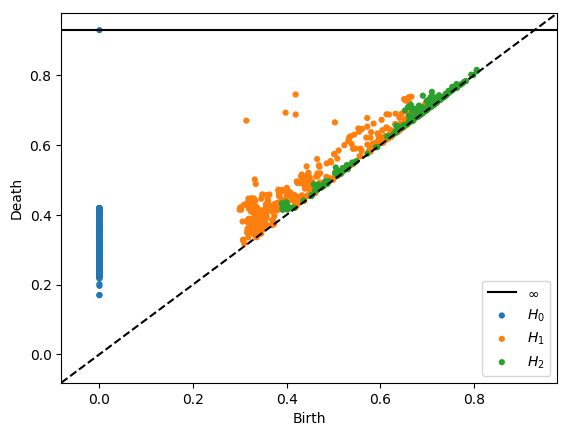

1
2
starting
(550, 50)
[[ 0.164  0.274  0.184 ... -0.636 -0.692 -0.701]
 [ 0.274  0.184  0.111 ... -0.692 -0.701 -0.692]
 [ 0.184  0.111  0.181 ... -0.701 -0.692 -0.66 ]
 ...
 [ 0.087  0.076  0.056 ... -0.062 -0.135 -0.173]
 [ 0.076  0.056  0.076 ... -0.135 -0.173 -0.192]
 [ 0.056  0.076  0.075 ... -0.173 -0.192 -0.215]]
starting


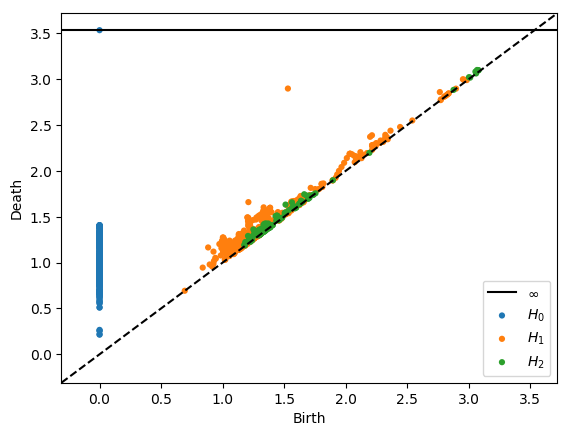

1
2
starting
(550, 50)
[[ 0.302  0.5    0.442 ...  0.01  -0.31  -0.681]
 [ 0.5    0.442  0.393 ... -0.31  -0.681 -0.538]
 [ 0.442  0.393  0.32  ... -0.681 -0.538 -0.421]
 ...
 [ 0.132  0.109  0.08  ...  0.152  0.146  0.141]
 [ 0.109  0.08   0.082 ...  0.146  0.141  0.128]
 [ 0.08   0.082  0.057 ...  0.141  0.128  0.099]]
starting


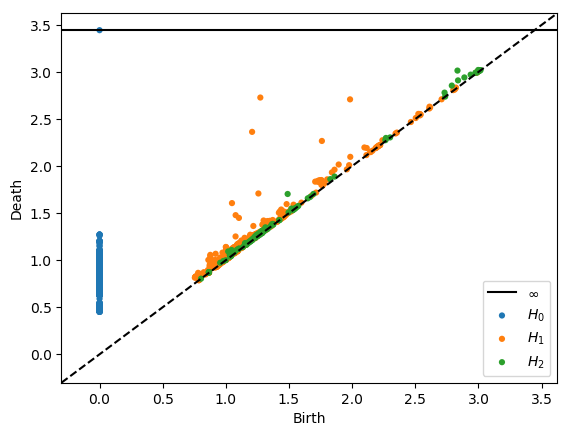

1
2
starting
(550, 50)
[[ 0.02   0.068  0.118 ...  0.052 -0.06   0.058]
 [ 0.068  0.118  0.147 ... -0.06   0.058  0.075]
 [ 0.118  0.147  0.136 ...  0.058  0.075  0.036]
 ...
 [ 0.039 -0.008 -0.063 ...  0.041  0.09   0.066]
 [-0.008 -0.063 -0.092 ...  0.09   0.066 -0.01 ]
 [-0.063 -0.092 -0.019 ...  0.066 -0.01  -0.023]]
starting


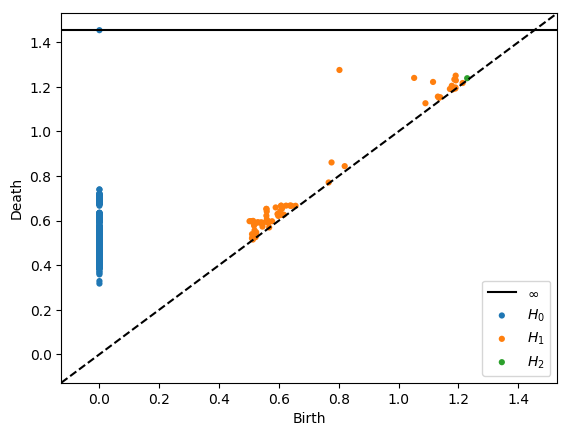

1
2
starting
(550, 50)
[[ 0.455  0.804  0.815 ...  0.265 -0.089 -0.082]
 [ 0.804  0.815  0.8   ... -0.089 -0.082 -0.077]
 [ 0.815  0.8    0.781 ... -0.082 -0.077 -0.092]
 ...
 [-0.041 -0.052 -0.04  ...  0.131  0.578 -0.144]
 [-0.052 -0.04  -0.002 ...  0.578 -0.144 -0.048]
 [-0.04  -0.002  0.002 ... -0.144 -0.048 -0.039]]
starting


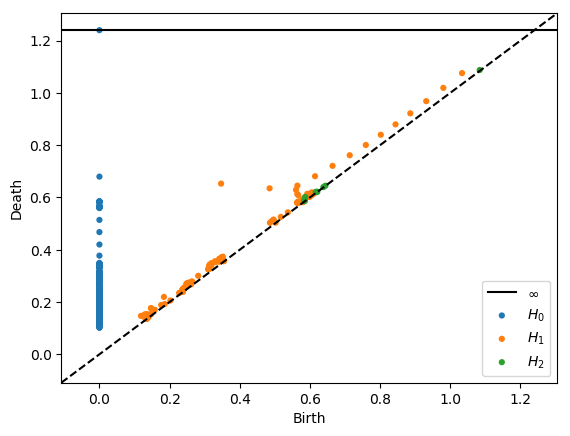

1
2
starting
(550, 50)
[[-0.187 -0.315 -0.228 ...  0.274  0.293  0.284]
 [-0.315 -0.228 -0.222 ...  0.293  0.284  0.285]
 [-0.228 -0.222 -0.246 ...  0.284  0.285  0.666]
 ...
 [ 0.004 -0.101 -0.183 ...  0.36   0.411  0.419]
 [-0.101 -0.183 -0.201 ...  0.411  0.419  0.377]
 [-0.183 -0.201 -0.209 ...  0.419  0.377  0.236]]
starting


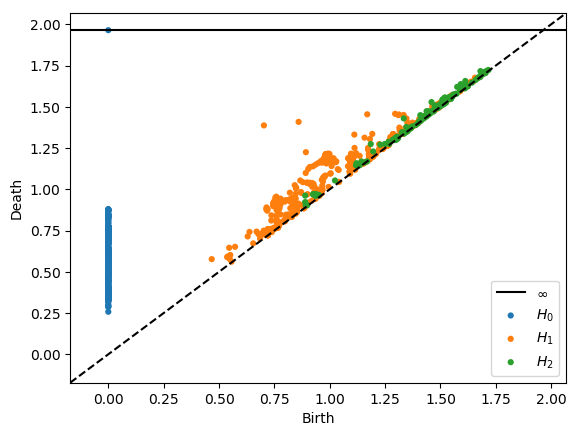

1
2
starting
(550, 50)
[[-0.593 -1.084 -1.056 ... -0.002 -0.009 -0.017]
 [-1.084 -1.056 -1.004 ... -0.009 -0.017 -0.015]
 [-1.056 -1.004 -0.976 ... -0.017 -0.015 -0.004]
 ...
 [-0.023 -0.021 -0.018 ... -0.013 -0.007 -0.01 ]
 [-0.021 -0.018 -0.018 ... -0.007 -0.01  -0.012]
 [-0.018 -0.018 -0.019 ... -0.01  -0.012 -0.011]]
starting


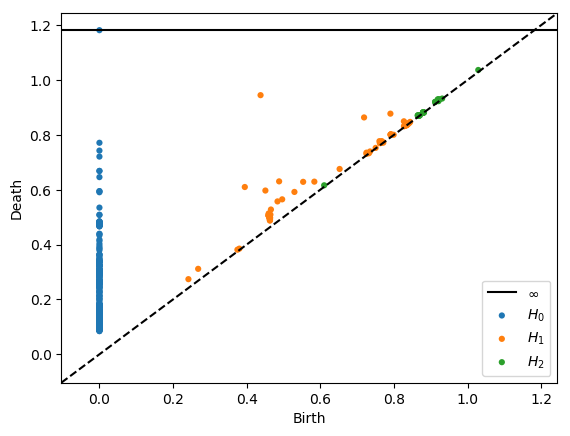

1
2
starting
(550, 50)
[[-0.34  -0.601 -0.545 ... -0.063 -0.091 -0.124]
 [-0.601 -0.545 -0.529 ... -0.091 -0.124 -0.15 ]
 [-0.545 -0.529 -0.524 ... -0.124 -0.15  -0.191]
 ...
 [-0.152 -0.145 -0.142 ...  0.286  0.379  0.381]
 [-0.145 -0.142 -0.143 ...  0.379  0.381  0.346]
 [-0.142 -0.143 -0.148 ...  0.381  0.346  0.301]]
starting


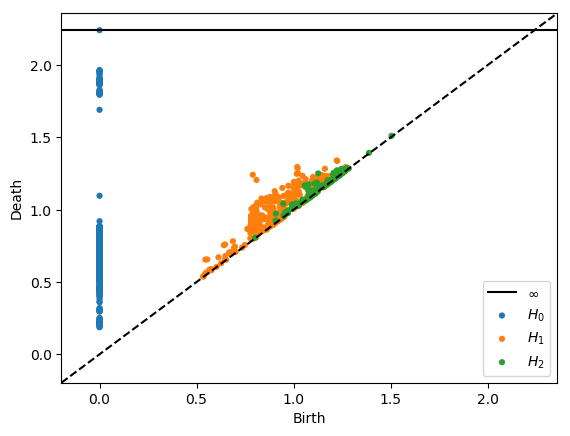

1
2
starting
(550, 50)
[[-0.674 -1.221 -1.136 ...  0.139  0.144  0.145]
 [-1.221 -1.136 -1.087 ...  0.144  0.145  0.149]
 [-1.136 -1.087 -1.057 ...  0.145  0.149  0.155]
 ...
 [-0.131  0.059  0.035 ...  0.009  0.007  0.006]
 [ 0.059  0.035  0.039 ...  0.007  0.006  0.   ]
 [ 0.035  0.039  0.037 ...  0.006  0.    -0.009]]
starting


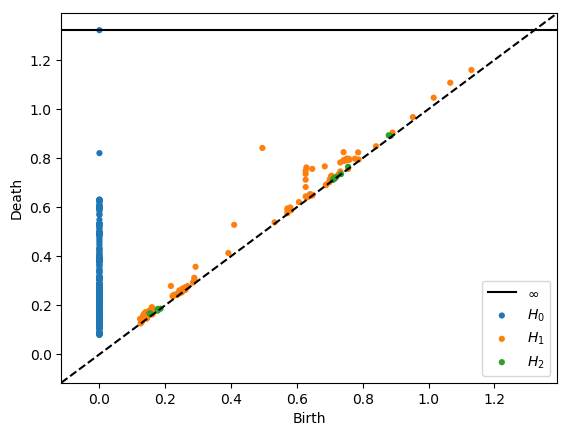

1
2
starting
(550, 50)
[[ 0.154  0.269  0.197 ...  0.094  0.191  0.258]
 [ 0.269  0.197  0.122 ...  0.191  0.258  0.211]
 [ 0.197  0.122  0.134 ...  0.258  0.211  0.183]
 ...
 [ 0.028 -0.056 -0.027 ... -0.04  -0.022  0.066]
 [-0.056 -0.027 -0.004 ... -0.022  0.066 -0.012]
 [-0.027 -0.004  0.01  ...  0.066 -0.012 -0.012]]
starting


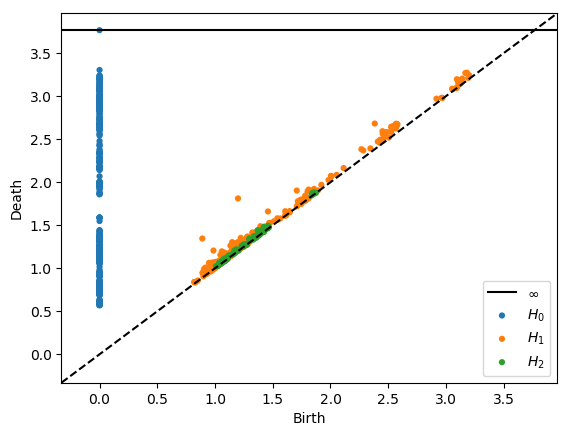

1
2
starting
(550, 50)
[[-0.346 -0.627 -0.569 ... -0.523 -0.507 -0.487]
 [-0.627 -0.569 -0.508 ... -0.507 -0.487 -0.437]
 [-0.569 -0.508 -0.447 ... -0.487 -0.437 -0.423]
 ...
 [-0.095 -0.084 -0.066 ... -0.091 -0.113 -0.127]
 [-0.084 -0.066 -0.068 ... -0.113 -0.127 -0.113]
 [-0.066 -0.068 -0.088 ... -0.127 -0.113 -0.097]]
starting


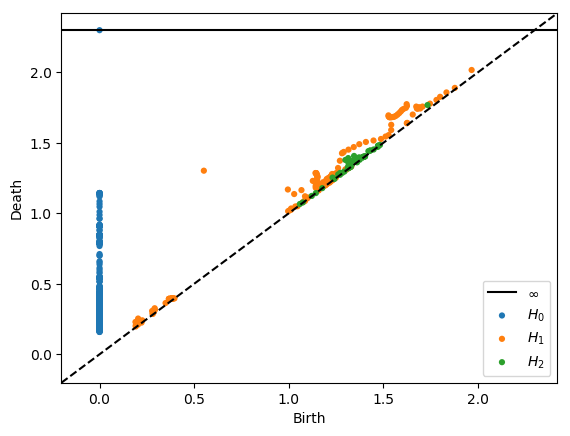

1
2
starting
(550, 50)
[[-0.02  -0.046 -0.074 ... -0.13  -0.122 -0.11 ]
 [-0.046 -0.074 -0.076 ... -0.122 -0.11  -0.106]
 [-0.074 -0.076 -0.062 ... -0.11  -0.106 -0.097]
 ...
 [ 1.097 -0.216 -0.127 ...  0.033  0.095  0.113]
 [-0.216 -0.127 -0.096 ...  0.095  0.113  0.115]
 [-0.127 -0.096 -0.08  ...  0.113  0.115  0.103]]
starting


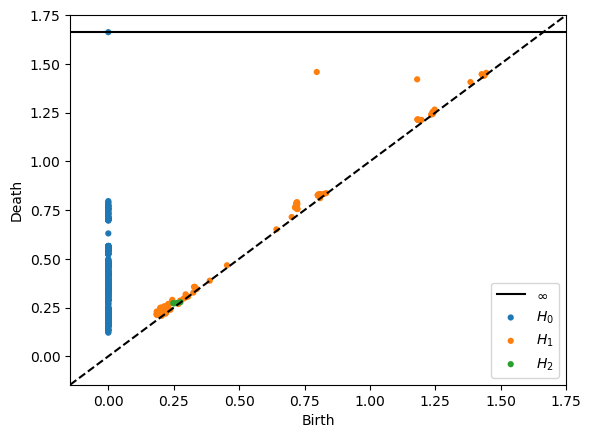

1
2
starting
(550, 50)
[[ 0.658  1.212  1.228 ...  0.06   0.089  0.084]
 [ 1.212  1.228  1.235 ...  0.089  0.084  0.01 ]
 [ 1.228  1.235  1.253 ...  0.084  0.01  -0.066]
 ...
 [-0.133 -0.115 -0.099 ...  0.022  0.063  0.135]
 [-0.115 -0.099 -0.078 ...  0.063  0.135  0.196]
 [-0.099 -0.078 -0.038 ...  0.135  0.196  0.209]]
starting


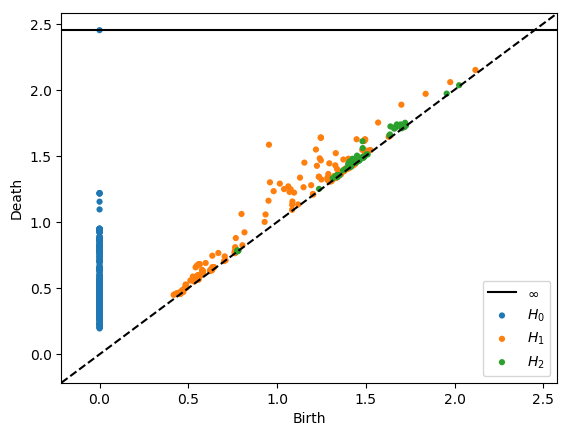

1
2
starting
(550, 50)
[[ 0.114  0.237  0.25  ... -0.102 -0.054  0.419]
 [ 0.237  0.25   0.255 ... -0.054  0.419  0.698]
 [ 0.25   0.255  0.263 ...  0.419  0.698  0.209]
 ...
 [ 0.003  0.014  0.058 ... -0.151 -0.163 -0.13 ]
 [ 0.014  0.058  0.108 ... -0.163 -0.13  -0.091]
 [ 0.058  0.108  0.117 ... -0.13  -0.091 -0.067]]
starting


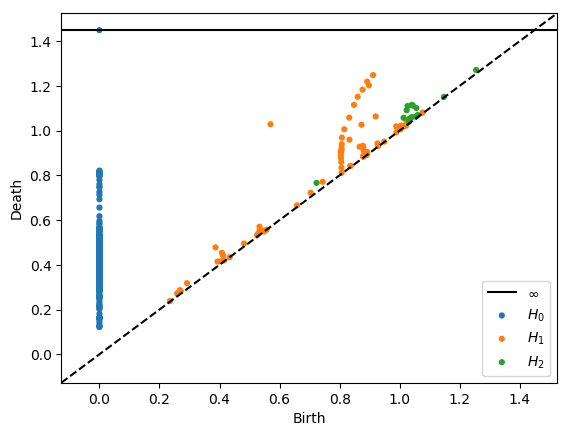

1
2
starting
(550, 50)
[[-0.062 -0.102 -0.09  ... -0.025 -0.035 -0.045]
 [-0.102 -0.09  -0.085 ... -0.035 -0.045 -0.051]
 [-0.09  -0.085 -0.102 ... -0.045 -0.051 -0.052]
 ...
 [-0.315 -0.193 -0.161 ...  0.199  0.203  0.207]
 [-0.193 -0.161 -0.161 ...  0.203  0.207  0.209]
 [-0.161 -0.161 -0.164 ...  0.207  0.209  0.202]]
starting


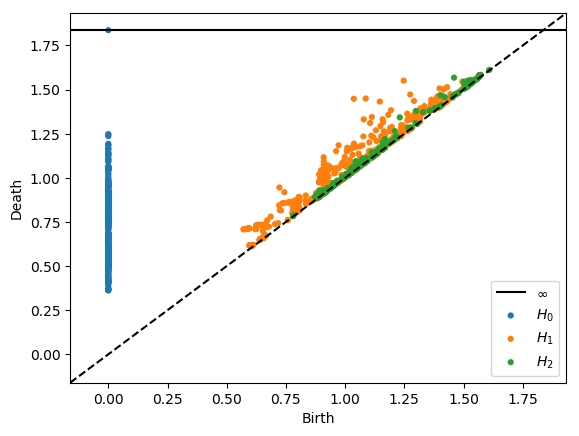

1
2
starting
(550, 50)
[[-1.560e-01 -2.800e-01 -2.970e-01 ... -1.220e+00 -1.402e+00 -1.432e+00]
 [-2.800e-01 -2.970e-01 -3.050e-01 ... -1.402e+00 -1.432e+00 -1.455e+00]
 [-2.970e-01 -3.050e-01 -3.050e-01 ... -1.432e+00 -1.455e+00 -1.488e+00]
 ...
 [-1.090e-01  6.200e-02  7.910e-01 ... -3.200e-02 -2.600e-02  2.500e-02]
 [ 6.200e-02  7.910e-01  1.000e-03 ... -2.600e-02  2.500e-02  8.300e-02]
 [ 7.910e-01  1.000e-03 -3.810e-01 ...  2.500e-02  8.300e-02  7.900e-02]]
starting


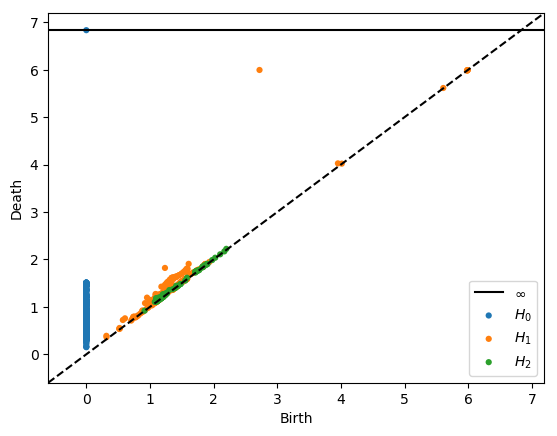

1
2
starting
(550, 50)
[[-0.43  -0.721 -0.613 ... -0.037 -0.016  0.437]
 [-0.721 -0.613 -0.603 ... -0.016  0.437  0.661]
 [-0.613 -0.603 -0.589 ...  0.437  0.661  0.099]
 ...
 [-0.441 -0.402 -0.317 ... -0.233 -0.257 -0.226]
 [-0.402 -0.317 -0.23  ... -0.257 -0.226 -0.174]
 [-0.317 -0.23  -0.165 ... -0.226 -0.174 -0.082]]
starting


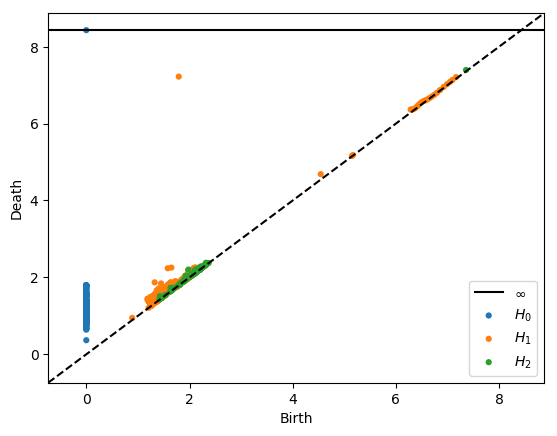

1
2
starting
(550, 50)
[[ 1.135  2.141  2.108 ... -0.363 -0.303 -0.284]
 [ 2.141  2.108  2.089 ... -0.303 -0.284 -0.268]
 [ 2.108  2.089  2.073 ... -0.284 -0.268 -0.256]
 ...
 [-0.015 -0.018 -0.026 ... -0.015 -0.013 -0.012]
 [-0.018 -0.026 -0.039 ... -0.013 -0.012 -0.015]
 [-0.026 -0.039 -0.034 ... -0.012 -0.015 -0.015]]
starting


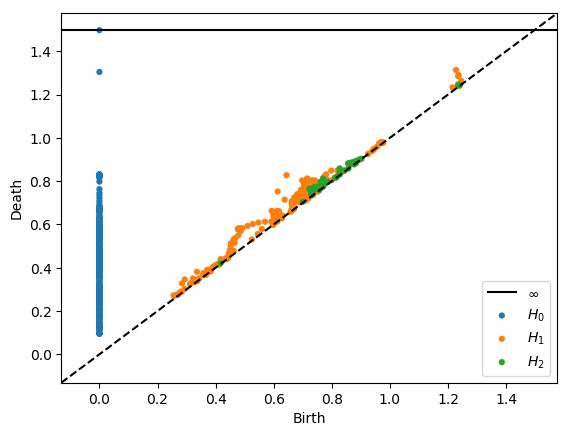

1
2
starting
(550, 50)
[[-0.059 -0.055 -0.049 ... -0.066 -0.058 -0.04 ]
 [-0.055 -0.049 -0.046 ... -0.058 -0.04  -0.012]
 [-0.049 -0.046 -0.039 ... -0.04  -0.012  0.003]
 ...
 [-0.074 -0.061 -0.053 ... -0.053 -0.036 -0.024]
 [-0.061 -0.053 -0.049 ... -0.036 -0.024 -0.016]
 [-0.053 -0.049 -0.044 ... -0.024 -0.016  0.   ]]
starting


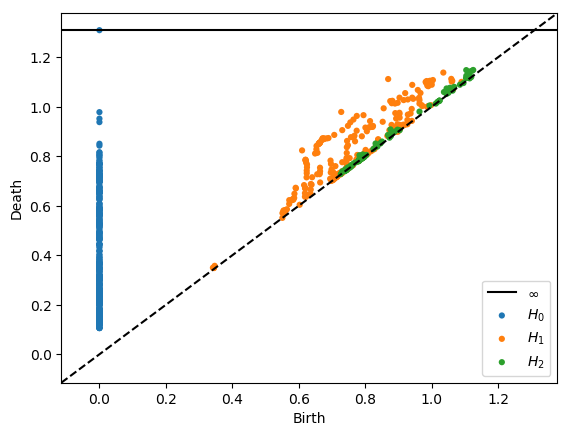

1
2
starting
(550, 50)
[[-0.006 -0.024 -0.123 ...  0.002  0.022  0.066]
 [-0.024 -0.123 -0.161 ...  0.022  0.066  0.114]
 [-0.123 -0.161 -0.171 ...  0.066  0.114  0.169]
 ...
 [-0.075 -0.07  -0.068 ... -0.062 -0.054 -0.044]
 [-0.07  -0.068 -0.068 ... -0.054 -0.044 -0.037]
 [-0.068 -0.068 -0.064 ... -0.044 -0.037 -0.029]]
starting


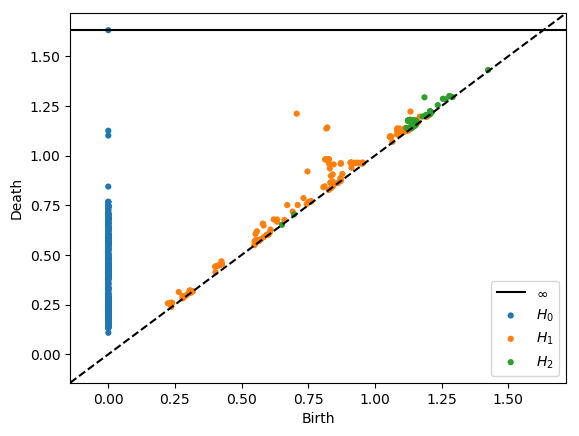

1
2
starting
(550, 50)
[[ 0.021  0.03   0.031 ... -0.014 -0.075 -0.109]
 [ 0.03   0.031  0.033 ... -0.075 -0.109 -0.119]
 [ 0.031  0.033  0.032 ... -0.109 -0.119 -0.103]
 ...
 [ 0.086  0.084  0.057 ...  0.067  0.053  0.036]
 [ 0.084  0.057  0.05  ...  0.053  0.036  0.025]
 [ 0.057  0.05   0.047 ...  0.036  0.025  0.012]]
starting


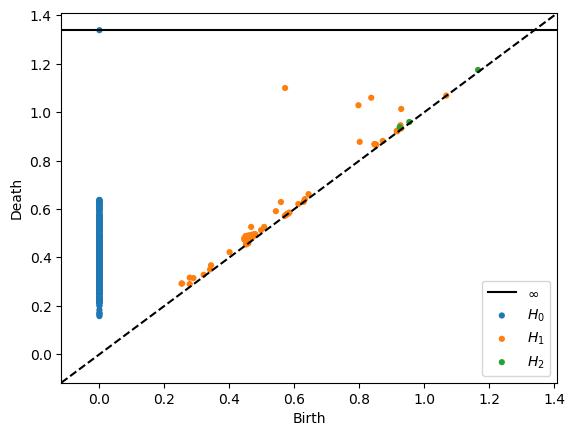

1
2
starting
(550, 50)
[[-0.111 -0.154 -0.156 ... -0.037 -0.046 -0.052]
 [-0.154 -0.156 -0.158 ... -0.046 -0.052 -0.057]
 [-0.156 -0.158 -0.159 ... -0.052 -0.057 -0.061]
 ...
 [ 0.078  0.114  0.123 ... -0.019  0.02   0.033]
 [ 0.114  0.123  0.107 ...  0.02   0.033  0.057]
 [ 0.123  0.107  0.075 ...  0.033  0.057  0.103]]
starting


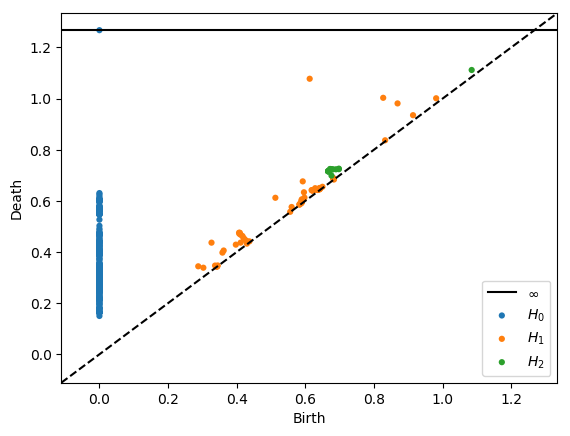

1
2
starting
(550, 50)
[[-0.003 -0.004 -0.001 ...  0.026  0.07   0.074]
 [-0.004 -0.001  0.007 ...  0.07   0.074  0.066]
 [-0.001  0.007  0.013 ...  0.074  0.066  0.04 ]
 ...
 [-0.037 -0.049 -0.041 ...  0.045  0.076  0.087]
 [-0.049 -0.041 -0.03  ...  0.076  0.087  0.086]
 [-0.041 -0.03  -0.03  ...  0.087  0.086  0.066]]
starting


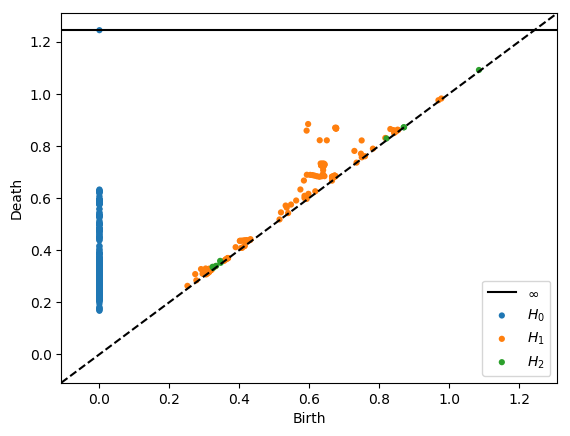

1
2
starting
(550, 50)
[[-0.052 -0.155 -0.15  ... -0.036  0.007  0.057]
 [-0.155 -0.15  -0.141 ...  0.007  0.057  0.083]
 [-0.15  -0.141 -0.18  ...  0.057  0.083  0.123]
 ...
 [-0.01   0.005  0.004 ...  0.067  0.032  0.012]
 [ 0.005  0.004  0.002 ...  0.032  0.012  0.   ]
 [ 0.004  0.002 -0.014 ...  0.012  0.    -0.03 ]]
starting


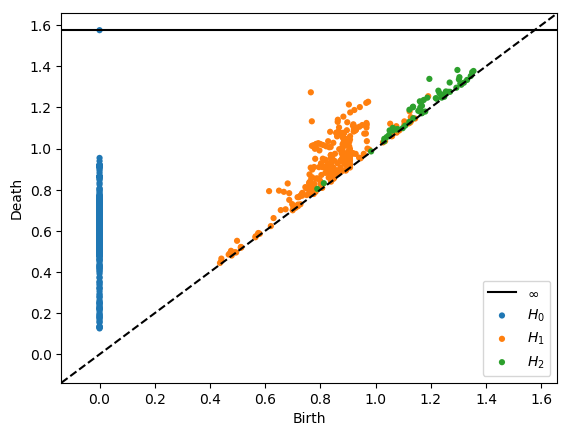

1
2
starting
(550, 50)
[[ 0.031  0.014 -0.024 ... -0.001  0.05   0.09 ]
 [ 0.014 -0.024 -0.138 ...  0.05   0.09   0.101]
 [-0.024 -0.138 -0.176 ...  0.09   0.101  0.115]
 ...
 [-0.018 -0.035 -0.039 ... -0.123 -0.057 -0.021]
 [-0.035 -0.039 -0.029 ... -0.057 -0.021 -0.073]
 [-0.039 -0.029 -0.025 ... -0.021 -0.073 -0.115]]
starting


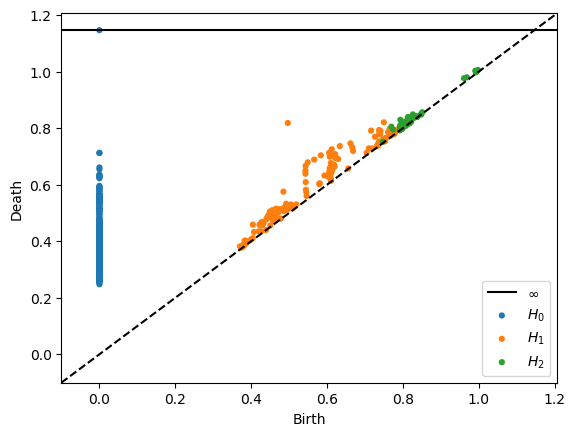

1
2
starting
(550, 50)
[[-0.48  -0.893 -0.864 ...  0.065  0.1    0.126]
 [-0.893 -0.864 -0.846 ...  0.1    0.126  0.14 ]
 [-0.864 -0.846 -0.809 ...  0.126  0.14   0.136]
 ...
 [ 0.507 -0.139 -0.077 ... -0.013  0.004  0.346]
 [-0.139 -0.077 -0.067 ...  0.004  0.346  0.61 ]
 [-0.077 -0.067 -0.062 ...  0.346  0.61  -0.043]]
starting


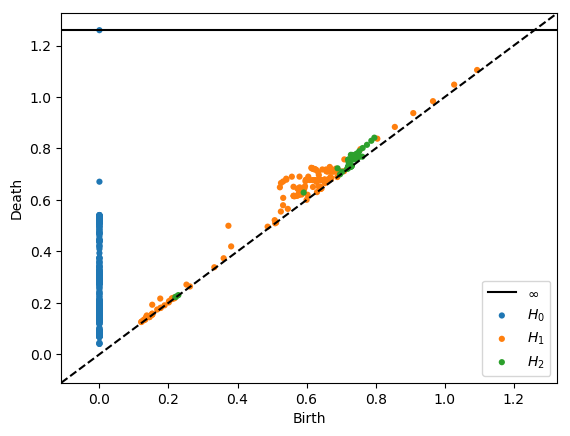

1
2
starting
(550, 50)
[[ 0.142  0.225  0.235 ...  0.025  0.011  0.036]
 [ 0.225  0.235  0.24  ...  0.011  0.036  0.021]
 [ 0.235  0.24   0.242 ...  0.036  0.021 -0.02 ]
 ...
 [-0.049 -0.05  -0.035 ...  0.001  0.017  0.026]
 [-0.05  -0.035  0.034 ...  0.017  0.026  0.04 ]
 [-0.035  0.034  0.031 ...  0.026  0.04   0.058]]
starting


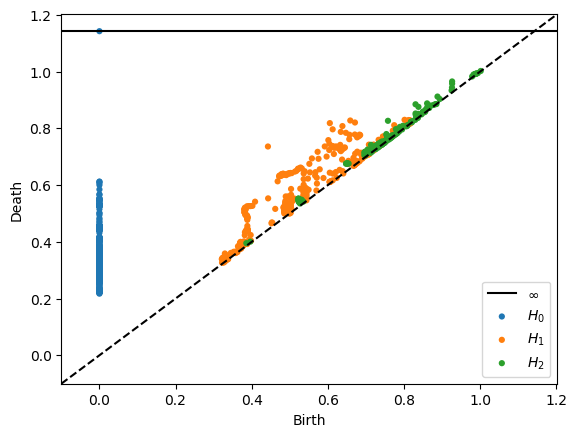

1
2
starting
(550, 50)
[[ 0.026  0.065  0.055 ...  0.149  0.097  0.044]
 [ 0.065  0.055  0.041 ...  0.097  0.044  0.015]
 [ 0.055  0.041  0.054 ...  0.044  0.015 -0.012]
 ...
 [-0.065 -0.062 -0.062 ... -0.033 -0.017 -0.002]
 [-0.062 -0.062 -0.067 ... -0.017 -0.002 -0.066]
 [-0.062 -0.067 -0.064 ... -0.002 -0.066 -0.064]]
starting


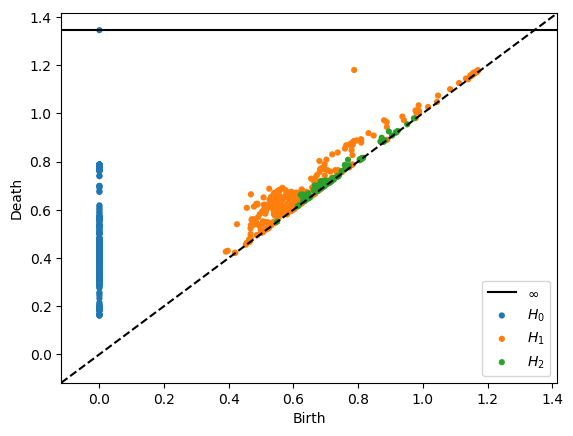

1
2
starting
(550, 50)
[[-0.266 -0.487 -0.494 ...  0.097  0.087  0.072]
 [-0.487 -0.494 -0.474 ...  0.087  0.072  0.055]
 [-0.494 -0.474 -0.458 ...  0.072  0.055  0.039]
 ...
 [ 0.028  0.032  0.021 ... -0.047 -0.027 -0.022]
 [ 0.032  0.021  0.007 ... -0.027 -0.022 -0.041]
 [ 0.021  0.007 -0.005 ... -0.022 -0.041 -0.042]]
starting


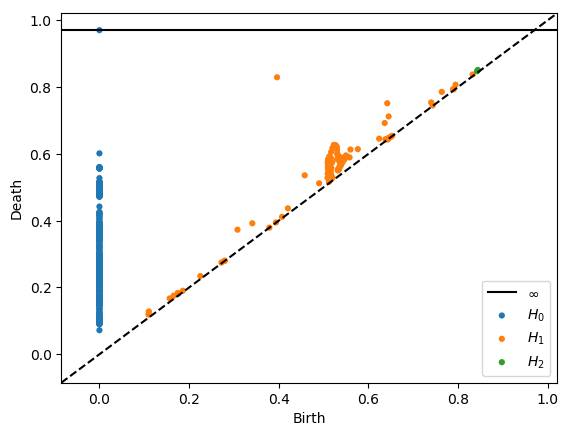

1
2
starting
(550, 50)
[[-0.144 -0.321 -0.255 ... -0.679 -0.653 -0.59 ]
 [-0.321 -0.255 -0.115 ... -0.653 -0.59  -0.548]
 [-0.255 -0.115  0.14  ... -0.59  -0.548 -0.497]
 ...
 [-0.038 -0.039 -0.036 ... -0.055 -0.06  -0.063]
 [-0.039 -0.036 -0.043 ... -0.06  -0.063 -0.061]
 [-0.036 -0.043 -0.054 ... -0.063 -0.061 -0.046]]
starting


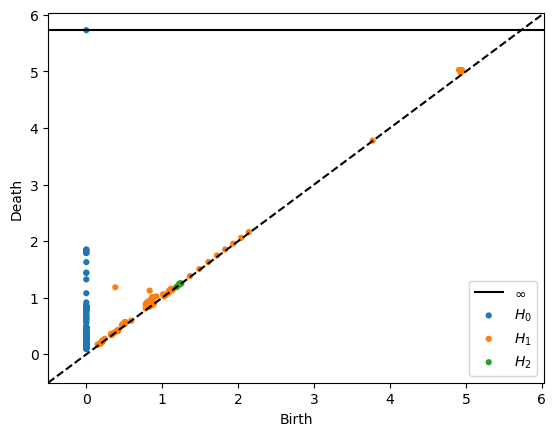

1
2
starting
(550, 50)
[[ 0.28   0.53   0.544 ... -0.296 -0.267 -0.309]
 [ 0.53   0.544  0.537 ... -0.267 -0.309 -0.326]
 [ 0.544  0.537  0.534 ... -0.309 -0.326 -0.316]
 ...
 [-0.201 -0.214 -0.201 ... -0.018 -0.033 -0.057]
 [-0.214 -0.201 -0.19  ... -0.033 -0.057 -0.067]
 [-0.201 -0.19  -0.197 ... -0.057 -0.067 -0.055]]
starting


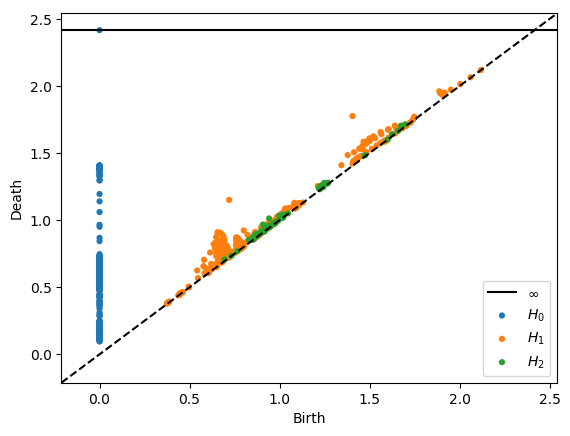

1
2
starting
(550, 50)
[[-0.561 -1.081 -1.141 ... -0.185 -0.194 -0.213]
 [-1.081 -1.141 -1.133 ... -0.194 -0.213 -0.229]
 [-1.141 -1.133 -1.131 ... -0.213 -0.229 -0.238]
 ...
 [-0.01   0.634  1.126 ...  0.006  0.003 -0.009]
 [ 0.634  1.126  0.103 ...  0.003 -0.009 -0.051]
 [ 1.126  0.103 -0.012 ... -0.009 -0.051 -0.065]]
starting


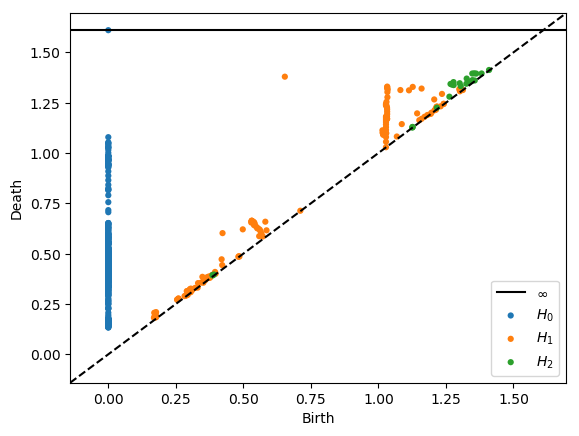

1
2
starting
(550, 50)
[[-0.018 -0.03  -0.051 ... -0.009  0.059  0.09 ]
 [-0.03  -0.051 -0.074 ...  0.059  0.09   0.094]
 [-0.051 -0.074 -0.064 ...  0.09   0.094  0.025]
 ...
 [-0.074 -0.077 -0.079 ... -0.051 -0.062 -0.07 ]
 [-0.077 -0.079 -0.063 ... -0.062 -0.07  -0.051]
 [-0.079 -0.063 -0.048 ... -0.07  -0.051 -0.046]]
starting


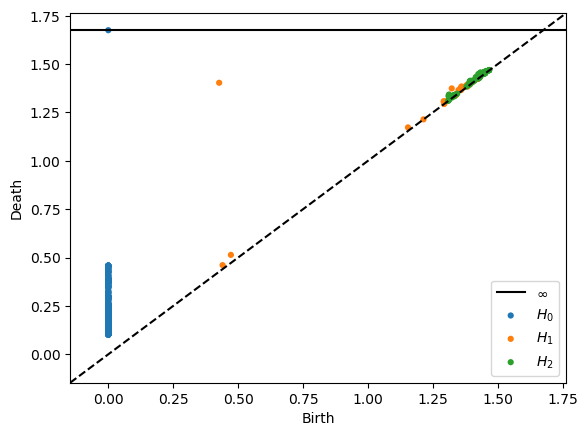

1
2
starting
(550, 50)
[[ 0.12   0.296  0.334 ...  0.17   0.126  0.069]
 [ 0.296  0.334  0.359 ...  0.126  0.069 -0.027]
 [ 0.334  0.359  0.387 ...  0.069 -0.027 -0.09 ]
 ...
 [-0.004 -0.018 -0.029 ...  0.04   0.003 -0.009]
 [-0.018 -0.029 -0.082 ...  0.003 -0.009 -0.014]
 [-0.029 -0.082 -0.193 ... -0.009 -0.014 -0.009]]
starting


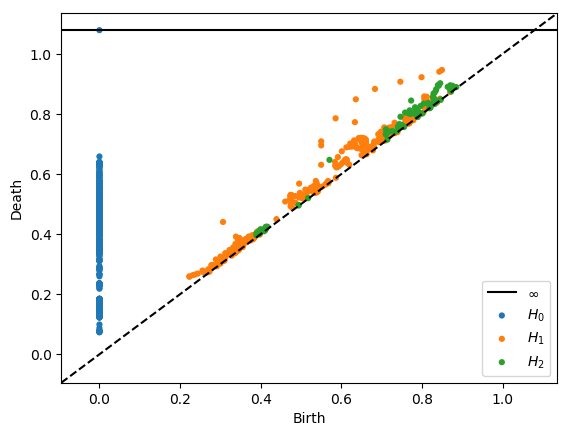

1
2
starting
(550, 50)
[[-0.46  -0.829 -0.813 ... -0.303 -0.335 -0.352]
 [-0.829 -0.813 -0.804 ... -0.335 -0.352 -0.343]
 [-0.813 -0.804 -0.789 ... -0.352 -0.343 -0.263]
 ...
 [-0.095 -0.099 -0.038 ... -0.254 -0.219 -0.204]
 [-0.099 -0.038 -0.013 ... -0.219 -0.204 -0.2  ]
 [-0.038 -0.013  0.005 ... -0.204 -0.2   -0.199]]
starting


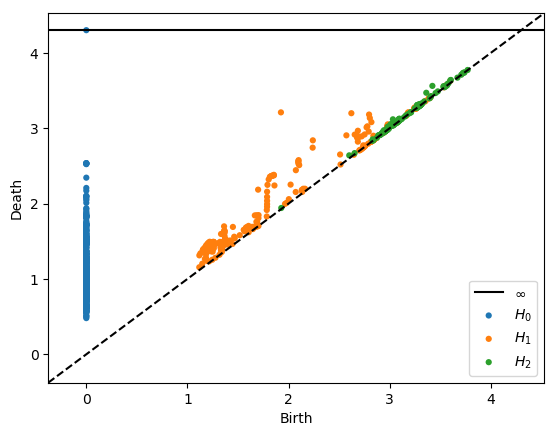

1
2
starting
(550, 50)
[[-1.500e-02 -3.740e-01 -1.377e+00 ...  5.890e-01  5.460e-01  9.450e-01]
 [-3.740e-01 -1.377e+00 -2.589e+00 ...  5.460e-01  9.450e-01  1.401e+00]
 [-1.377e+00 -2.589e+00 -3.005e+00 ...  9.450e-01  1.401e+00  8.550e-01]
 ...
 [-1.800e-02 -1.700e-02  4.010e-01 ... -2.100e-02 -2.000e-02 -1.600e-02]
 [-1.700e-02  4.010e-01  1.179e+00 ... -2.000e-02 -1.600e-02 -9.000e-03]
 [ 4.010e-01  1.179e+00  5.400e-02 ... -1.600e-02 -9.000e-03 -3.000e-03]]
starting


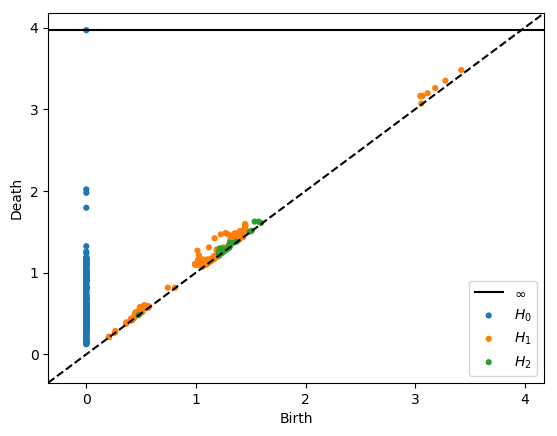

1
2
starting
(550, 50)
[[ 0.012  0.019 -0.025 ... -0.187 -0.19  -0.171]
 [ 0.019 -0.025 -0.136 ... -0.19  -0.171  0.121]
 [-0.025 -0.136 -0.207 ... -0.171  0.121  0.699]
 ...
 [ 0.058  0.078  0.097 ... -0.154 -0.107 -0.069]
 [ 0.078  0.097  0.113 ... -0.107 -0.069 -0.054]
 [ 0.097  0.113  0.122 ... -0.069 -0.054 -0.035]]
starting


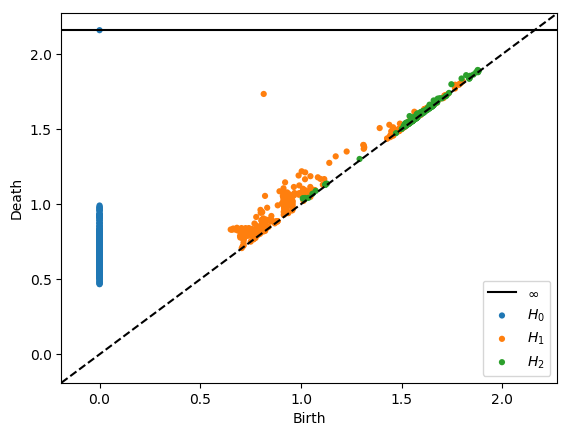

1
2
starting
(550, 50)
[[ 0.434  0.791  0.774 ...  0.003  0.047  0.053]
 [ 0.791  0.774  0.757 ...  0.047  0.053  0.021]
 [ 0.774  0.757  0.727 ...  0.053  0.021  0.006]
 ...
 [-0.007 -0.02  -0.03  ...  0.08   0.074  0.066]
 [-0.02  -0.03  -0.036 ...  0.074  0.066  0.046]
 [-0.03  -0.036 -0.043 ...  0.066  0.046  0.024]]
starting


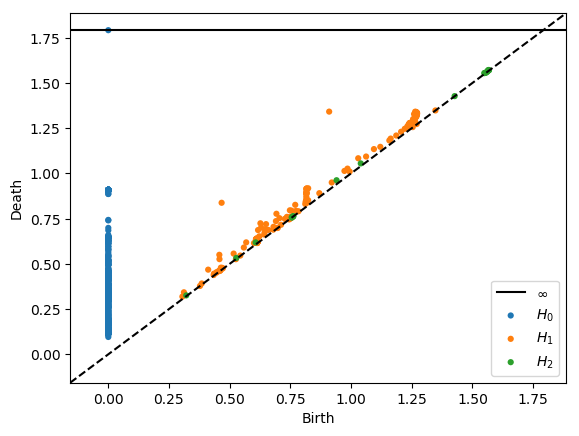

1
2
starting
(550, 50)
[[-0.193 -0.427 -0.521 ... -0.134 -0.149 -0.155]
 [-0.427 -0.521 -0.534 ... -0.149 -0.155 -0.139]
 [-0.521 -0.534 -0.48  ... -0.155 -0.139 -0.112]
 ...
 [ 0.027  0.013 -0.003 ... -0.069 -0.078 -0.083]
 [ 0.013 -0.003 -0.018 ... -0.078 -0.083 -0.078]
 [-0.003 -0.018 -0.02  ... -0.083 -0.078 -0.068]]
starting


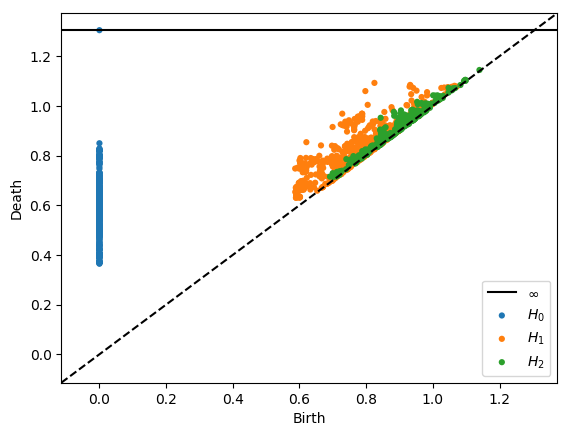

1
2
starting
(550, 50)
[[-0.107 -0.105  0.094 ...  0.092  0.087  0.1  ]
 [-0.105  0.094  0.2   ...  0.087  0.1    0.105]
 [ 0.094  0.2    0.305 ...  0.1    0.105  0.121]
 ...
 [ 0.154  0.194  0.201 ...  0.059  0.056  0.13 ]
 [ 0.194  0.201  0.208 ...  0.056  0.13   0.199]
 [ 0.201  0.208  0.128 ...  0.13   0.199  0.245]]
starting


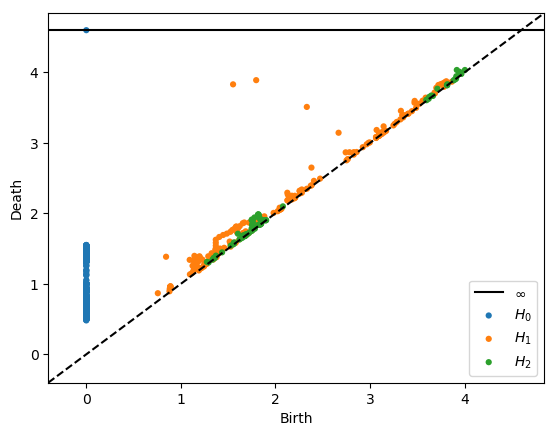

1
2
starting
(550, 50)
[[ 0.625  1.234  1.282 ... -0.696 -0.621 -0.55 ]
 [ 1.234  1.282  1.426 ... -0.621 -0.55  -0.495]
 [ 1.282  1.426  1.517 ... -0.55  -0.495 -0.423]
 ...
 [-0.047 -0.085 -0.101 ... -0.074 -0.089 -0.105]
 [-0.085 -0.101 -0.104 ... -0.089 -0.105 -0.112]
 [-0.101 -0.104 -0.107 ... -0.105 -0.112 -0.118]]
starting


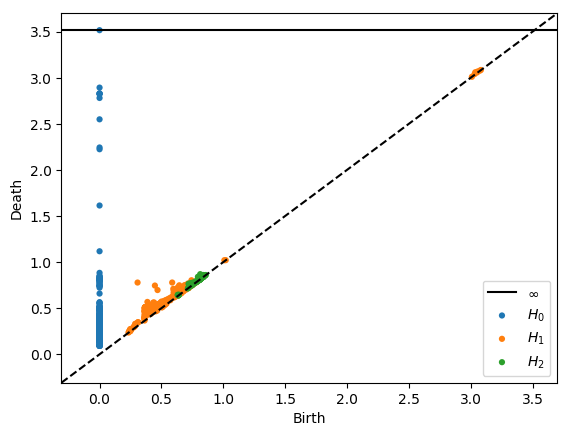

1
2
starting
(550, 50)
[[0.126 0.255 0.267 ... 0.038 0.032 0.018]
 [0.255 0.267 0.273 ... 0.032 0.018 0.016]
 [0.267 0.273 0.259 ... 0.018 0.016 0.013]
 ...
 [0.034 0.026 0.022 ... 0.078 0.081 0.081]
 [0.026 0.022 0.009 ... 0.081 0.081 0.079]
 [0.022 0.009 0.001 ... 0.081 0.079 0.076]]
starting


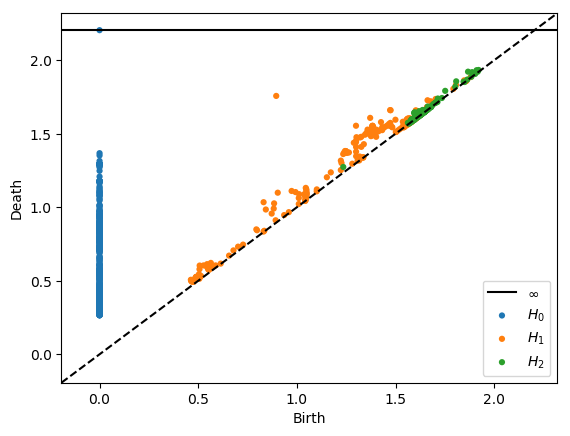

1
2
starting
(550, 50)
[[-0.247 -0.376 -0.278 ...  0.141  0.145  0.146]
 [-0.376 -0.278 -0.23  ...  0.145  0.146  0.153]
 [-0.278 -0.23  -0.207 ...  0.146  0.153  0.162]
 ...
 [-0.052 -0.055 -0.064 ... -0.261 -0.286 -0.298]
 [-0.055 -0.064 -0.078 ... -0.286 -0.298 -0.306]
 [-0.064 -0.078 -0.101 ... -0.298 -0.306 -0.303]]
starting


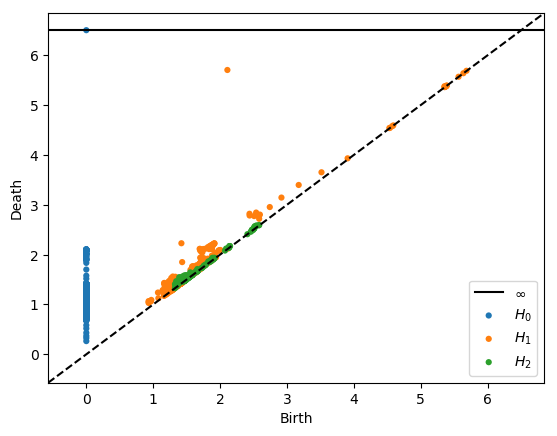

1
2
starting
(550, 50)
[[-0.24  -0.48  -0.495 ... -0.109 -0.094 -0.087]
 [-0.48  -0.495 -0.467 ... -0.094 -0.087 -0.088]
 [-0.495 -0.467 -0.43  ... -0.087 -0.088 -0.088]
 ...
 [-0.061 -0.043  0.269 ... -0.088 -0.083 -0.069]
 [-0.043  0.269  0.803 ... -0.083 -0.069 -0.057]
 [ 0.269  0.803  0.239 ... -0.069 -0.057 -0.045]]
starting


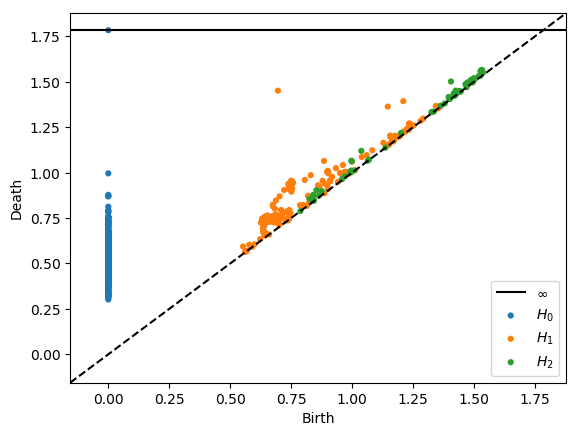

1
2
starting
(550, 50)
[[-0.083 -0.172 -0.195 ... -0.016 -0.027 -0.035]
 [-0.172 -0.195 -0.202 ... -0.027 -0.035 -0.032]
 [-0.195 -0.202 -0.181 ... -0.035 -0.032 -0.03 ]
 ...
 [-0.038  0.046  0.347 ...  0.022  0.062  0.149]
 [ 0.046  0.347  0.205 ...  0.062  0.149  0.352]
 [ 0.347  0.205 -0.188 ...  0.149  0.352 -0.062]]
starting


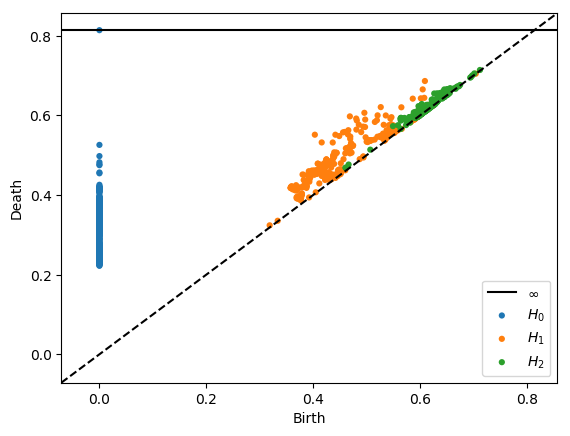

1
2
starting
(550, 50)
[[ 0.146  0.067 -0.136 ... -0.061  0.025  0.041]
 [ 0.067 -0.136  0.002 ...  0.025  0.041  0.   ]
 [-0.136  0.002  0.091 ...  0.041  0.    -0.021]
 ...
 [-0.002 -0.013 -0.022 ...  0.16   0.324  0.403]
 [-0.013 -0.022 -0.03  ...  0.324  0.403 -0.773]
 [-0.022 -0.03  -0.029 ...  0.403 -0.773 -0.143]]
starting


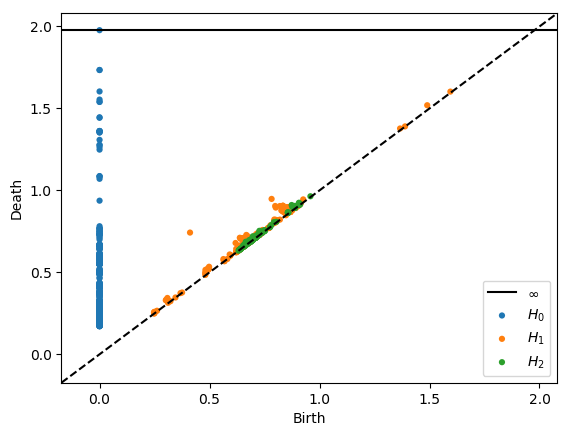

1
2
starting
(550, 50)
[[-0.01  -0.009 -0.008 ...  0.07   0.08   0.092]
 [-0.009 -0.008 -0.009 ...  0.08   0.092  0.106]
 [-0.008 -0.009 -0.011 ...  0.092  0.106  0.146]
 ...
 [ 0.081  0.092  0.117 ...  0.018  0.051  0.346]
 [ 0.092  0.117  0.15  ...  0.051  0.346  0.196]
 [ 0.117  0.15   0.171 ...  0.346  0.196 -0.299]]
starting


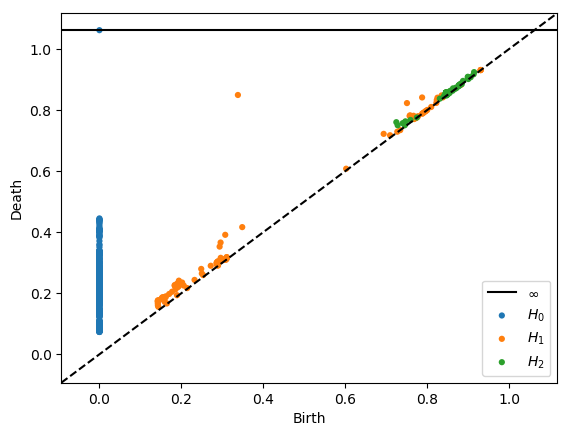

1
2
starting
(550, 50)
[[-0.145 -0.296 -0.316 ... -0.033  0.013  0.099]
 [-0.296 -0.316 -0.306 ...  0.013  0.099  0.152]
 [-0.316 -0.306 -0.265 ...  0.099  0.152  0.155]
 ...
 [-0.055 -0.044 -0.032 ... -0.036 -0.042 -0.062]
 [-0.044 -0.032 -0.011 ... -0.042 -0.062 -0.066]
 [-0.032 -0.011  0.039 ... -0.062 -0.066  0.238]]
starting


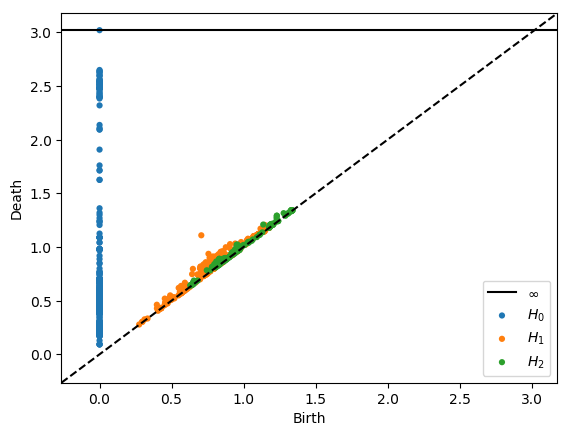

1
2
starting
(550, 50)
[[-0.062 -0.121  0.142 ...  0.128  0.166  0.184]
 [-0.121  0.142  1.047 ...  0.166  0.184  0.18 ]
 [ 0.142  1.047  1.022 ...  0.184  0.18   0.145]
 ...
 [ 0.177  0.192  0.172 ...  0.023  0.007  0.03 ]
 [ 0.192  0.172  0.174 ...  0.007  0.03   0.055]
 [ 0.172  0.174  0.193 ...  0.03   0.055  0.077]]
starting


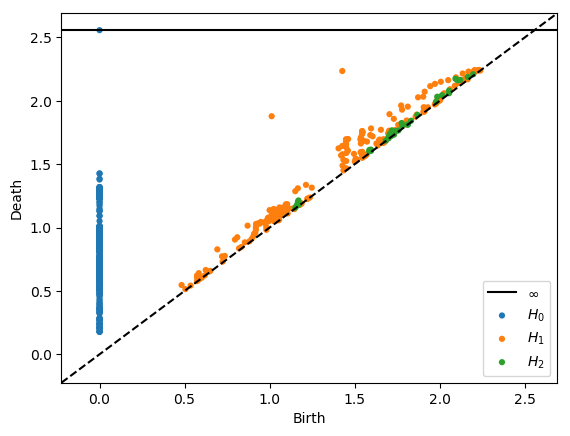

1
2
starting
(550, 50)
[[ 0.916  1.763  1.913 ...  0.357  0.079 -0.667]
 [ 1.763  1.913  1.82  ...  0.079 -0.667 -0.589]
 [ 1.913  1.82   1.813 ... -0.667 -0.589 -0.492]
 ...
 [-0.033 -0.019  0.015 ...  0.843  0.238 -0.091]
 [-0.019  0.015 -0.014 ...  0.238 -0.091 -0.116]
 [ 0.015 -0.014  0.32  ... -0.091 -0.116 -0.036]]
starting


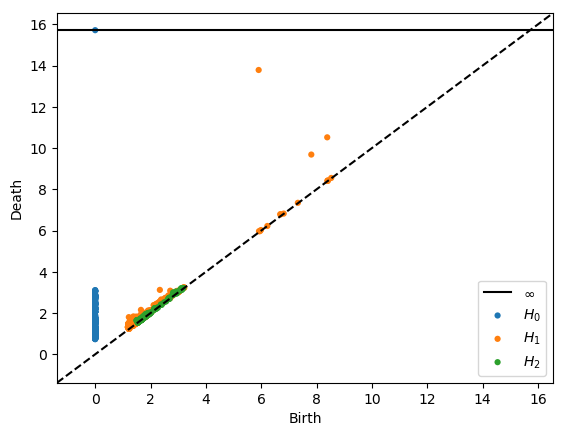

1
2
starting
(550, 50)
[[ 1.000e-03 -1.100e-01 -4.330e-01 ...  3.080e-01  3.270e-01  3.160e-01]
 [-1.100e-01 -4.330e-01 -1.107e+00 ...  3.270e-01  3.160e-01  2.550e-01]
 [-4.330e-01 -1.107e+00 -1.628e+00 ...  3.160e-01  2.550e-01  2.170e-01]
 ...
 [-5.700e-02 -5.300e-02 -4.400e-02 ... -3.200e-02 -8.500e-02 -1.090e-01]
 [-5.300e-02 -4.400e-02 -3.200e-02 ... -8.500e-02 -1.090e-01 -8.800e-02]
 [-4.400e-02 -3.200e-02 -2.000e-02 ... -1.090e-01 -8.800e-02 -6.000e-02]]
starting


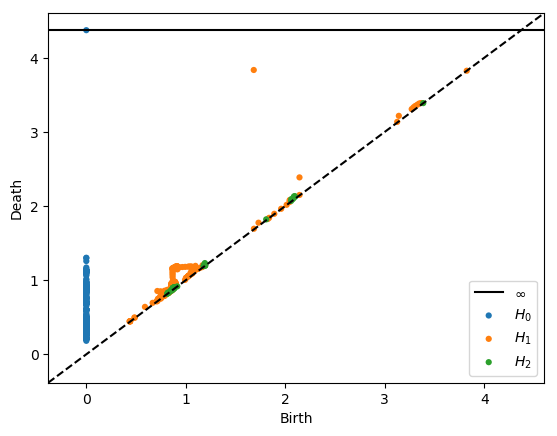

1
2
starting
(550, 50)
[[-0.398 -0.733 -0.742 ...  0.049  0.051  0.019]
 [-0.733 -0.742 -0.744 ...  0.051  0.019 -0.019]
 [-0.742 -0.744 -0.743 ...  0.019 -0.019 -0.03 ]
 ...
 [-0.011 -0.014 -0.014 ... -0.082 -0.078 -0.03 ]
 [-0.014 -0.014 -0.006 ... -0.078 -0.03  -0.045]
 [-0.014 -0.006  0.004 ... -0.03  -0.045 -0.017]]
starting


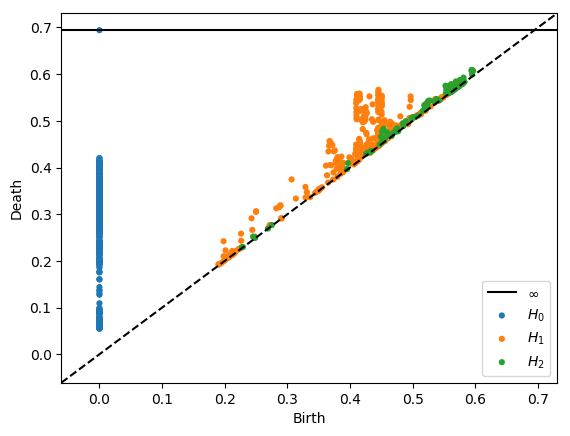

In [3]:
makeDiaFromCSV("Normal")